## PREVIOUS WORK

THUNDERSTROM FORECASTING on IMD GROUND OBSERVATORY DATA :  https://github.com/d-hackmt/ThunderStrom-Forecasting-ML

IMD SATELLITE IMAGE THUNDERSTROM SEGMENTATION : https://github.com/d-hackmt/Kolkata-Thunder-Satellite-Imagery



## MOUNT DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset_path = "/content/drive/MyDrive/IMD/updated_reanalysis.csv"

## EDA

In [ ]:
import pandas as pd

dataset_path = "/content/drive/MyDrive/IMD/updated_reanalysis.csv"
# Load the dataset
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataframe
print(df.head())

# Display the summary statistics of the dataframe
print(df.describe())

# Display the column names and data types
print(df.dtypes)

   longitude  latitude  level  geopotential  specific_humidity  \
0       87.5      23.5    100     161354.40           0.000002   
1       87.5      23.5    100     161558.72           0.000003   
2       87.5      23.5    100     161750.40           0.000003   
3       87.5      23.5    100     161737.80           0.000002   
4       87.5      23.5    100     161800.84           0.000002   

   air_temperature  eastward_wind  northward_wind      date  th  
0        198.14867      29.350992       11.406769  1/3/2015   0  
1        195.22280      24.262028        3.660801  2/3/2015   0  
2        193.39170      26.431646        1.130081  3/3/2015   1  
3        193.94790      22.918640       -1.913664  4/3/2015   0  
4        195.39761      14.185083        1.849530  5/3/2015   0  
           longitude       latitude          level   geopotential  \
count  266814.000000  266814.000000  266814.000000  266814.000000   
mean       88.500000      22.500000     568.518519   59109.760040   


### Summary of the data


### Columns:
longitude , latitude, level, geopotential, specific_humidity, air_temperature, eastward_wind, northward_wind, date, th(occurrence)

### Sample Data:

Row 0: 87.5, 23.5, 100, 161354.4, 2.25e-06, 198.14867, 29.350992, 11.406769, 2015-01-03 00:00:00, 0

Row 1: 87.5, 23.5, 100, 161558.72, 2.63e-06, 195.2228, 24.262028, 3.660801, 2015-02-03 00:00:00, 0

Row 2: 87.5, 23.5, 100, 161750.4, 2.63e-06, 193.3917, 26.431646, 1.1300807, 2015-03-03 00:00:00, 1

Row 3: 87.5, 23.5, 100, 161737.8, 1.87e-06, 193.9479, 22.91864, -1.9136643, 2015-04-03 00:00:00, 0

Row 4: 87.5, 23.5, 100, 161800.84, 1.87e-06, 195.39761, 14.185083, 1.8495297, 2015-05-03 00:00:00, 0

Summary Statistics:

Count: 266814

### Mean:

longitude: 88.5

latitude: 22.5

level: 568.52

geopotential: 59109.76

specific_humidity: 0.00585

air_temperature: 263.72

eastward_wind: 8.62

northward_wind: 2.18

th: 0.32

### Standard Deviation:

longitude: 0.65

latitude: 0.65

level: 297.88

geopotential: 50274.10

specific_humidity: 0.00638

air_temperature: 33.01

eastward_wind: 11.47

northward_wind: 6.42

th: 0.47

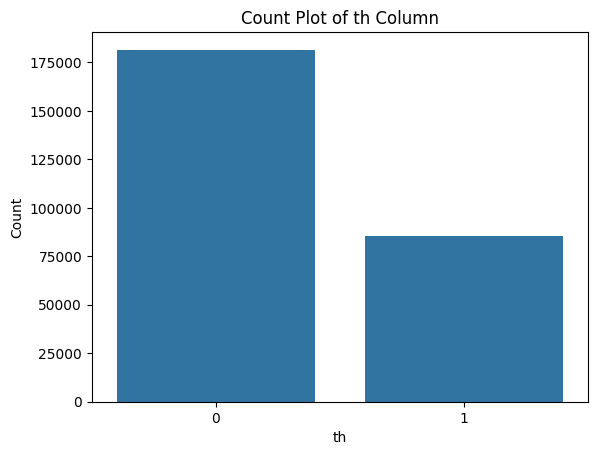

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the background color to white for visibility
plt.figure(facecolor='white')

# Count plot for the 'th' column
sns.countplot(x='th', data=df)
plt.title('Count Plot of th Column')
plt.xlabel('th')
plt.ylabel('Count')
plt.show()

### DERIVING CO RELATION

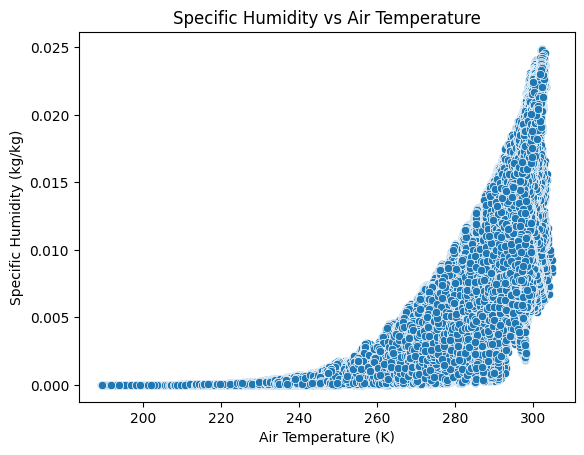

In [ ]:
# Scatter plot of specific humidity against air temperature

# Set the background color to white for visibility
plt.figure(facecolor='white')

# Scatter plot
sns.scatterplot(x='air_temperature', y='specific_humidity', data=df)
plt.title('Specific Humidity vs Air Temperature')
plt.xlabel('Air Temperature (K)')
plt.ylabel('Specific Humidity (kg/kg)')
plt.show()

In [ ]:
# Calculate the correlation between specific humidity and air temperature
correlation = df['specific_humidity'].corr(df['air_temperature'])
print('The correlation between specific humidity and air temperature is', correlation)

The correlation between specific humidity and air temperature is 0.7776621187017909


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Prepare the data
X = df['air_temperature'].values.reshape(-1, 1)
y = df['specific_humidity'].values

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Get the slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

print('The regression line equation is: specific_humidity =', slope, '* air_temperature +', intercept)

The regression line equation is: specific_humidity = 0.0001503482445744217 * air_temperature + -0.03380005782519871


### DERIVING LINEAR REGRESSION EQUATION

And Comparision Scatter plots

In [ ]:
# Calculate the correlation and regression line for each feature against each other
from sklearn.linear_model import LinearRegression

# List of features
features = ['longitude', 'latitude', 'level', 'geopotential', 'specific_humidity', 'air_temperature', 'eastward_wind', 'northward_wind']

# Dictionary to store results
results = {}

# Calculate correlation and regression line for each pair of features
for feature1 in features:
    for feature2 in features:
        if feature1 != feature2:
            # Calculate correlation
            correlation = df[feature1].corr(df[feature2])

            # Prepare the data for regression
            X = df[feature1].values.reshape(-1, 1)
            y = df[feature2].values

            # Create and fit the model
            model = LinearRegression()
            model.fit(X, y)

            # Get the slope (coefficient) and intercept
            slope = model.coef_[0]
            intercept = model.intercept_

            # Store the results
            results[(feature1, feature2)] = {'correlation': correlation, 'slope': slope, 'intercept': intercept}

# Print the results
for key, value in results.items():
    print('Features:', key)
    print('Correlation:', value['correlation'])
    print('Regression line: {} = {} * {} + {}'.format(key[1], value['slope'], key[0], value['intercept']))
    print()

Features: ('longitude', 'latitude')
Correlation: 0.0
Regression line: latitude = -3.995699229160425e-18 * longitude + 22.5

Features: ('longitude', 'level')
Correlation: 2.439369488593821e-17
Regression line: level = 1.5343485039976034e-15 * longitude + 568.5185185185184

Features: ('longitude', 'geopotential')
Correlation: 0.00018194464323989003
Regression line: geopotential = 14.170603517394623 * longitude + 57855.66162897196

Features: ('longitude', 'specific_humidity')
Correlation: -0.005594330138283488
Regression line: specific_humidity = -5.5317885981245386e-05 * longitude + 0.010744995876766963

Features: ('longitude', 'air_temperature')
Correlation: -0.002226964580107395
Regression line: air_temperature = -0.11389990847556804 * longitude + 273.7973599152218

Features: ('longitude', 'eastward_wind')
Correlation: 0.00138301893186419
Regression line: eastward_wind = 0.02457529985518661 * longitude + 6.4446468735891695

Features: ('longitude', 'northward_wind')
Correlation: 0.01332

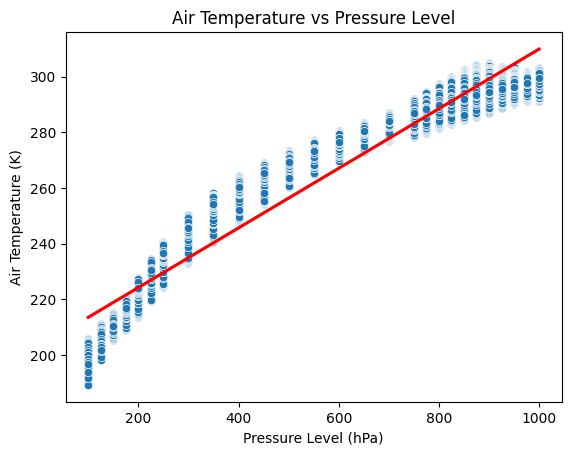

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the background color to white
plt.figure(facecolor='white')

# Create a scatter plot of air temperature vs pressure level
sns.scatterplot(x='level', y='air_temperature', data=df)

# Add a regression line
sns.regplot(x='level', y='air_temperature', data=df, scatter=False, color='red')

# Set the title and labels
plt.title('Air Temperature vs Pressure Level')
plt.xlabel('Pressure Level (hPa)')
plt.ylabel('Air Temperature (K)')

# Show the plot
plt.show()

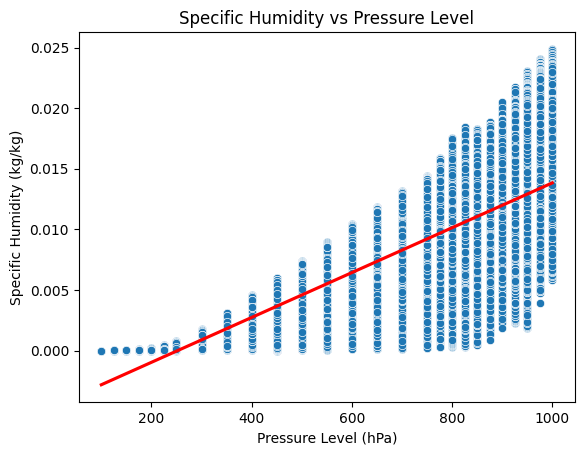

In [ ]:
# Create a scatter plot of specific humidity vs pressure level
plt.figure(facecolor='white')
sns.scatterplot(x='level', y='specific_humidity', data=df)

# Add a regression line
sns.regplot(x='level', y='specific_humidity', data=df, scatter=False, color='red')

# Set the title and labels
plt.title('Specific Humidity vs Pressure Level')
plt.xlabel('Pressure Level (hPa)')
plt.ylabel('Specific Humidity (kg/kg)')

# Show the plot
plt.show()

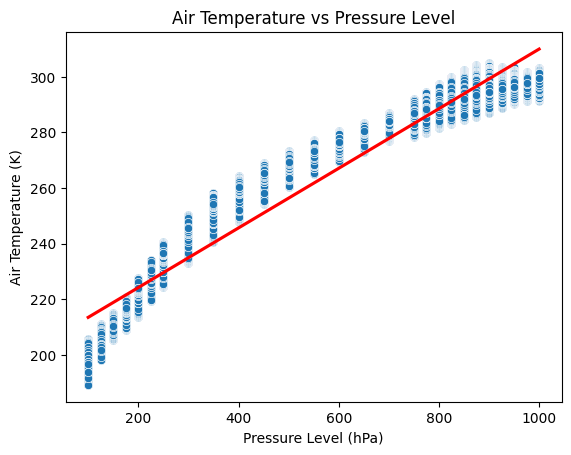

Air Temperature vs Pressure Level plot saved.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the background color to white
plt.figure(facecolor='white')

# Create a scatter plot of air temperature vs pressure level
sns.scatterplot(x='level', y='air_temperature', data=df)

# Add a regression line
sns.regplot(x='level', y='air_temperature', data=df, scatter=False, color='red')

# Set the title and labels
plt.title('Air Temperature vs Pressure Level')
plt.xlabel('Pressure Level (hPa)')
plt.ylabel('Air Temperature (K)')

# Save the plot
plt.savefig('air_temperature_vs_pressure_level.png')
plt.show()

print('Air Temperature vs Pressure Level plot saved.')

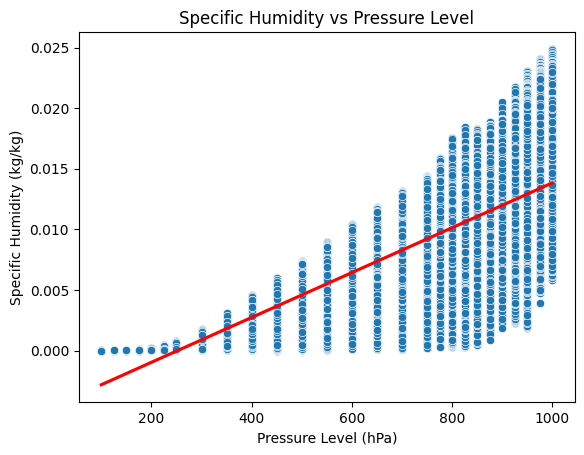

Specific Humidity vs Pressure Level plot saved.


In [ ]:
# Create a scatter plot of specific humidity vs pressure level
plt.figure(facecolor='white')
sns.scatterplot(x='level', y='specific_humidity', data=df)

# Add a regression line
sns.regplot(x='level', y='specific_humidity', data=df, scatter=False, color='red')

# Set the title and labels
plt.title('Specific Humidity vs Pressure Level')
plt.xlabel('Pressure Level (hPa)')
plt.ylabel('Specific Humidity (kg/kg)')

# Save the plot
# plt.savefig('specific_humidity_vs_pressure_level.png')
plt.show()

print('Specific Humidity vs Pressure Level plot saved.')

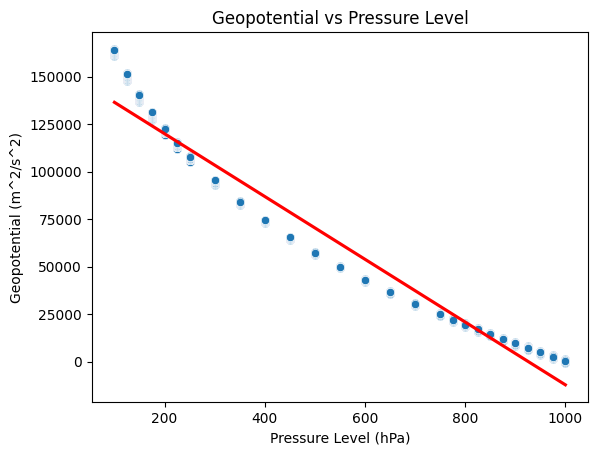

Geopotential vs Pressure Level plot saved.


In [ ]:
# Create a scatter plot of geopotential vs pressure level
plt.figure(facecolor='white')
sns.scatterplot(x='level', y='geopotential', data=df)

# Add a regression line
sns.regplot(x='level', y='geopotential', data=df, scatter=False, color='red')

# Set the title and labels
plt.title('Geopotential vs Pressure Level')
plt.xlabel('Pressure Level (hPa)')
plt.ylabel('Geopotential (m^2/s^2)')

# Save the plot
# plt.savefig('geopotential_vs_pressure_level.png')
plt.show()

print('Geopotential vs Pressure Level plot saved.')

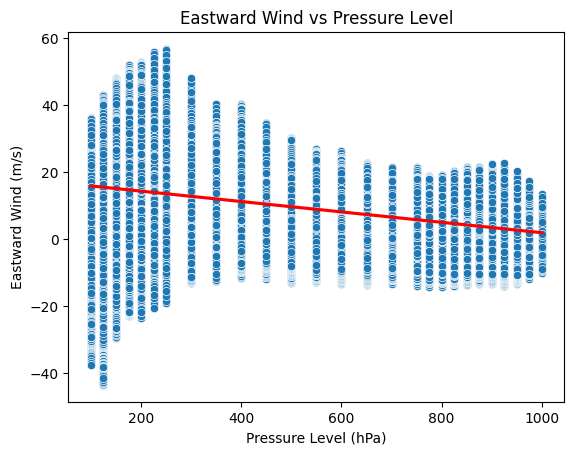

Eastward Wind vs Pressure Level plot saved.


In [ ]:
# Create a scatter plot of eastward wind vs pressure level
plt.figure(facecolor='white')
sns.scatterplot(x='level', y='eastward_wind', data=df)

# Add a regression line
sns.regplot(x='level', y='eastward_wind', data=df, scatter=False, color='red')

# Set the title and labels
plt.title('Eastward Wind vs Pressure Level')
plt.xlabel('Pressure Level (hPa)')
plt.ylabel('Eastward Wind (m/s)')

# Save the plot
plt.savefig('eastward_wind_vs_pressure_level.png')
# plt.close()
plt.show()

print('Eastward Wind vs Pressure Level plot saved.')

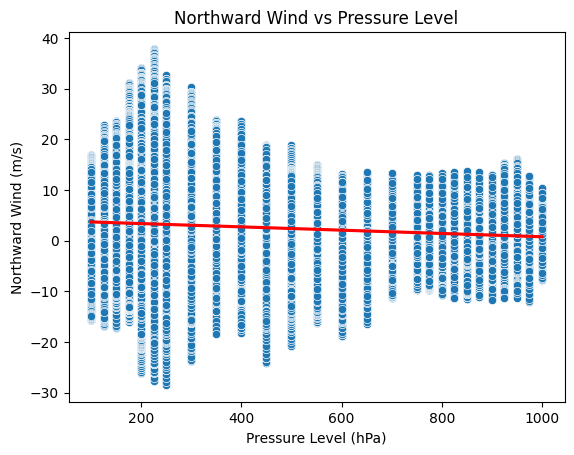

Northward Wind vs Pressure Level plot saved.


In [ ]:
# Create a scatter plot of northward wind vs pressure level
plt.figure(facecolor='white')
sns.scatterplot(x='level', y='northward_wind', data=df)

# Add a regression line
sns.regplot(x='level', y='northward_wind', data=df, scatter=False, color='red')

# Set the title and labels
plt.title('Northward Wind vs Pressure Level')
plt.xlabel('Pressure Level (hPa)')
plt.ylabel('Northward Wind (m/s)')

# Save the plot
plt.savefig('northward_wind_vs_pressure_level.png')
# plt.close()
plt.show()

print('Northward Wind vs Pressure Level plot saved.')

## SPLITTNG DATA

### TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

# Drop the 'date' column
cleaned_df = df.drop(columns=['date'])

# Split the data into features and target variable
X = cleaned_df.drop(columns=['th'])
y = cleaned_df['th']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Data has been properly loaded, and train-test split has been performed.')
print('Training features shape:', X_train.shape)
print('Testing features shape:', X_test.shape)
print('Training labels shape:', y_train.shape)
print('Testing labels shape:', y_test.shape)

Data has been properly loaded, and train-test split has been performed.
Training features shape: (213451, 8)
Testing features shape: (53363, 8)
Training labels shape: (213451,)
Testing labels shape: (53363,)


### TRAIN TEST VALIDATION SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

# Drop the 'date' column
cleaned_df = df.drop(columns=['date'])

# Split the data into features and target variable
X = cleaned_df.drop(columns=['th'])
y = cleaned_df['th']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print('Data has been properly loaded, and train-test-validation split has been performed.')
print('Training features shape:', X_train.shape)
print('Validation features shape:', X_val.shape)
print('Testing features shape:', X_test.shape)
print('Training labels shape:', y_train.shape)
print('Validation labels shape:', y_val.shape)
print('Testing labels shape:', y_test.shape)


Data has been properly loaded, and train-test-validation split has been performed.
Training features shape: (186769, 8)
Validation features shape: (40022, 8)
Testing features shape: (40023, 8)
Training labels shape: (186769,)
Validation labels shape: (40022,)
Testing labels shape: (40023,)


## Feature importance

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Pair feature names with their importance scores
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Sort feature importance dictionary by importance score
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print feature importance scores
print("Feature Importance Scores:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")


Feature Importance Scores:
geopotential: 0.2725044250549856
air_temperature: 0.1949387309205512
specific_humidity: 0.1543192966383893
northward_wind: 0.151962099418367
eastward_wind: 0.1465269930574814
latitude: 0.03983821047299598
longitude: 0.027419038127243733
level: 0.012491206309985882


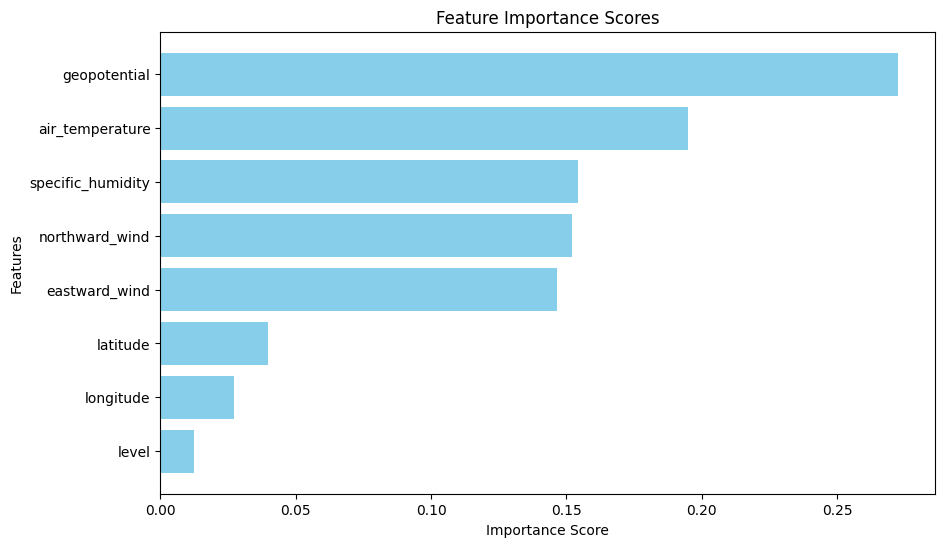

In [ ]:
import matplotlib.pyplot as plt

# Extract feature names and importance scores
features = [x[0] for x in sorted_feature_importance]
importance = [x[1] for x in sorted_feature_importance]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


# CLASSIC MACHINE LEARNING ALGORITHMS

#### pip installs

In [ ]:
!pip install catboost
!pip install lime
!pip install mixture_of_experts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=c93c95f953182592deaea27056059a82c94233049556fcddc33cf6ae64d6edbb
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB

## REGRESSION

#### Laoding data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

dataset_path = "/content/drive/MyDrive/IMD/updated_reanalysis.csv"
# Load the dataset
df = pd.read_csv(dataset_path)


# Drop the 'date' column
cleaned_df = df.drop(columns=['date'])

# Split the data into features and target variable
X = cleaned_df.drop(columns=['th'])
y = cleaned_df['th']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print('Data has been properly loaded, and train-test-validation split has been performed.')
print('Training features shape:', X_train.shape)
print('Validation features shape:', X_val.shape)
print('Testing features shape:', X_test.shape)
print('Training labels shape:', y_train.shape)
print('Validation labels shape:', y_val.shape)
print('Testing labels shape:', y_test.shape)


### Model.fit() or
DATA MODELLLING ON Some ML Regression ALGOS

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import cross_val_score

# Initialize and train Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_train_accuracy = accuracy_score(y_train, lr_model.predict(X_train_scaled))
lr_test_accuracy = accuracy_score(y_val, lr_model.predict(X_val_scaled))
lr_val_loss = log_loss(y_val, lr_model.predict_proba(X_val_scaled))

print("Logistic Regression Training Accuracy:", lr_train_accuracy)
print("Logistic Regression Testing Accuracy:", lr_test_accuracy)
print("Logistic Regression Validation Loss:", lr_val_loss)

# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
dt_train_accuracy = accuracy_score(y_train, dt_model.predict(X_train_scaled))
dt_test_accuracy = accuracy_score(y_val, dt_model.predict(X_val_scaled))

print("Decision Tree Training Accuracy:", dt_train_accuracy)
print("Decision Tree Testing Accuracy:", dt_test_accuracy)

# Initialize and train XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)
xgb_train_accuracy = accuracy_score(y_train, xgb_model.predict(X_train_scaled))
xgb_test_accuracy = accuracy_score(y_val, xgb_model.predict(X_val_scaled))

print("XGBoost Training Accuracy:", xgb_train_accuracy)
print("XGBoost Testing Accuracy:", xgb_test_accuracy)

# Initialize and train CatBoost
catboost_model = CatBoostClassifier(verbose=0)
catboost_model.fit(X_train_scaled, y_train)
catboost_train_accuracy = accuracy_score(y_train, catboost_model.predict(X_train_scaled))
catboost_test_accuracy = accuracy_score(y_val, catboost_model.predict(X_val_scaled))

print("CatBoost Training Accuracy:", catboost_train_accuracy)
print("CatBoost Testing Accuracy:", catboost_test_accuracy)


Logistic Regression Training Accuracy: 0.6767664869437647
Logistic Regression Testing Accuracy: 0.6787766728299436
Logistic Regression Validation Loss: 0.6062490631292362
Decision Tree Training Accuracy: 1.0
Decision Tree Testing Accuracy: 0.9401579131477688
XGBoost Training Accuracy: 0.8571604495392704
XGBoost Testing Accuracy: 0.8473089800609664
CatBoost Training Accuracy: 0.8823359336934931
CatBoost Testing Accuracy: 0.8719204437559342


### GRID SEARCH CV For Best Hyperparameter Evaluation

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for each model
lr_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
dt_params = {'max_depth': [3, 5, 7, 9, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
xgb_params = {'max_depth': [3, 5, 7, 9], 'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200]}
catboost_params = {'depth': [4, 6, 8, 10], 'learning_rate': [0.01, 0.05, 0.1], 'iterations': [50, 100, 200]}

# Initialize and perform hyperparameter tuning for Logistic Regression
lr_grid = GridSearchCV(LogisticRegression(), lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train_scaled, y_train)
lr_best_model = lr_grid.best_estimator_
lr_train_accuracy = accuracy_score(y_train, lr_best_model.predict(X_train_scaled))
lr_test_accuracy = accuracy_score(y_val, lr_best_model.predict(X_val_scaled))
print("Logistic Regression Training Accuracy:", lr_train_accuracy)
print("Logistic Regression Testing Accuracy:", lr_test_accuracy)
print("Best parameters:", lr_grid.best_params_)

# Initialize and perform hyperparameter tuning for Decision Tree
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train_scaled, y_train)
dt_best_model = dt_grid.best_estimator_
dt_train_accuracy = accuracy_score(y_train, dt_best_model.predict(X_train_scaled))
dt_test_accuracy = accuracy_score(y_val, dt_best_model.predict(X_val_scaled))
print("Decision Tree Training Accuracy:", dt_train_accuracy)
print("Decision Tree Testing Accuracy:", dt_test_accuracy)
print("Best parameters:", dt_grid.best_params_)

# Initialize and perform hyperparameter tuning for XGBoost
xgb_grid = GridSearchCV(XGBClassifier(), xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train_scaled, y_train)
xgb_best_model = xgb_grid.best_estimator_
xgb_train_accuracy = accuracy_score(y_train, xgb_best_model.predict(X_train_scaled))
xgb_test_accuracy = accuracy_score(y_val, xgb_best_model.predict(X_val_scaled))
print("XGBoost Training Accuracy:", xgb_train_accuracy)
print("XGBoost Testing Accuracy:", xgb_test_accuracy)
print("Best parameters:", xgb_grid.best_params_)

# Initialize and perform hyperparameter tuning for CatBoost
catboost_grid = GridSearchCV(CatBoostClassifier(verbose=0), catboost_params, cv=5, scoring='accuracy')
catboost_grid.fit(X_train_scaled, y_train)
catboost_best_model = catboost_grid.best_estimator_
catboost_train_accuracy = accuracy_score(y_train, catboost_best_model.predict(X_train_scaled))
catboost_test_accuracy = accuracy_score(y_val, catboost_best_model.predict(X_val_scaled))
print("CatBoost Training Accuracy:", catboost_train_accuracy)
print("CatBoost Testing Accuracy:", catboost_test_accuracy)
print("Best parameters:", catboost_grid.best_params_)


Logistic Regression Training Accuracy: 0.6806161622110736
Logistic Regression Testing Accuracy: 0.6821498176003198
Best parameters: {'C': 0.001}
Decision Tree Training Accuracy: 1.0
Decision Tree Testing Accuracy: 0.9398330917995102
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
XGBoost Training Accuracy: 0.9641107464300821
XGBoost Testing Accuracy: 0.9392833941332267
Best parameters: {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200}
CatBoost Training Accuracy: 0.8539586333920511
CatBoost Testing Accuracy: 0.8463345160161911
Best parameters: {'depth': 10, 'iterations': 200, 'learning_rate': 0.1}


#### Print results

In [ ]:
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.naive_bayes import BernoulliNB, CategoricalNB, ComplementNB, GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR, NuSVR, SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

algos = (LinearRegression, HuberRegressor, KNeighborsRegressor, LinearSVR, NuSVR,
         SVR, DecisionTreeRegressor, ExtraTreeRegressor, RandomForestRegressor, ExtraTreesRegressor,
         XGBRegressor, LGBMRegressor, CatBoostRegressor)

for algo in algos:
    try:
        model = algo()
        model.fit(X_train_scaled, y_train)
        train_preds = model.predict(X_train_scaled)
        test_preds = model.predict(X_val_scaled)

        train_rmse = mean_squared_error(y_train, train_preds, squared=False)
        test_rmse = mean_squared_error(y_val, test_preds, squared=False)

        print(f"Model: {algo.__name__}")
        print(f"Train RMSE: {train_rmse}")
        print(f"Test RMSE: {test_rmse}")
        print("----------------------------------------------------")
    except Exception as e:
        print(f"Error occurred while running {algo.__name__}: {str(e)}")


Model: LinearRegression
Train RMSE: 0.45771745718804147
Test RMSE: 0.45689457619414797
----------------------------------------------------
Model: HuberRegressor
Train RMSE: 0.5651361826111937
Test RMSE: 0.5637776901610883
----------------------------------------------------
Model: KNeighborsRegressor
Train RMSE: 0.1952511945733643
Test RMSE: 0.24599739207093616
----------------------------------------------------
Model: LinearSVR
Train RMSE: 0.5651405469342873
Test RMSE: 0.5637820344778073
----------------------------------------------------


## CLASSIFICATION

### Model.fit() or
DATA MODELLLING ON Some ML Classification ALGOS

#### DATA LOADING

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

dataset_path = "/content/drive/MyDrive/IMD/updated_reanalysis.csv"
# Load the dataset
df = pd.read_csv(dataset_path)


# Drop the 'date' column
cleaned_df = df.drop(columns=['date'])

# Split the data into features and target variable
X = cleaned_df.drop(columns=['th'])
y = cleaned_df['th']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print('Data has been properly loaded, and train-test-validation split has been performed.')
print('Training features shape:', X_train.shape)
print('Validation features shape:', X_val.shape)
print('Testing features shape:', X_test.shape)
print('Training labels shape:', y_train.shape)
print('Validation labels shape:', y_val.shape)
print('Testing labels shape:', y_test.shape)


Data has been properly loaded, and train-test-validation split has been performed.
Training features shape: (186769, 8)
Validation features shape: (40022, 8)
Testing features shape: (40023, 8)
Training labels shape: (186769,)
Validation labels shape: (40022,)
Testing labels shape: (40023,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Drop pressure level and latitude/longitude columns
X_train_filtered = X_train.drop(columns=['level', 'longitude', 'latitude'])
X_val_filtered = X_val.drop(columns=['level', 'longitude', 'latitude'])

# Normalize input features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_val_scaled = scaler.transform(X_val_filtered)

#### Train test split Without Validation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
dataset_path = "/content/drive/MyDrive/IMD/updated_reanalysis.csv"
df = pd.read_csv(dataset_path)

# Drop the 'date' column
cleaned_df = df.drop(columns=['date'])

# Split the data into features and target variable
X = cleaned_df.drop(columns=['th'])
y = cleaned_df['th']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Data has been properly loaded, and train-test split has been performed.')
print('Training features shape:', X_train.shape)
print('Testing features shape:', X_test.shape)
print('Training labels shape:', y_train.shape)
print('Testing labels shape:', y_test.shape)

# Drop pressure level and latitude/longitude columns
X_train_filtered = X_train.drop(columns=['level', 'longitude', 'latitude'])
X_test_filtered = X_test.drop(columns=['level', 'longitude', 'latitude'])

# Normalize input features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

print('Feature scaling has been completed.')
print('Scaled training features shape:', X_train_scaled.shape)
print('Scaled testing features shape:', X_test_scaled.shape)


Data has been properly loaded, and train-test split has been performed.
Training features shape: (186769, 8)
Testing features shape: (80045, 8)
Training labels shape: (186769,)
Testing labels shape: (80045,)
Feature scaling has been completed.
Scaled training features shape: (186769, 5)
Scaled testing features shape: (80045, 5)


### Model.fit() on all classifier algos with smote and evaluation metrics

Data has been properly loaded, and train-test split has been performed.
Training features shape: (186769, 8)
Testing features shape: (80045, 8)
Training labels shape: (186769,)
Testing labels shape: (80045,)
Feature scaling and SMOTE resampling have been completed.
Resampled training features shape: (254128, 5)
Resampled training labels shape: (254128,)


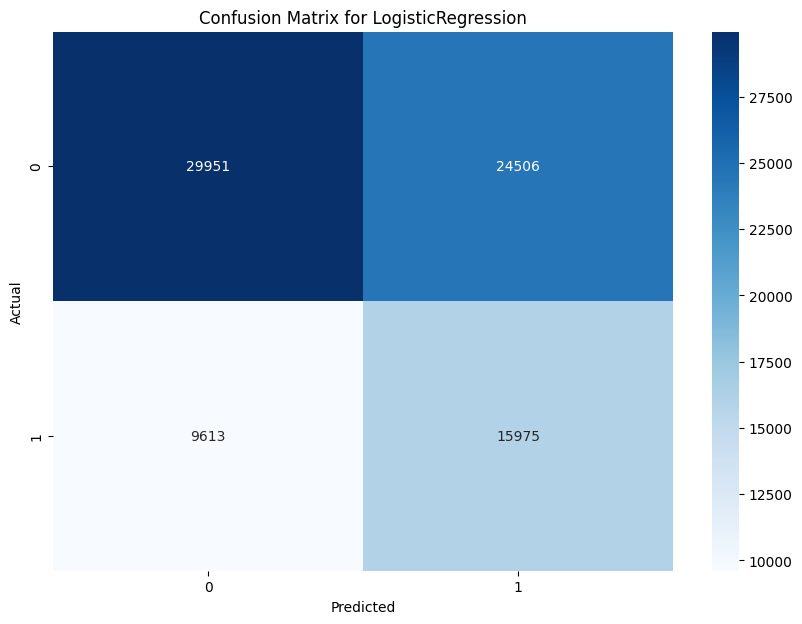

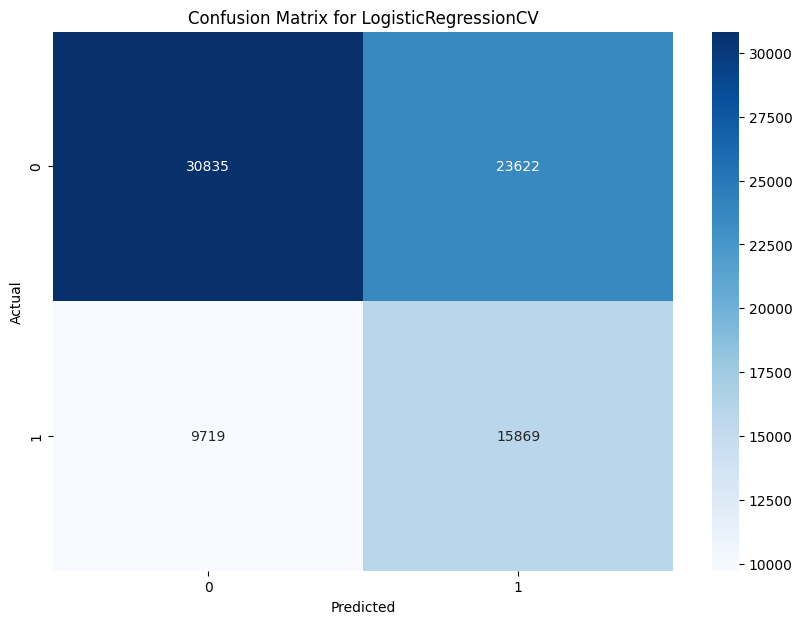

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


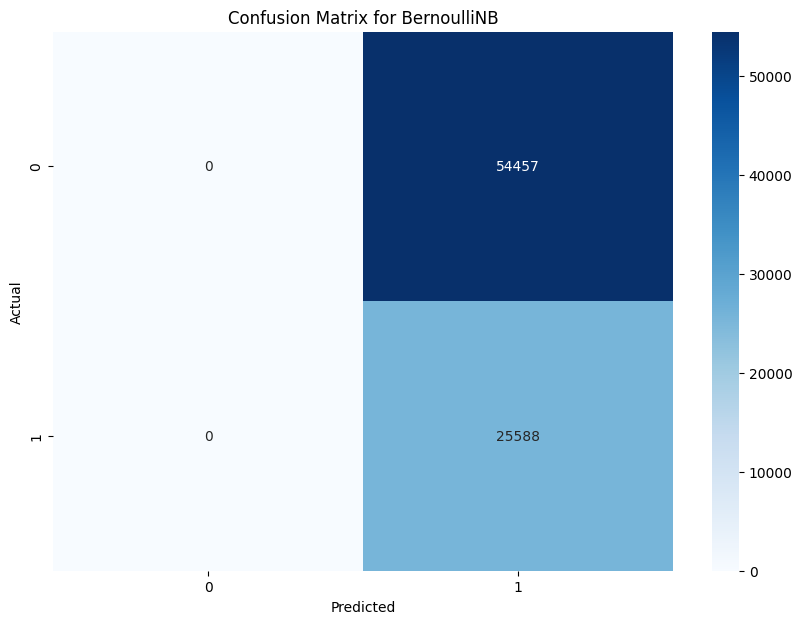

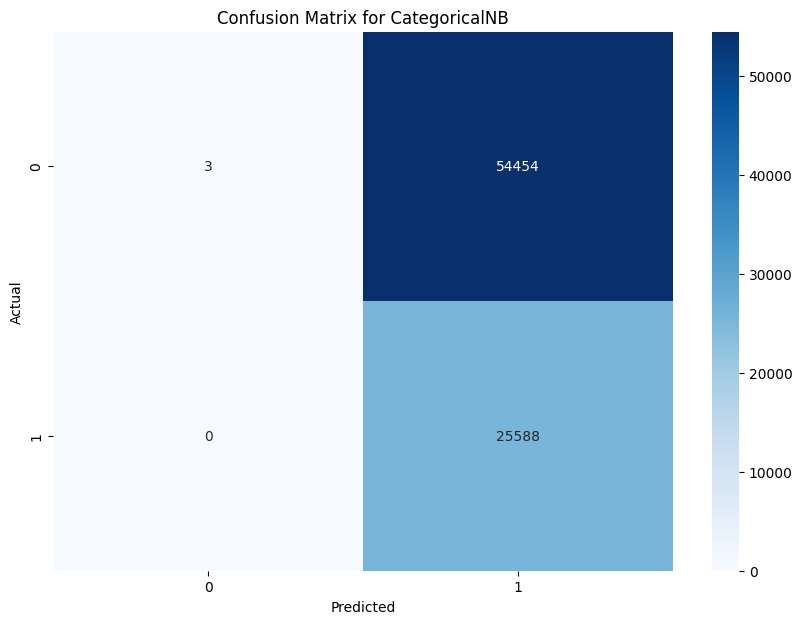

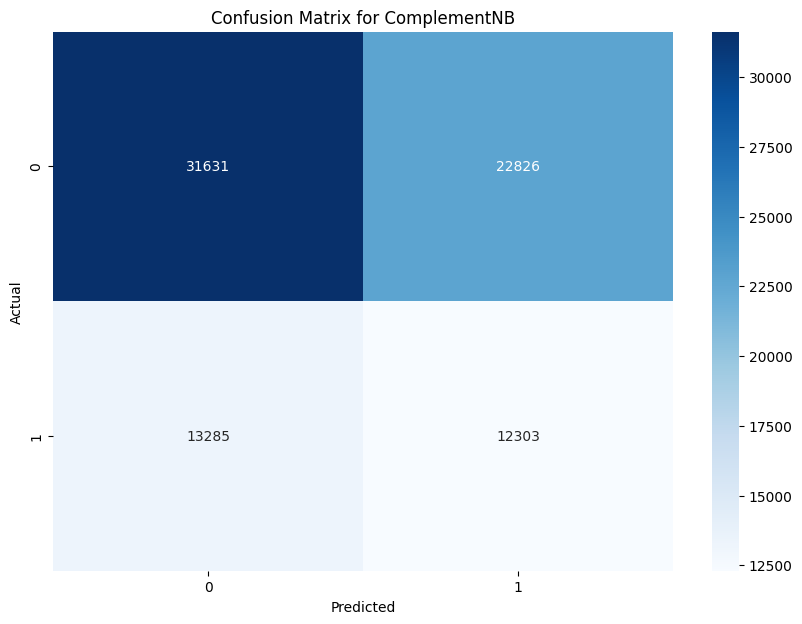

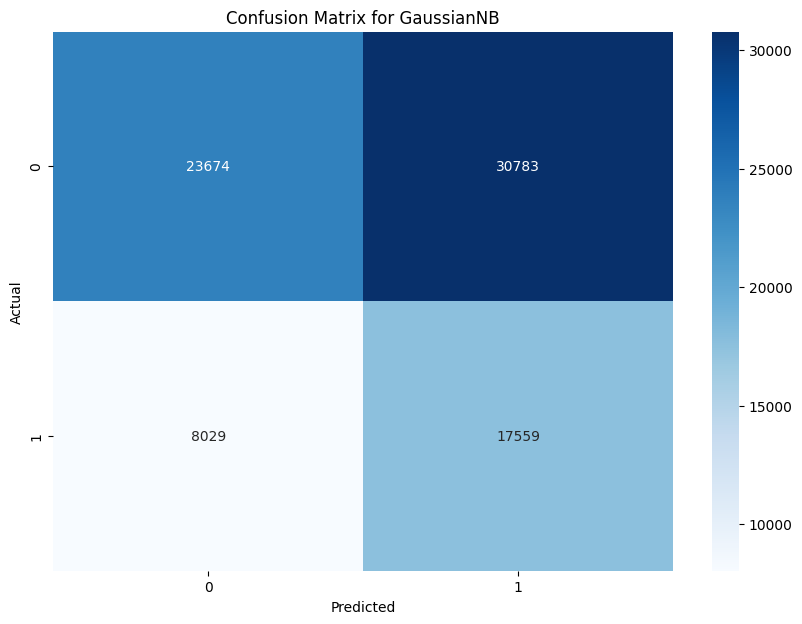

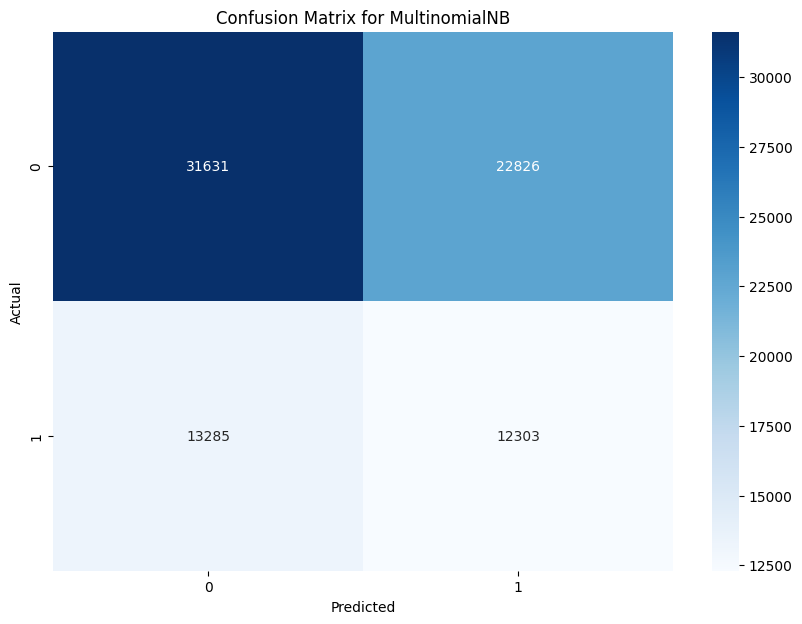

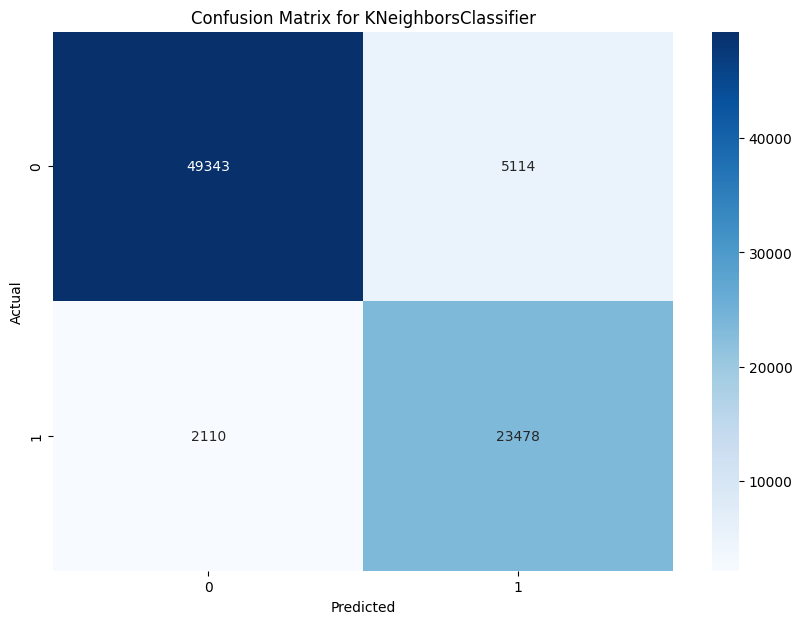

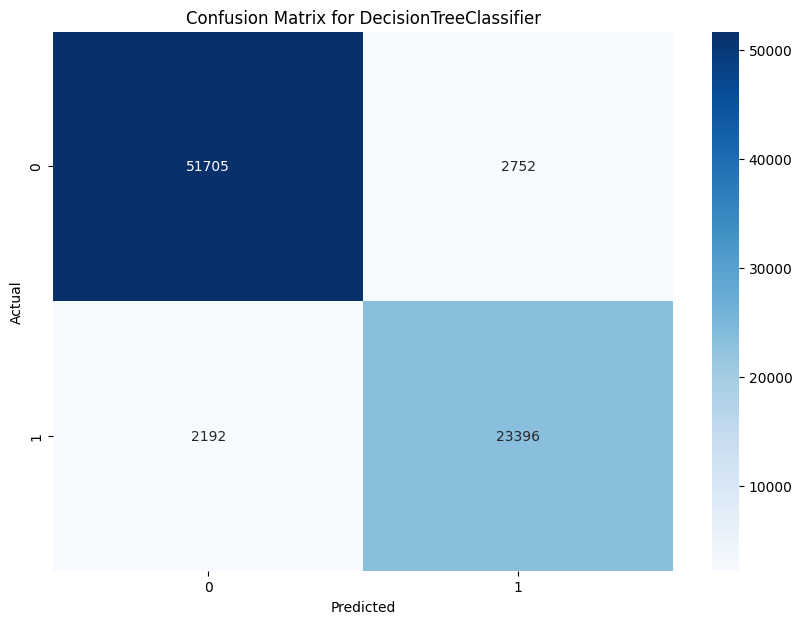

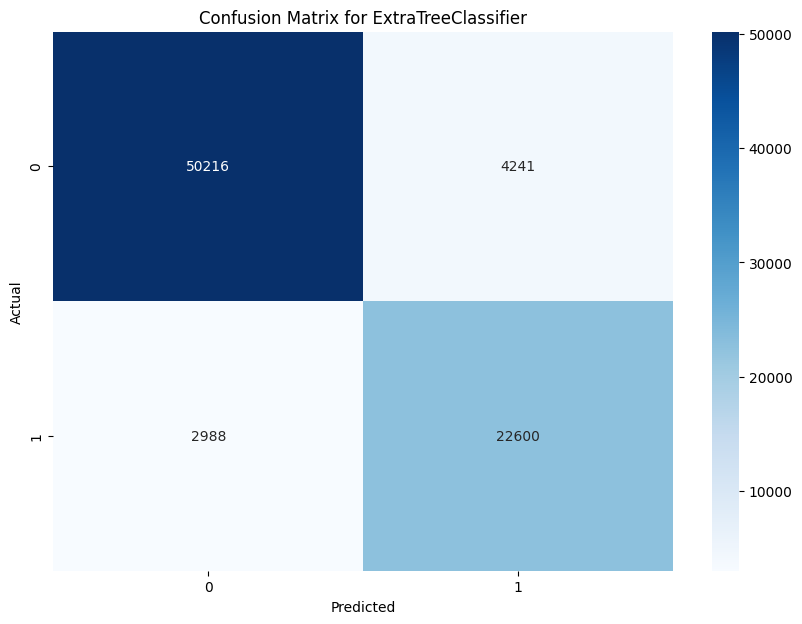

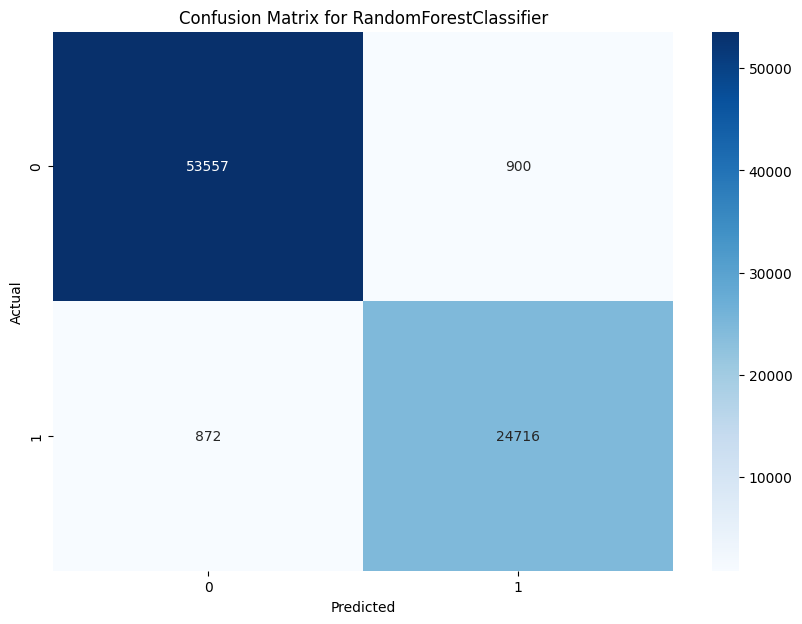

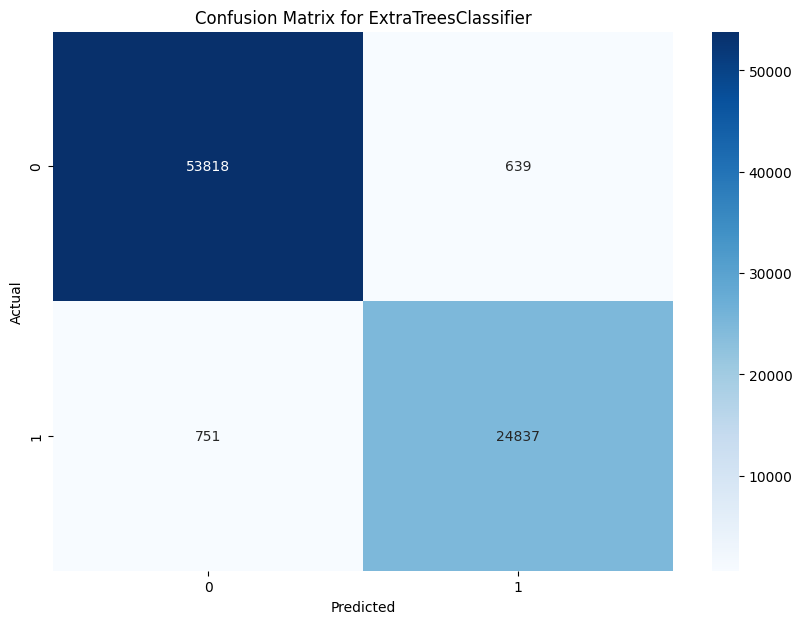

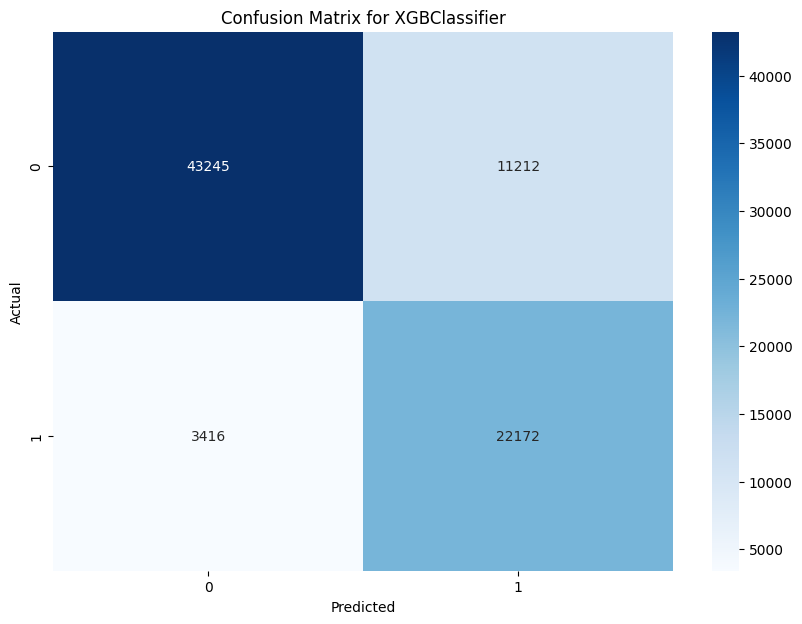

[LightGBM] [Info] Number of positive: 127064, number of negative: 127064
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011646 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 254128, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


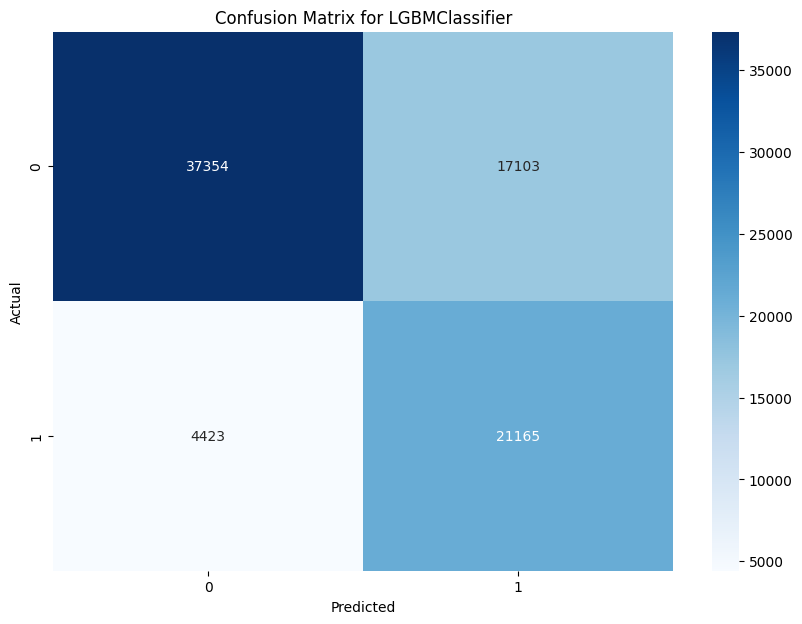

Learning rate set to 0.10962
0:	learn: 0.6859175	total: 138ms	remaining: 2m 18s
1:	learn: 0.6796381	total: 247ms	remaining: 2m 3s
2:	learn: 0.6735123	total: 349ms	remaining: 1m 55s
3:	learn: 0.6691016	total: 439ms	remaining: 1m 49s
4:	learn: 0.6646013	total: 507ms	remaining: 1m 40s
5:	learn: 0.6617545	total: 597ms	remaining: 1m 38s
6:	learn: 0.6575013	total: 658ms	remaining: 1m 33s
7:	learn: 0.6543949	total: 758ms	remaining: 1m 33s
8:	learn: 0.6515383	total: 840ms	remaining: 1m 32s
9:	learn: 0.6490171	total: 918ms	remaining: 1m 30s
10:	learn: 0.6469414	total: 1.01s	remaining: 1m 30s
11:	learn: 0.6451881	total: 1.1s	remaining: 1m 30s
12:	learn: 0.6431233	total: 1.18s	remaining: 1m 29s
13:	learn: 0.6414191	total: 1.26s	remaining: 1m 28s
14:	learn: 0.6398610	total: 1.33s	remaining: 1m 27s
15:	learn: 0.6383977	total: 1.39s	remaining: 1m 25s
16:	learn: 0.6366549	total: 1.46s	remaining: 1m 24s
17:	learn: 0.6353432	total: 1.55s	remaining: 1m 24s
18:	learn: 0.6337627	total: 1.61s	remaining: 1m

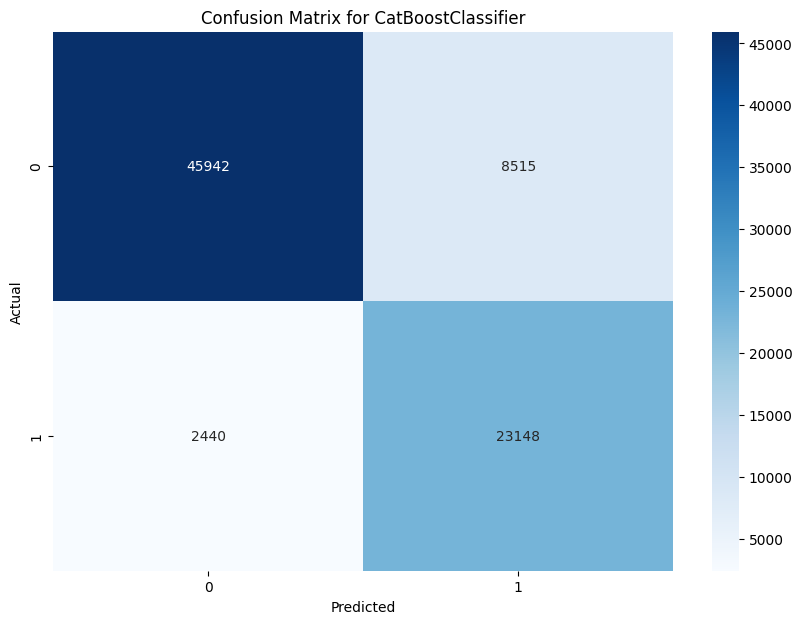

Training Evaluation Metrics
                     Model  Train Accuracy  Train Precision  Train Recall  \
0       LogisticRegression        0.587731         0.588186      0.587731   
1     LogisticRegressionCV        0.592839         0.593074      0.592839   
2              BernoulliNB        0.500016         0.750004      0.500016   
3            CategoricalNB        0.500012         0.750003      0.500012   
4             ComplementNB        0.530796         0.531063      0.530796   
5               GaussianNB        0.558589         0.562660      0.558589   
6            MultinomialNB        0.530796         0.531063      0.530796   
7     KNeighborsClassifier        0.960547         0.961430      0.960547   
8   DecisionTreeClassifier        1.000000         1.000000      1.000000   
9      ExtraTreeClassifier        1.000000         1.000000      1.000000   
10  RandomForestClassifier        1.000000         1.000000      1.000000   
11    ExtraTreesClassifier        1.000000      

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import BernoulliNB, CategoricalNB, ComplementNB, GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = "/content/drive/MyDrive/IMD/updated_reanalysis.csv"
df = pd.read_csv(dataset_path)

# Drop the 'date' column
cleaned_df = df.drop(columns=['date'])

# Split the data into features and target variable
X = cleaned_df.drop(columns=['th'])
y = cleaned_df['th']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('Data has been properly loaded, and train-test split has been performed.')
print('Training features shape:', X_train.shape)
print('Testing features shape:', X_test.shape)
print('Training labels shape:', y_train.shape)
print('Testing labels shape:', y_test.shape)

# Drop pressure level and latitude/longitude columns
X_train_filtered = X_train.drop(columns=['level', 'longitude', 'latitude'])
X_test_filtered = X_test.drop(columns=['level', 'longitude', 'latitude'])

# Normalize input features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print('Feature scaling and SMOTE resampling have been completed.')
print('Resampled training features shape:', X_train_resampled.shape)
print('Resampled training labels shape:', y_train_resampled.shape)

# List of classifiers to be evaluated
algos = (LogisticRegression, LogisticRegressionCV, BernoulliNB, CategoricalNB, ComplementNB, GaussianNB, MultinomialNB,
         KNeighborsClassifier, DecisionTreeClassifier, ExtraTreeClassifier,
         RandomForestClassifier, ExtraTreesClassifier, XGBClassifier, LGBMClassifier, CatBoostClassifier)

# Initialize lists to store evaluation metrics
train_results = []
test_results = []

for algo in algos:
    try:
        model = algo()
        model.fit(X_train_resampled, y_train_resampled)
        train_preds = model.predict(X_train_resampled)
        test_preds = model.predict(X_test_scaled)

        # Training metrics
        train_accuracy = accuracy_score(y_train_resampled, train_preds)
        train_precision = precision_score(y_train_resampled, train_preds, average='weighted')
        train_recall = recall_score(y_train_resampled, train_preds, average='weighted')
        train_f1 = f1_score(y_train_resampled, train_preds, average='weighted')
        train_results.append([algo.__name__, train_accuracy, train_precision, train_recall, train_f1])

        # Testing metrics
        test_accuracy = accuracy_score(y_test, test_preds)
        test_precision = precision_score(y_test, test_preds, average='weighted')
        test_recall = recall_score(y_test, test_preds, average='weighted')
        test_f1 = f1_score(y_test, test_preds, average='weighted')
        test_results.append([algo.__name__, test_accuracy, test_precision, test_recall, test_f1])

        # Print confusion matrix
        cm = confusion_matrix(y_test, test_preds)
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {algo.__name__}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    except Exception as e:
        print(f"Error occurred while running {algo.__name__}: {str(e)}")

# Print the evaluation metrics in table format
train_results_df = pd.DataFrame(train_results, columns=['Model', 'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1 Score'])
test_results_df = pd.DataFrame(test_results, columns=['Model', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score'])

print("Training Evaluation Metrics")
print(train_results_df)
print("\nTesting Evaluation Metrics")
print(test_results_df)


### Model.fit() on all classifier algos without smote and evaluation metrics

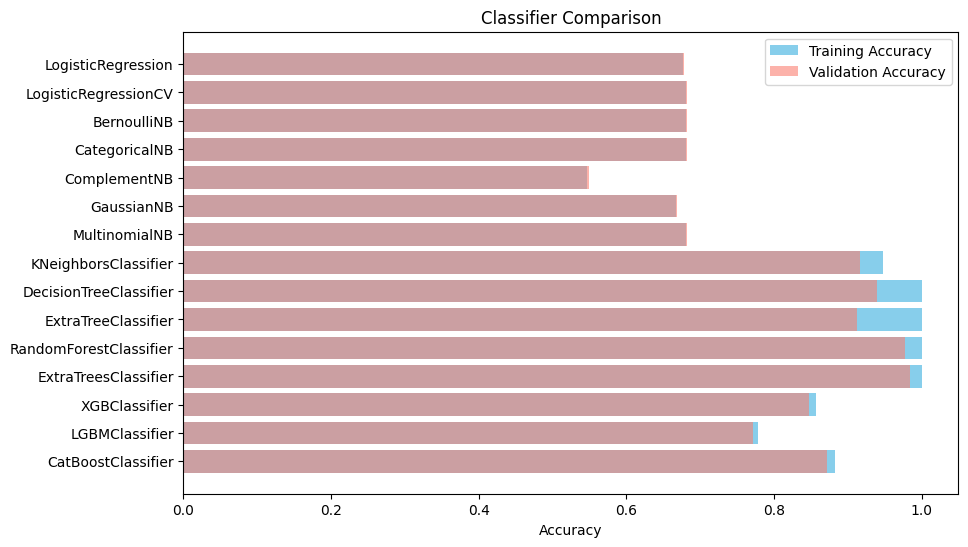

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import BernoulliNB, CategoricalNB, ComplementNB, GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

algos = (LogisticRegression, LogisticRegressionCV, BernoulliNB, CategoricalNB, ComplementNB, GaussianNB, MultinomialNB,
         KNeighborsClassifier,  DecisionTreeClassifier, ExtraTreeClassifier,
         RandomForestClassifier, ExtraTreesClassifier, XGBClassifier, LGBMClassifier, CatBoostClassifier)

for algo in algos:
    try:
        model = algo()
        model.fit(X_train_scaled, y_train)
        train_preds = model.predict(X_train_scaled)
        test_preds = model.predict(X_val_scaled)

        train_accuracy = accuracy_score(y_train, train_preds)
        test_accuracy = accuracy_score(y_val, test_preds)

        print(f"Model: {algo.__name__}")
        print(f"Train Accuracy: {train_accuracy}")
        print(f"Test Accuracy: {test_accuracy}")
        print("----------------------------------------------------")
    except Exception as e:
        print(f"Error occurred while running {algo.__name__}: {str(e)}")


        ## no svc coz time consuming


Model: LogisticRegression
Train Accuracy: 0.6767664869437647
Test Accuracy: 0.6787766728299436
----------------------------------------------------
Model: LogisticRegressionCV
Train Accuracy: 0.6806161622110736
Test Accuracy: 0.6821498176003198
----------------------------------------------------
Model: BernoulliNB
Train Accuracy: 0.6806268706262817
Test Accuracy: 0.6821498176003198
----------------------------------------------------
Model: CategoricalNB
Train Accuracy: 0.6806268706262817
Test Accuracy: 0.6821498176003198
----------------------------------------------------
Model: ComplementNB
Train Accuracy: 0.5470126198673227
Test Accuracy: 0.5499725151166858
----------------------------------------------------
Model: GaussianNB
Train Accuracy: 0.6676750424320953
Test Accuracy: 0.6689820598670732
----------------------------------------------------
Model: MultinomialNB
Train Accuracy: 0.6806161622110736
Test Accuracy: 0.6821498176003198
----------------------------------------------

Error occurred while running VotingClassifier: VotingClassifier.__init__() missing 1 required positional argument: 'estimators'
[LightGBM] [Info] Number of positive: 59651, number of negative: 127118
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 186769, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.319384 -> initscore=-0.756605
[LightGBM] [Info] Start training from score -0.756605
Learning rate set to 0.096113
0:	learn: 0.6734857	total: 32.5ms	remaining: 32.5s
1:	learn: 0.6586468	total: 61.8ms	remaining: 30.8s
2:	learn: 0.6453354	total: 91.4ms	remaining: 30.4s
3:	learn: 0.6362448	total: 118ms	remaining: 29.5s
4:	learn: 0.6285811	total: 145ms	remaining: 28.9s
5:	learn: 0.6219053	total: 176ms	remaining: 29.1s
6:	learn: 0.6162884	total: 210ms	remaining: 

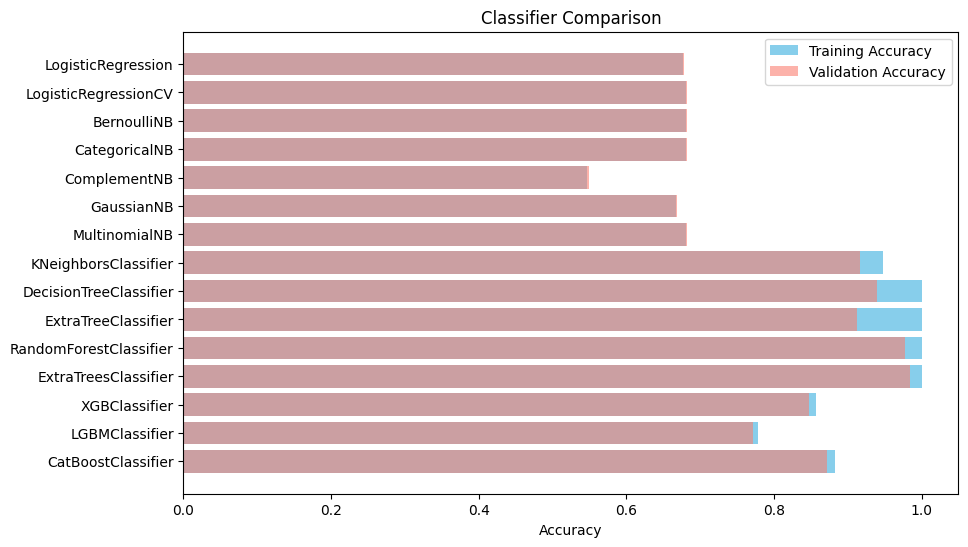

In [ ]:
import matplotlib.pyplot as plt

# List to store model names and their accuracies
model_names = []
train_accuracies = []
test_accuracies = []

# Loop over each classifier
for algo in algos:
    try:
        model = algo()
        model.fit(X_train_scaled, y_train)
        train_preds = model.predict(X_train_scaled)
        test_preds = model.predict(X_val_scaled)

        train_accuracy = accuracy_score(y_train, train_preds)
        test_accuracy = accuracy_score(y_val, test_preds)

        model_names.append(algo.__name__)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    except Exception as e:
        print(f"Error occurred while running {algo.__name__}: {str(e)}")

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(model_names, train_accuracies, color='skyblue', label='Training Accuracy')
plt.barh(model_names, test_accuracies, color='salmon', alpha=0.6, label='Validation Accuracy')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to have the best model on top
plt.show()


### without smote getting results

Data has been properly loaded, and train-test-validation split has been performed.
Training features shape: (186769, 8)
Validation features shape: (40022, 8)
Testing features shape: (40023, 8)
Training labels shape: (186769,)
Validation labels shape: (40022,)
Testing labels shape: (40023,)


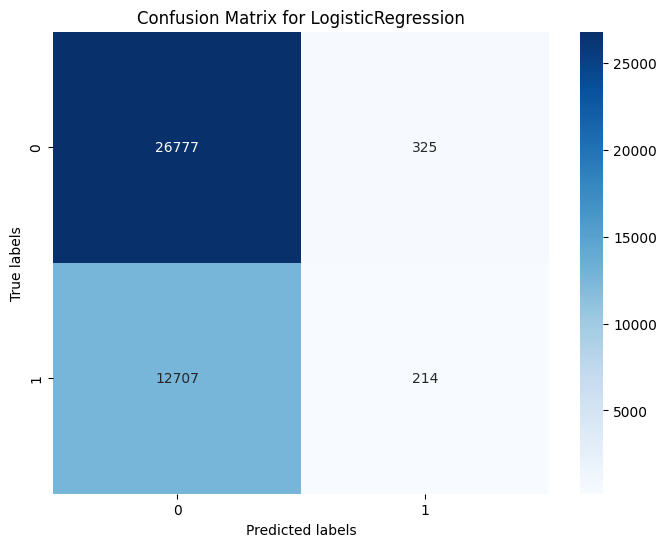

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


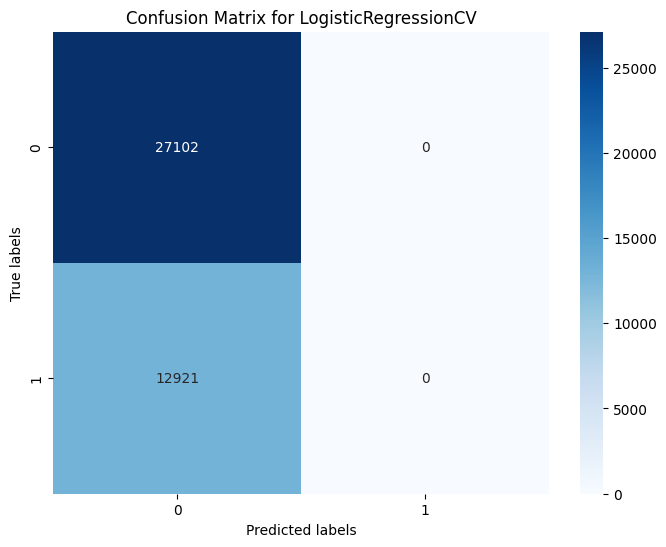

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


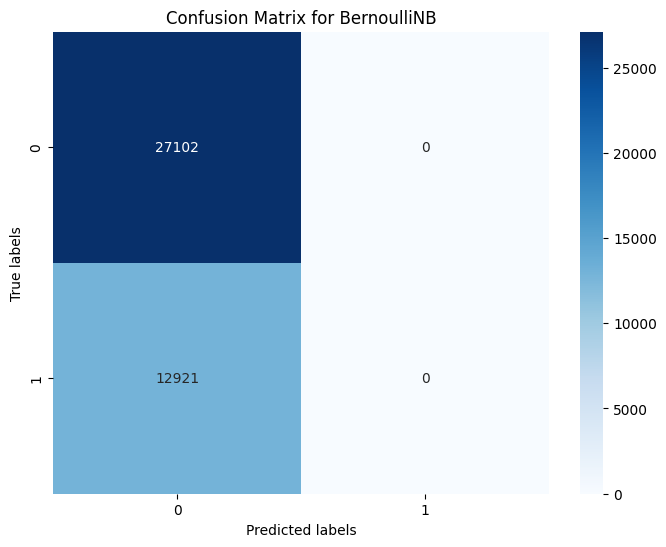

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


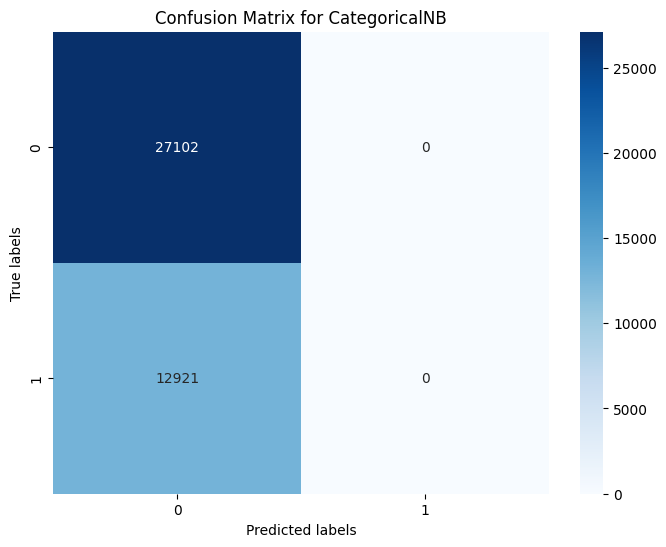

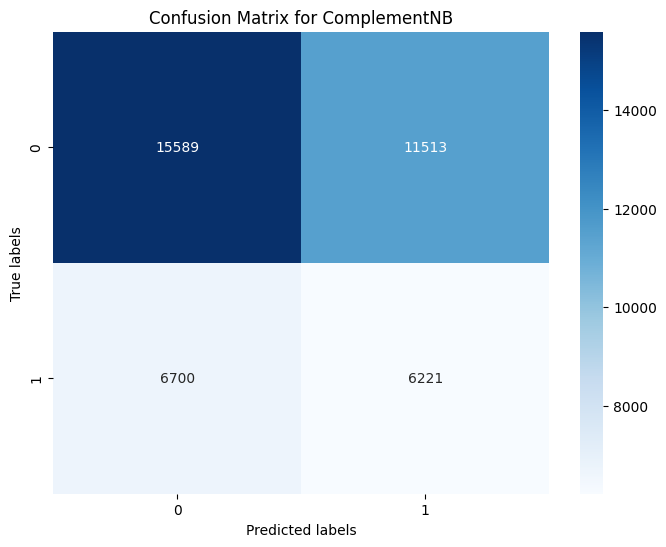

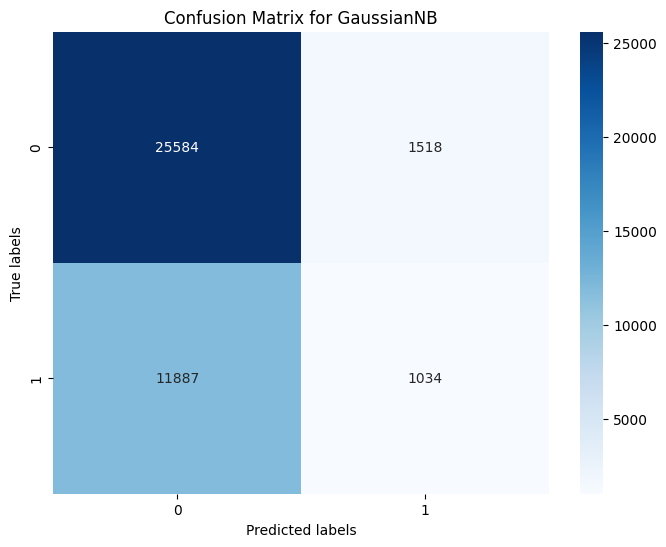

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


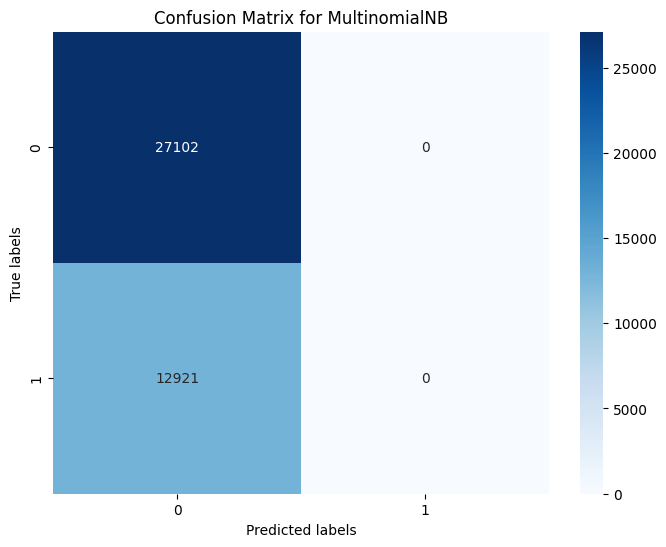

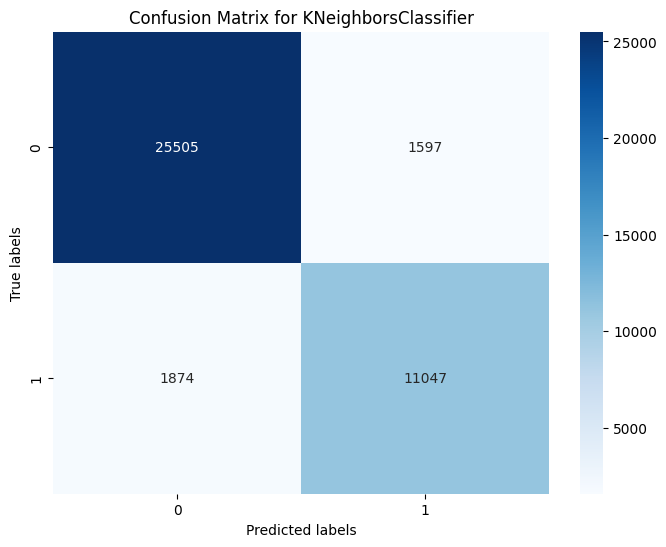

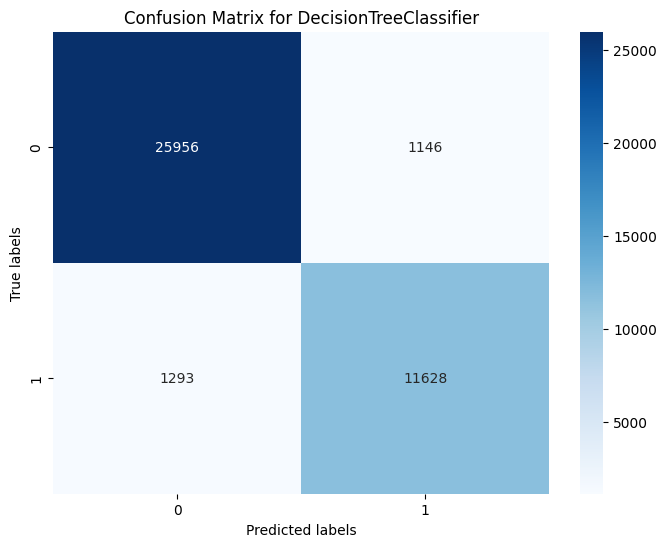

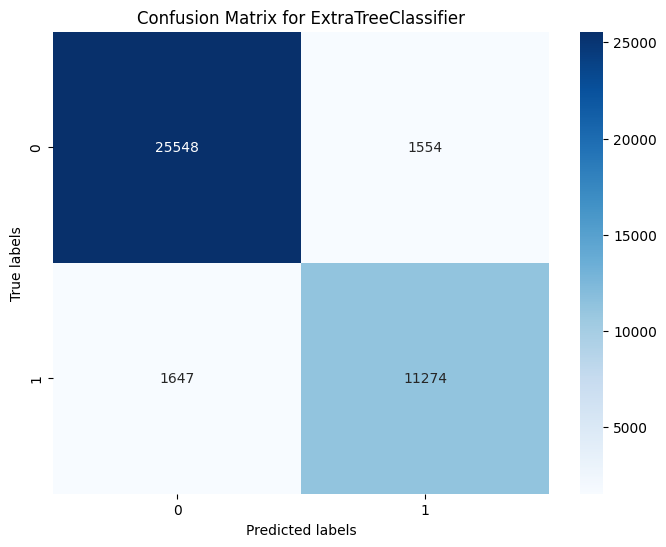

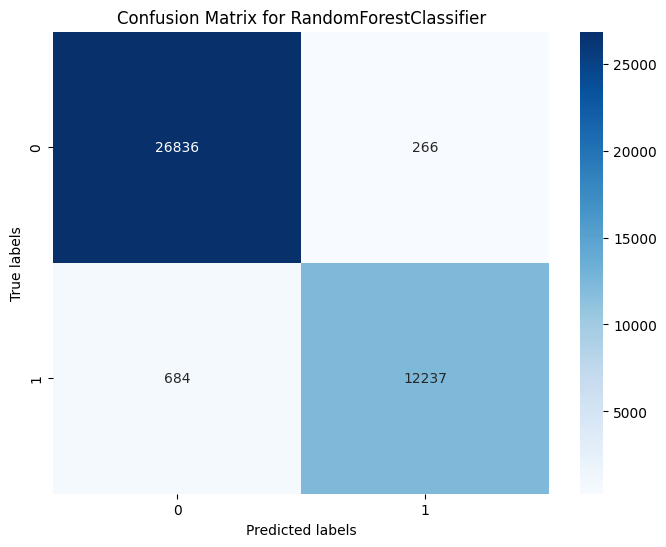

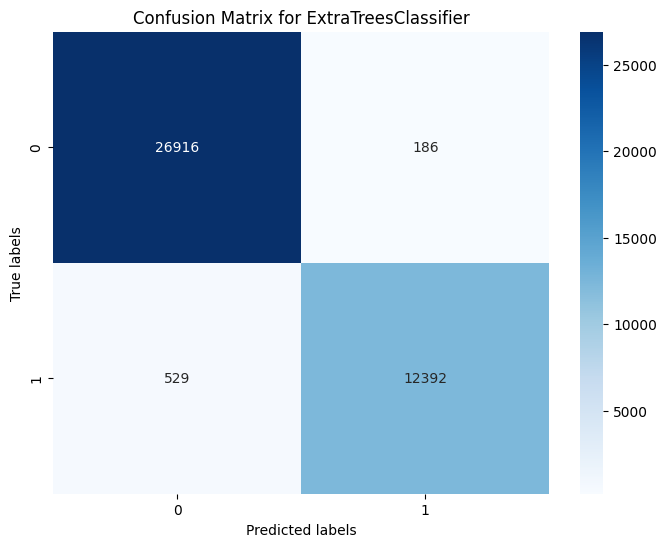

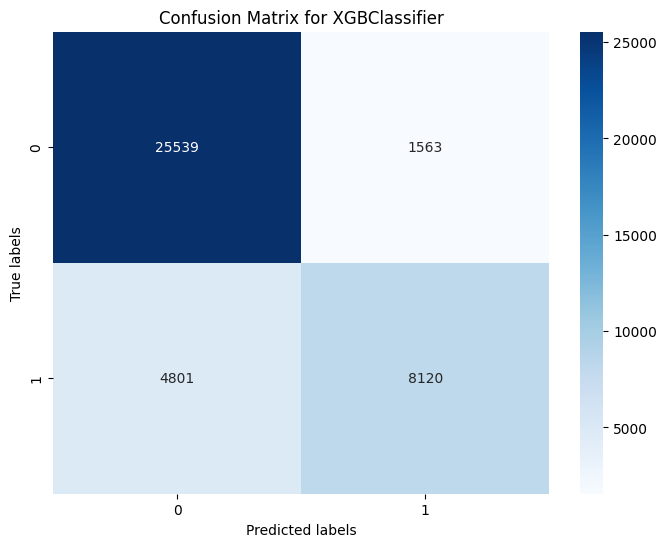

[LightGBM] [Info] Number of positive: 59651, number of negative: 127118
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 186769, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.319384 -> initscore=-0.756605
[LightGBM] [Info] Start training from score -0.756605


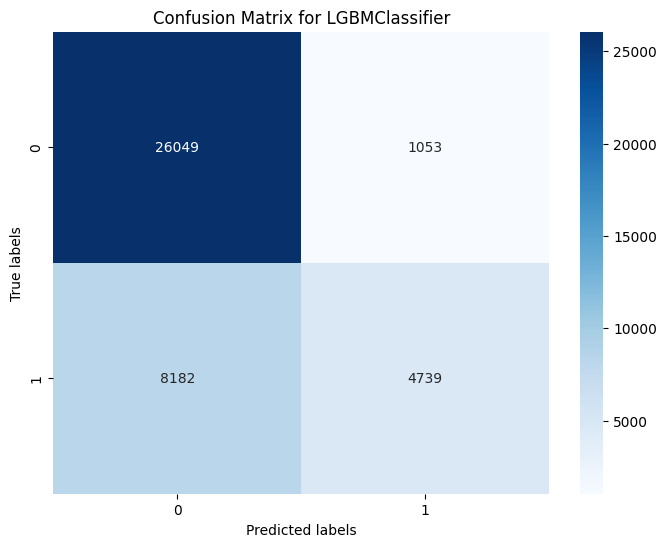

Learning rate set to 0.096113
0:	learn: 0.6734857	total: 33.4ms	remaining: 33.4s
1:	learn: 0.6586468	total: 64.1ms	remaining: 32s
2:	learn: 0.6453354	total: 94.8ms	remaining: 31.5s
3:	learn: 0.6362448	total: 122ms	remaining: 30.4s
4:	learn: 0.6285811	total: 149ms	remaining: 29.7s
5:	learn: 0.6219053	total: 181ms	remaining: 29.9s
6:	learn: 0.6162884	total: 221ms	remaining: 31.3s
7:	learn: 0.6112381	total: 252ms	remaining: 31.3s
8:	learn: 0.6069576	total: 284ms	remaining: 31.2s
9:	learn: 0.6030909	total: 317ms	remaining: 31.3s
10:	learn: 0.5991875	total: 349ms	remaining: 31.4s
11:	learn: 0.5963513	total: 394ms	remaining: 32.4s
12:	learn: 0.5937493	total: 433ms	remaining: 32.8s
13:	learn: 0.5913959	total: 468ms	remaining: 33s
14:	learn: 0.5897445	total: 503ms	remaining: 33.1s
15:	learn: 0.5875266	total: 568ms	remaining: 34.9s
16:	learn: 0.5864297	total: 614ms	remaining: 35.5s
17:	learn: 0.5847783	total: 651ms	remaining: 35.5s
18:	learn: 0.5837900	total: 683ms	remaining: 35.3s
19:	learn: 0

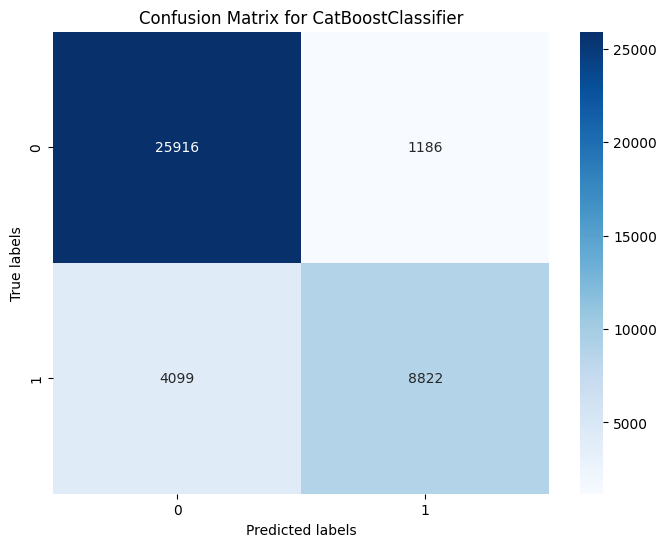

Training Evaluation Metrics
                     Model  Train Accuracy  Train Precision  Train Recall  \
0       LogisticRegression        0.676766         0.578332      0.676766   
1     LogisticRegressionCV        0.680616         0.463238      0.680616   
2              BernoulliNB        0.680627         0.782627      0.680627   
3            CategoricalNB        0.680627         0.782627      0.680627   
4             ComplementNB        0.547013         0.590875      0.547013   
5               GaussianNB        0.667675         0.593455      0.667675   
6            MultinomialNB        0.680616         0.463238      0.680616   
7     KNeighborsClassifier        0.948348         0.948169      0.948348   
8   DecisionTreeClassifier        1.000000         1.000000      1.000000   
9      ExtraTreeClassifier        1.000000         1.000000      1.000000   
10  RandomForestClassifier        1.000000         1.000000      1.000000   
11    ExtraTreesClassifier        1.000000      

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import BernoulliNB, CategoricalNB, ComplementNB, GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = "/content/drive/MyDrive/IMD/updated_reanalysis.csv"
df = pd.read_csv(dataset_path)

# Drop the 'date' column
cleaned_df = df.drop(columns=['date'])

# Split the data into features and target variable
X = cleaned_df.drop(columns=['th'])
y = cleaned_df['th']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print('Data has been properly loaded, and train-test-validation split has been performed.')
print('Training features shape:', X_train.shape)
print('Validation features shape:', X_val.shape)
print('Testing features shape:', X_test.shape)
print('Training labels shape:', y_train.shape)
print('Validation labels shape:', y_val.shape)
print('Testing labels shape:', y_test.shape)

# Normalize input features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=['level', 'longitude', 'latitude']))
X_val_scaled = scaler.transform(X_val.drop(columns=['level', 'longitude', 'latitude']))
X_test_scaled = scaler.transform(X_test.drop(columns=['level', 'longitude', 'latitude']))

algos = (LogisticRegression, LogisticRegressionCV, BernoulliNB, CategoricalNB, ComplementNB, GaussianNB, MultinomialNB,
         KNeighborsClassifier, DecisionTreeClassifier, ExtraTreeClassifier,
         RandomForestClassifier, ExtraTreesClassifier, XGBClassifier, LGBMClassifier, CatBoostClassifier)

# Initialize lists to store evaluation metrics
train_results = []
test_results = []

for algo in algos:
    try:
        model = algo()
        model.fit(X_train_scaled, y_train)
        train_preds = model.predict(X_train_scaled)
        test_preds = model.predict(X_test_scaled)

        # Training metrics
        train_accuracy = accuracy_score(y_train, train_preds)
        train_precision = precision_score(y_train, train_preds, average='weighted')
        train_recall = recall_score(y_train, train_preds, average='weighted')
        train_f1 = f1_score(y_train, train_preds, average='weighted')
        train_results.append([algo.__name__, train_accuracy, train_precision, train_recall, train_f1])

        # Testing metrics
        test_accuracy = accuracy_score(y_test, test_preds)
        test_precision = precision_score(y_test, test_preds, average='weighted')
        test_recall = recall_score(y_test, test_preds, average='weighted')
        test_f1 = f1_score(y_test, test_preds, average='weighted')
        test_results.append([algo.__name__, test_accuracy, test_precision, test_recall, test_f1])

        # Confusion matrix
        cm = confusion_matrix(y_test, test_preds)

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
        plt.title(f'Confusion Matrix for {algo.__name__}')
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.show()

    except Exception as e:
        print(f"Error occurred while running {algo.__name__}: {str(e)}")

# Print the evaluation metrics in table format
train_results_df = pd.DataFrame(train_results, columns=['Model', 'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1 Score'])
test_results_df = pd.DataFrame(test_results, columns=['Model', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score'])

print("Training Evaluation Metrics")
print(train_results_df)
print("\nTesting Evaluation Metrics")
print(test_results_df)


#### JUST PRINT

In [ ]:
results_text = """
                      Model  Train Accuracy  Train Precision  Train Recall  Train F1 Score
0       LogisticRegression        0.680616         0.463238      0.680616        0.558056
1     LogisticRegressionCV        0.680616         0.463238      0.680616        0.558056
2              BernoulliNB        0.680627         0.782627      0.680627        0.551297
3            CategoricalNB        0.680627         0.782627      0.680627        0.551297
4             ComplementNB        0.547013         0.590875      0.547013        0.561110
5               GaussianNB        0.667675         0.593455      0.667675        0.582370
6            MultinomialNB        0.680616         0.463238      0.680616        0.558056
7     KNeighborsClassifier        0.948348         0.948169      0.948348        0.948223
8   DecisionTreeClassifier        1.000000         1.000000      1.000000        1.000000
9      ExtraTreeClassifier        1.000000         1.000000      1.000000        1.000000
10  RandomForestClassifier        1.000000         1.000000      1.000000        1.000000
11    ExtraTreesClassifier        1.000000         1.000000      1.000000        1.000000
12           XGBClassifier        0.857160         0.857317      0.857160        0.851548
13          LGBMClassifier        0.777881         0.789548      0.777881        0.748820
14      CatBoostClassifier        0.882336         0.883424      0.882336        0.878424

                     Model  Test Accuracy  Test Precision  Test Recall  Test F1 Score
0       LogisticRegression       0.674387        0.587410     0.674387       0.554895
1     LogisticRegressionCV       0.677161        0.458547     0.677161       0.546813
2              BernoulliNB       0.677161        0.458547     0.677161       0.546813
3            CategoricalNB       0.677161        0.458547     0.677161       0.546813
4             ComplementNB       0.544937        0.586859     0.544937       0.558488
5               GaussianNB       0.665068        0.593149     0.665068       0.579734
6            MultinomialNB       0.677161        0.458547     0.677161       0.546813
7     KNeighborsClassifier       0.913275        0.912874     0.913275       0.913025
8   DecisionTreeClassifier       0.939060        0.938905     0.939060       0.938968
9      ExtraTreeClassifier       0.920021        0.919880     0.920021       0.919945
10  RandomForestClassifier       0.976264        0.976301     0.976264       0.976159
11    ExtraTreesClassifier       0.982135        0.982174     0.982135       0.982071
12           XGBClassifier       0.840991        0.840734     0.840991       0.834084
13          LGBMClassifier       0.769258        0.779450     0.769258       0.738715
14      CatBoostClassifier       0.867951        0.869265     0.867951       0.862930
"""

print(results_text)



                      Model  Train Accuracy  Train Precision  Train Recall  Train F1 Score
0       LogisticRegression        0.680616         0.463238      0.680616        0.558056
1     LogisticRegressionCV        0.680616         0.463238      0.680616        0.558056
2              BernoulliNB        0.680627         0.782627      0.680627        0.551297
3            CategoricalNB        0.680627         0.782627      0.680627        0.551297
4             ComplementNB        0.547013         0.590875      0.547013        0.561110
5               GaussianNB        0.667675         0.593455      0.667675        0.582370
6            MultinomialNB        0.680616         0.463238      0.680616        0.558056
7     KNeighborsClassifier        0.948348         0.948169      0.948348        0.948223
8   DecisionTreeClassifier        1.000000         1.000000      1.000000        1.000000
9      ExtraTreeClassifier        1.000000         1.000000      1.000000        1.000000
10  Rand

### with some plot shot

Data has been properly loaded, and train-test-validation split has been performed.
Training features shape: (186769, 8)
Validation features shape: (40022, 8)
Testing features shape: (40023, 8)
Training labels shape: (186769,)
Validation labels shape: (40022,)
Testing labels shape: (40023,)


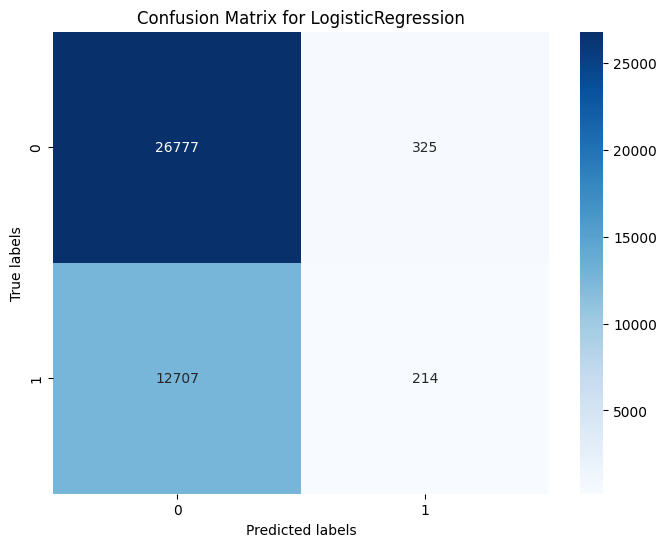

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


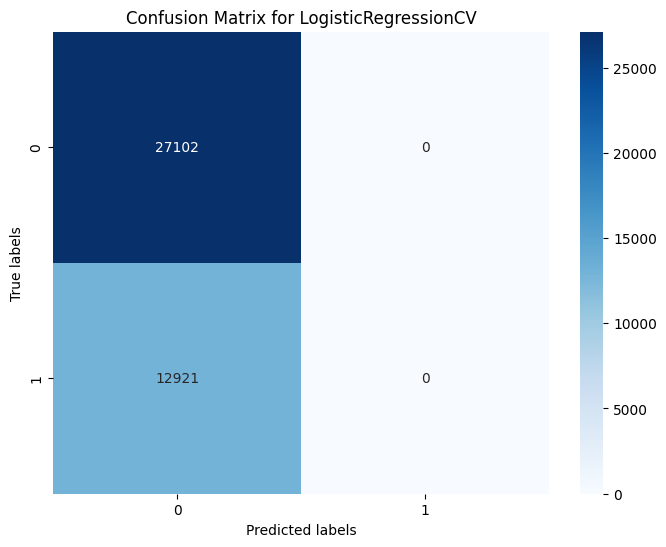

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


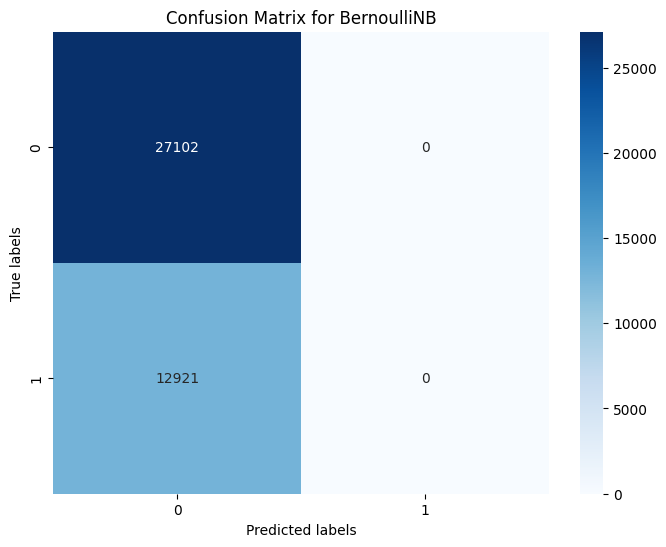

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


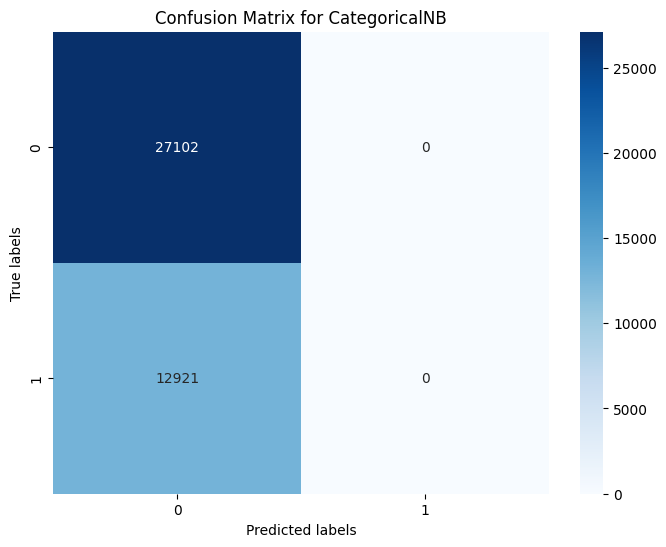

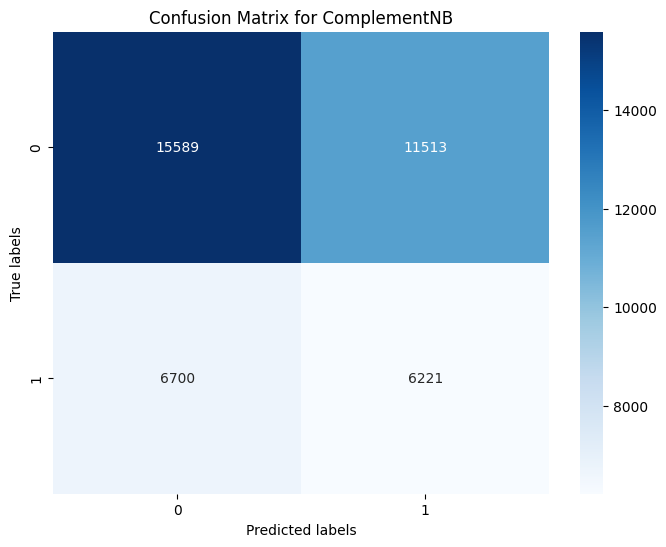

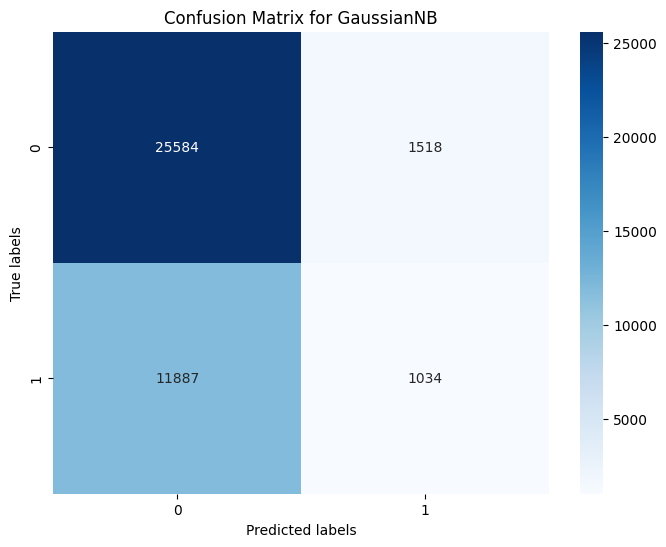

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


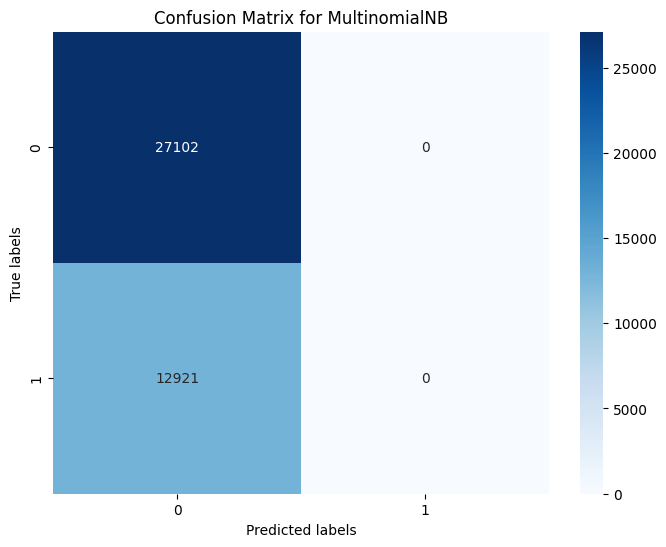

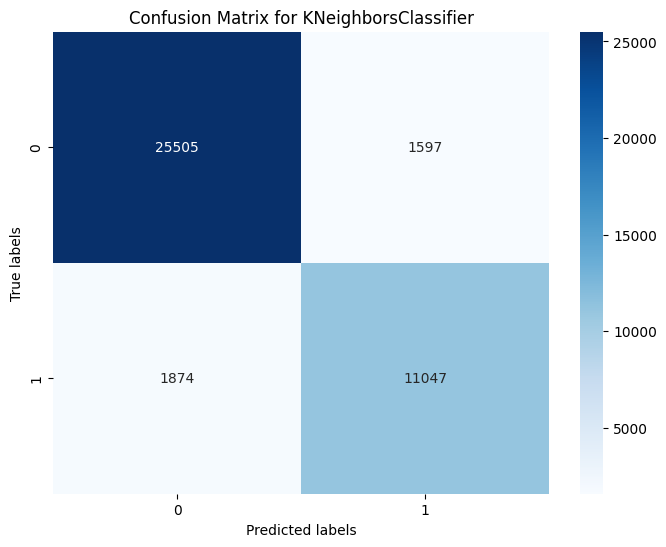

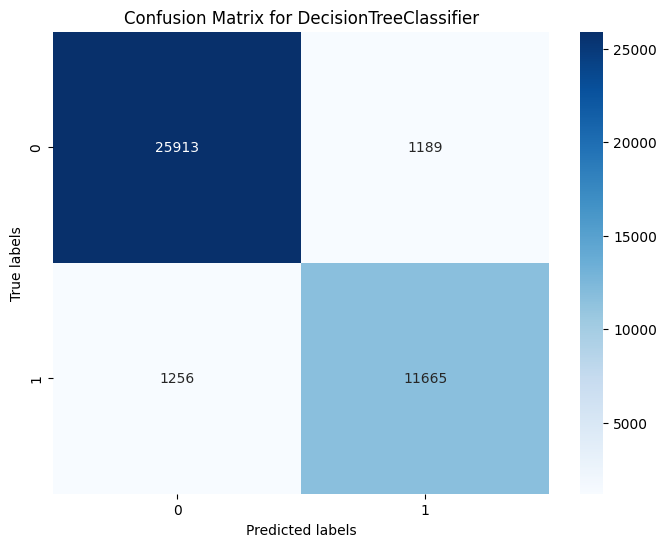

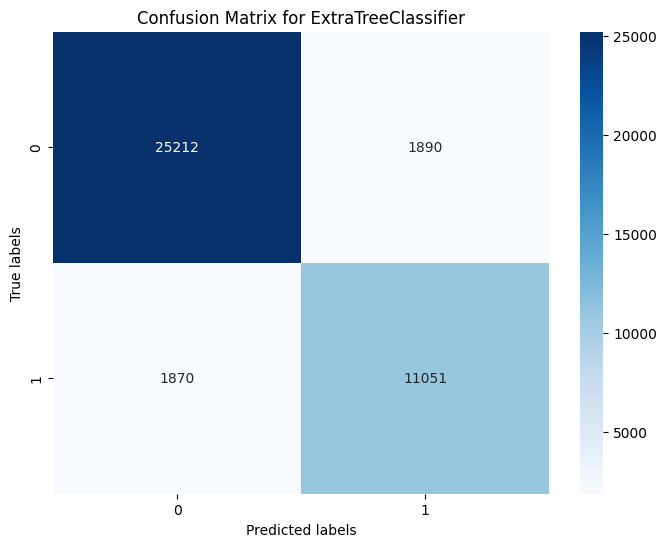

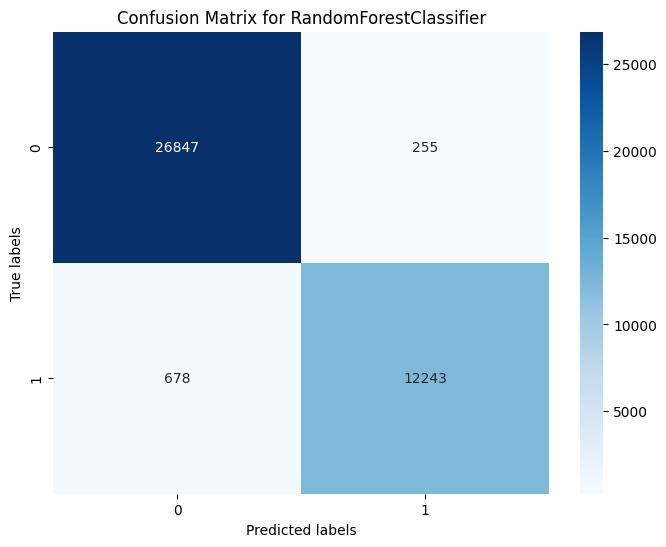

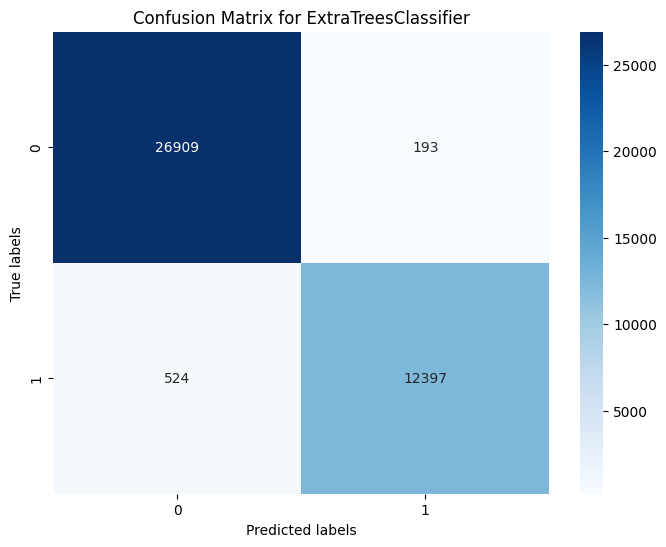

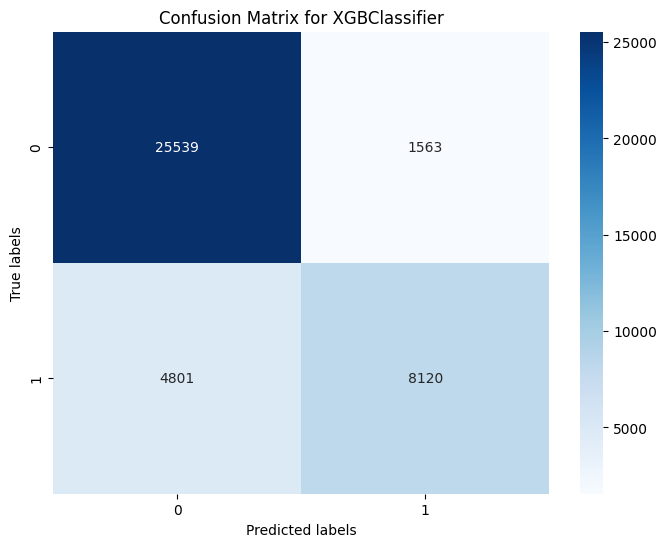

[LightGBM] [Info] Number of positive: 59651, number of negative: 127118
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008542 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 186769, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.319384 -> initscore=-0.756605
[LightGBM] [Info] Start training from score -0.756605


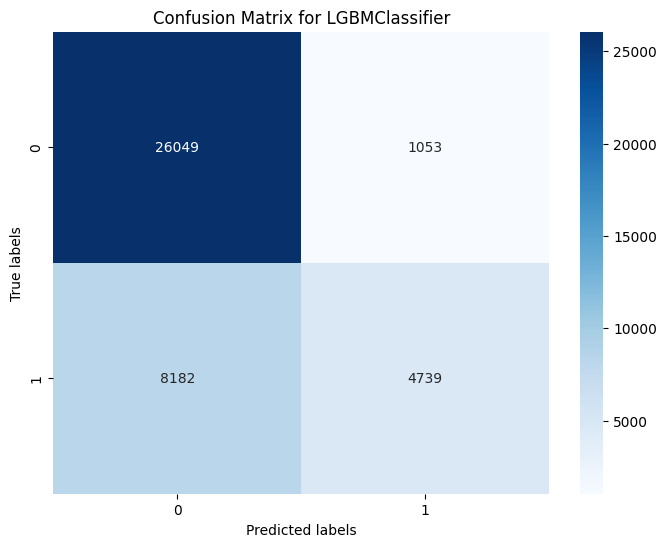

Learning rate set to 0.096113
0:	learn: 0.6734857	total: 78.1ms	remaining: 1m 18s
1:	learn: 0.6586468	total: 150ms	remaining: 1m 14s
2:	learn: 0.6453354	total: 237ms	remaining: 1m 18s
3:	learn: 0.6362448	total: 313ms	remaining: 1m 17s
4:	learn: 0.6285811	total: 360ms	remaining: 1m 11s
5:	learn: 0.6219053	total: 406ms	remaining: 1m 7s
6:	learn: 0.6162884	total: 462ms	remaining: 1m 5s
7:	learn: 0.6112381	total: 520ms	remaining: 1m 4s
8:	learn: 0.6069576	total: 596ms	remaining: 1m 5s
9:	learn: 0.6030909	total: 678ms	remaining: 1m 7s
10:	learn: 0.5991875	total: 725ms	remaining: 1m 5s
11:	learn: 0.5963513	total: 801ms	remaining: 1m 5s
12:	learn: 0.5937493	total: 873ms	remaining: 1m 6s
13:	learn: 0.5913959	total: 947ms	remaining: 1m 6s
14:	learn: 0.5897445	total: 1.01s	remaining: 1m 6s
15:	learn: 0.5875266	total: 1.08s	remaining: 1m 6s
16:	learn: 0.5864297	total: 1.16s	remaining: 1m 7s
17:	learn: 0.5847783	total: 1.24s	remaining: 1m 7s
18:	learn: 0.5837900	total: 1.31s	remaining: 1m 7s
19:	l

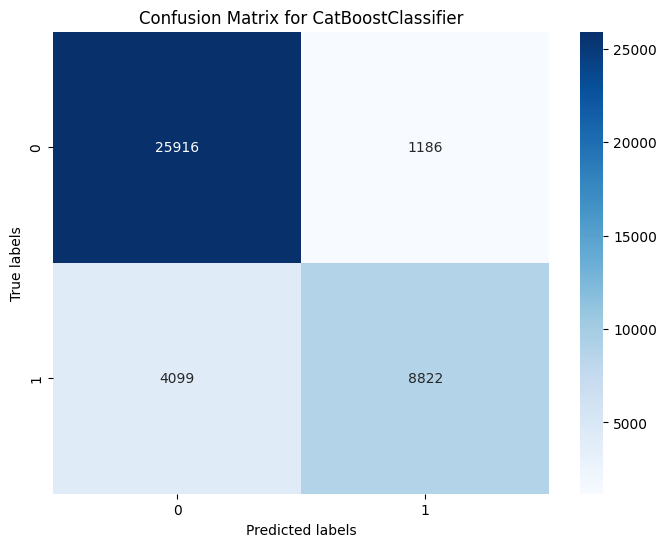

Training Evaluation Metrics
                     Model  Train Accuracy  Train Precision  Train Recall  \
0       LogisticRegression        0.676766         0.578332      0.676766   
1     LogisticRegressionCV        0.680616         0.463238      0.680616   
2              BernoulliNB        0.680627         0.782627      0.680627   
3            CategoricalNB        0.680627         0.782627      0.680627   
4             ComplementNB        0.547013         0.590875      0.547013   
5               GaussianNB        0.667675         0.593455      0.667675   
6            MultinomialNB        0.680616         0.463238      0.680616   
7     KNeighborsClassifier        0.948348         0.948169      0.948348   
8   DecisionTreeClassifier        1.000000         1.000000      1.000000   
9      ExtraTreeClassifier        1.000000         1.000000      1.000000   
10  RandomForestClassifier        1.000000         1.000000      1.000000   
11    ExtraTreesClassifier        1.000000      

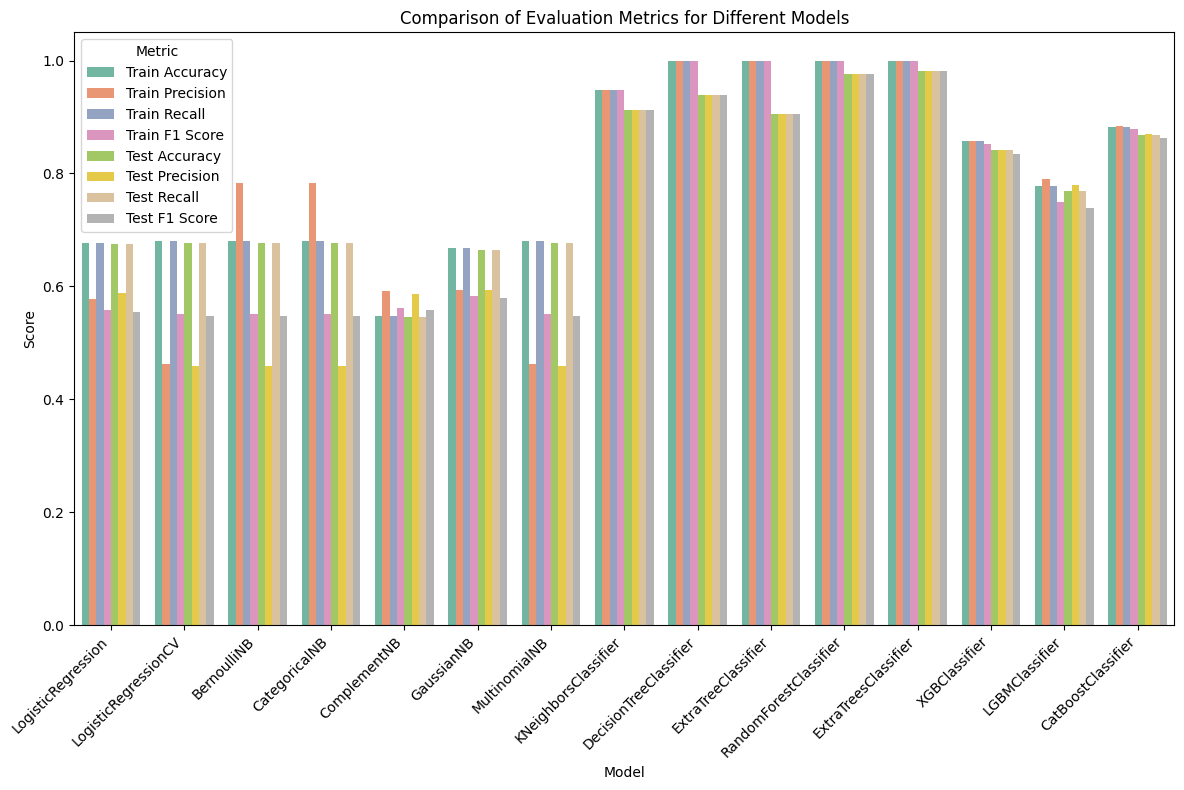

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import BernoulliNB, CategoricalNB, ComplementNB, GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = "/content/drive/MyDrive/IMD/updated_reanalysis.csv"
df = pd.read_csv(dataset_path)

# Drop the 'date' column
cleaned_df = df.drop(columns=['date'])

# Split the data into features and target variable
X = cleaned_df.drop(columns=['th'])
y = cleaned_df['th']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print('Data has been properly loaded, and train-test-validation split has been performed.')
print('Training features shape:', X_train.shape)
print('Validation features shape:', X_val.shape)
print('Testing features shape:', X_test.shape)
print('Training labels shape:', y_train.shape)
print('Validation labels shape:', y_val.shape)
print('Testing labels shape:', y_test.shape)

# Normalize input features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=['level', 'longitude', 'latitude']))
X_val_scaled = scaler.transform(X_val.drop(columns=['level', 'longitude', 'latitude']))
X_test_scaled = scaler.transform(X_test.drop(columns=['level', 'longitude', 'latitude']))

algos = (LogisticRegression, LogisticRegressionCV, BernoulliNB, CategoricalNB, ComplementNB, GaussianNB, MultinomialNB,
         KNeighborsClassifier, DecisionTreeClassifier, ExtraTreeClassifier,
         RandomForestClassifier, ExtraTreesClassifier, XGBClassifier, LGBMClassifier, CatBoostClassifier)

# Initialize lists to store evaluation metrics
train_results = []
test_results = []

for algo in algos:
    try:
        model = algo()
        model.fit(X_train_scaled, y_train)
        train_preds = model.predict(X_train_scaled)
        test_preds = model.predict(X_test_scaled)

        # Training metrics
        train_accuracy = accuracy_score(y_train, train_preds)
        train_precision = precision_score(y_train, train_preds, average='weighted')
        train_recall = recall_score(y_train, train_preds, average='weighted')
        train_f1 = f1_score(y_train, train_preds, average='weighted')
        train_results.append([algo.__name__, train_accuracy, train_precision, train_recall, train_f1])

        # Testing metrics
        test_accuracy = accuracy_score(y_test, test_preds)
        test_precision = precision_score(y_test, test_preds, average='weighted')
        test_recall = recall_score(y_test, test_preds, average='weighted')
        test_f1 = f1_score(y_test, test_preds, average='weighted')
        test_results.append([algo.__name__, test_accuracy, test_precision, test_recall, test_f1])

        # Confusion matrix
        cm = confusion_matrix(y_test, test_preds)

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
        plt.title(f'Confusion Matrix for {algo.__name__}')
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.show()

    except Exception as e:
        print(f"Error occurred while running {algo.__name__}: {str(e)}")

# Print the evaluation metrics in table format
train_results_df = pd.DataFrame(train_results, columns=['Model', 'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1 Score'])
test_results_df = pd.DataFrame(test_results, columns=['Model', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score'])

print("Training Evaluation Metrics")
print(train_results_df)
print("\nTesting Evaluation Metrics")
print(test_results_df)

# Combine training and testing results into a single DataFrame
combined_results_df = pd.merge(train_results_df, test_results_df, on='Model', suffixes=('_train', '_test'))

# Plotting comparison plot
plt.figure(figsize=(12, 8))
sns.barplot(data=combined_results_df.melt(id_vars='Model', var_name='Metric', value_name='Score'),
            x='Model', y='Score', hue='Metric', palette='Set2')
plt.title('Comparison of Evaluation Metrics for Different Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


### POD FAR CSI HSS ADDING with ACCURACY PRECISION RECALL FSCORE

Data has been properly loaded, and train-test-validation split has been performed.
Training features shape: (186769, 8)
Validation features shape: (40022, 8)
Testing features shape: (40023, 8)
Training labels shape: (186769,)
Validation labels shape: (40022,)
Testing labels shape: (40023,)


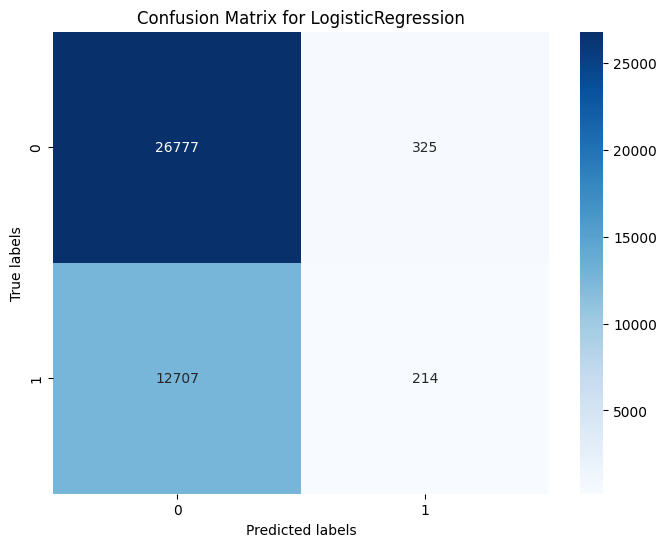

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


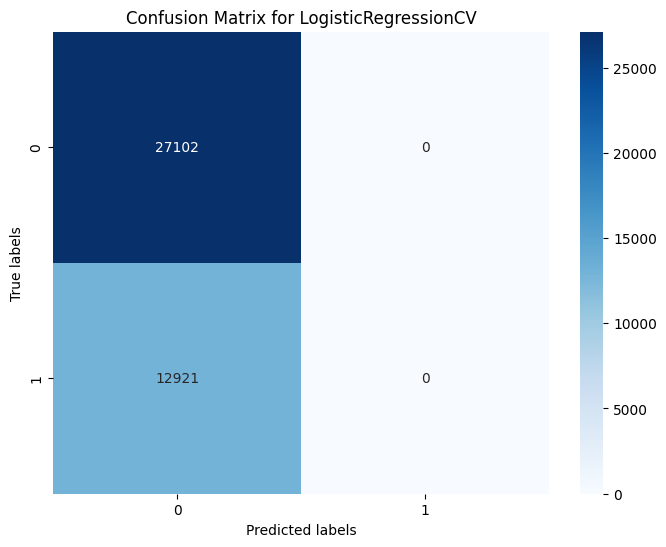

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


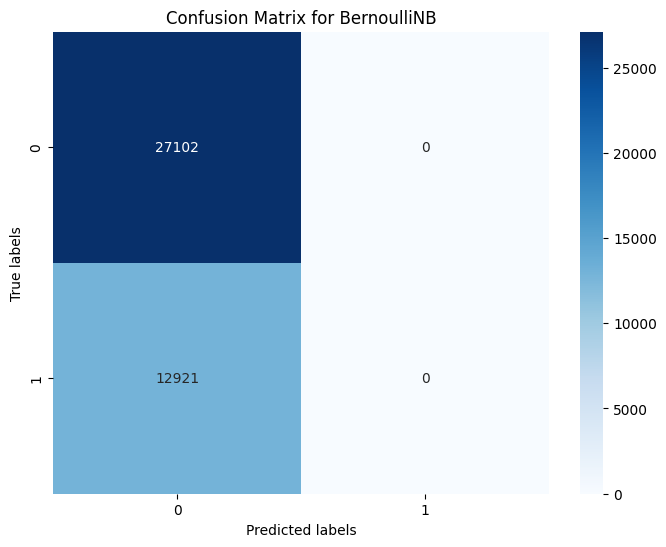

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


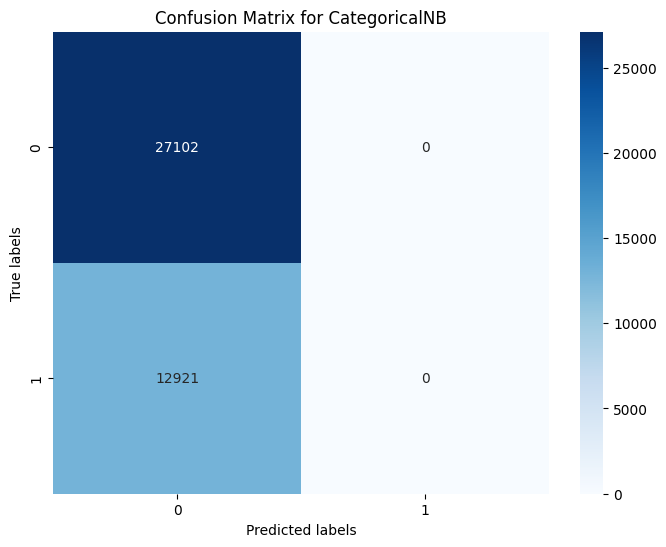

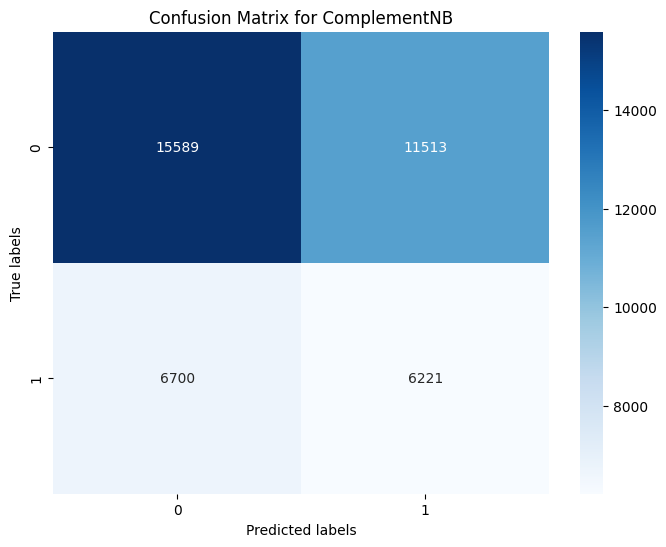

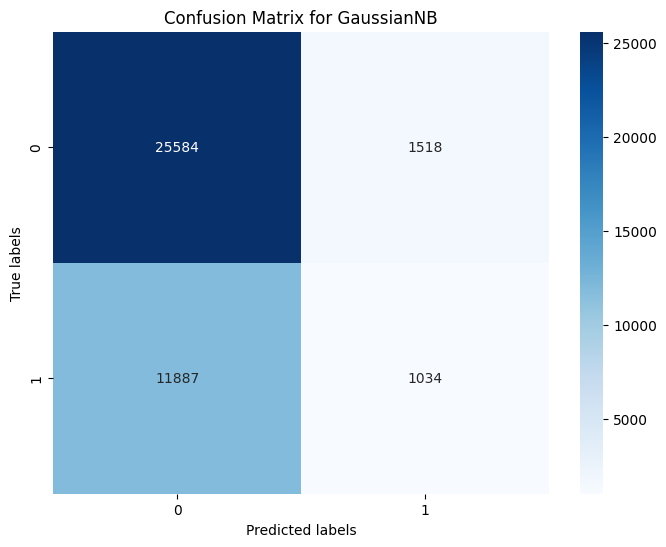

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


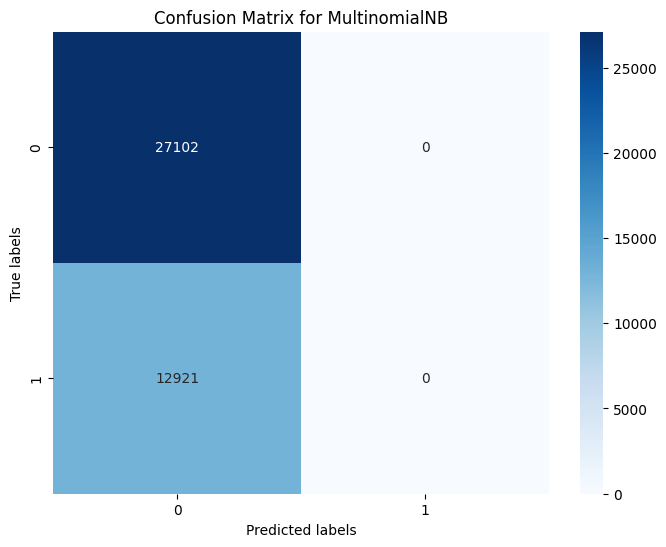

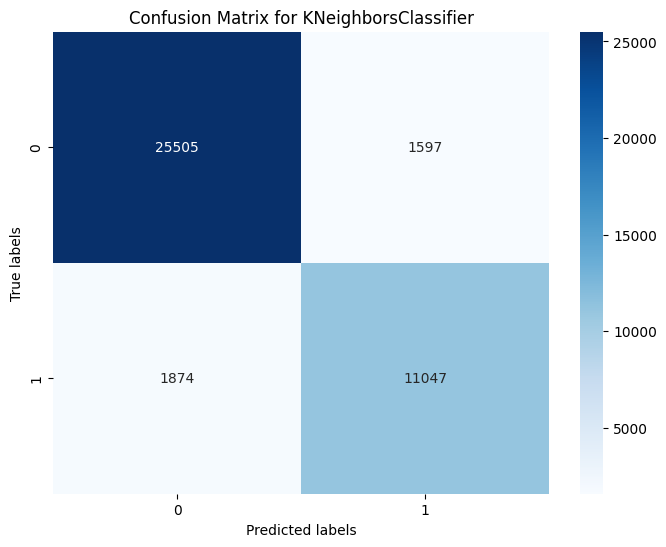

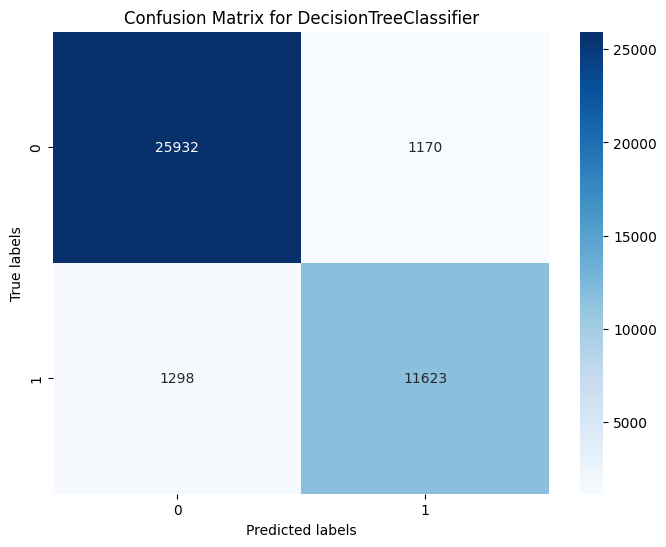

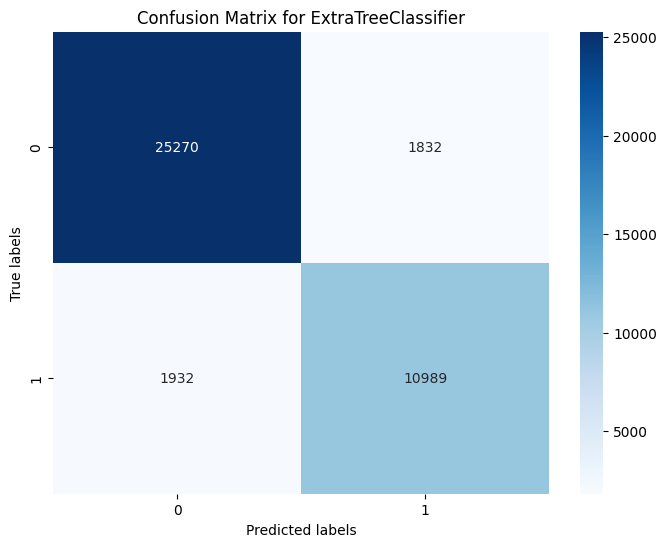

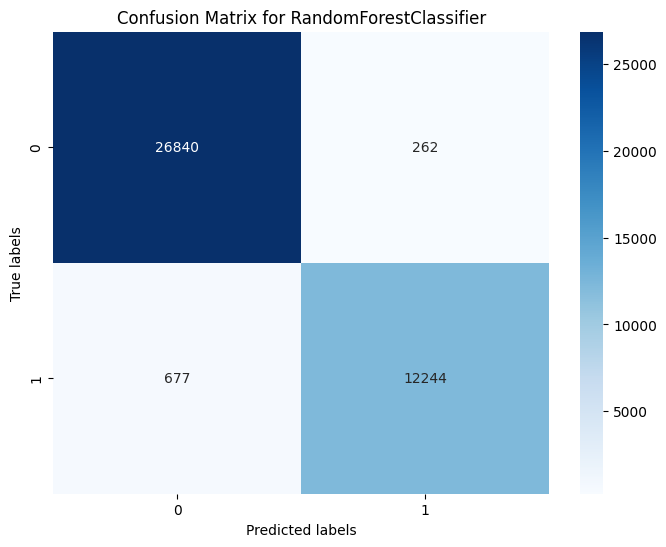

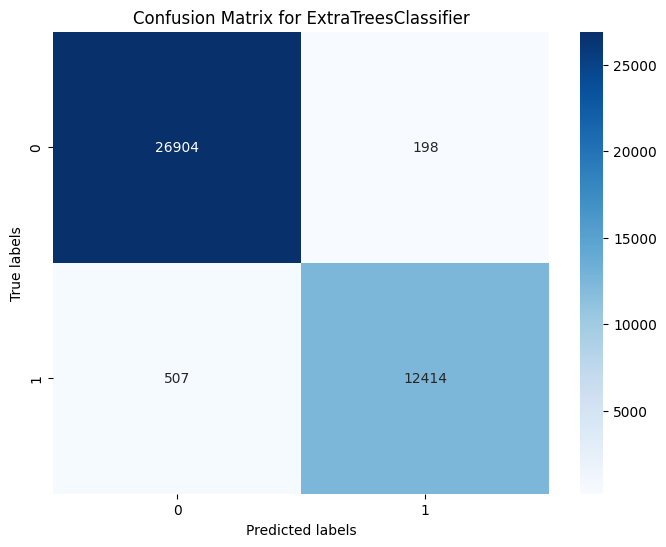

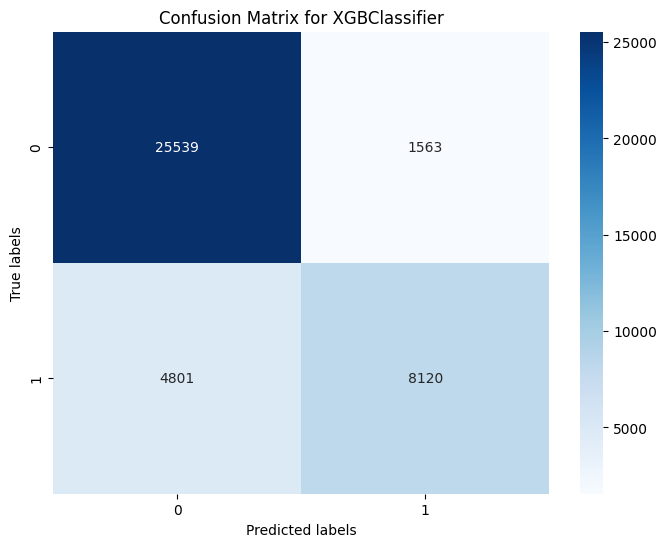

[LightGBM] [Info] Number of positive: 59651, number of negative: 127118
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007839 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 186769, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.319384 -> initscore=-0.756605
[LightGBM] [Info] Start training from score -0.756605


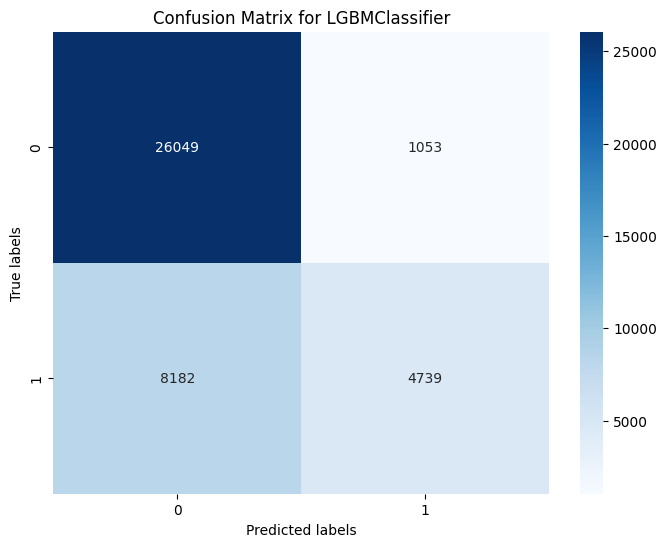

Learning rate set to 0.096113
0:	learn: 0.6734857	total: 83.6ms	remaining: 1m 23s
1:	learn: 0.6586468	total: 115ms	remaining: 57.5s
2:	learn: 0.6453354	total: 148ms	remaining: 49.1s
3:	learn: 0.6362448	total: 176ms	remaining: 43.9s
4:	learn: 0.6285811	total: 212ms	remaining: 42.2s
5:	learn: 0.6219053	total: 245ms	remaining: 40.6s
6:	learn: 0.6162884	total: 276ms	remaining: 39.2s
7:	learn: 0.6112381	total: 308ms	remaining: 38.2s
8:	learn: 0.6069576	total: 342ms	remaining: 37.6s
9:	learn: 0.6030909	total: 374ms	remaining: 37.1s
10:	learn: 0.5991875	total: 406ms	remaining: 36.5s
11:	learn: 0.5963513	total: 447ms	remaining: 36.8s
12:	learn: 0.5937493	total: 480ms	remaining: 36.4s
13:	learn: 0.5913959	total: 511ms	remaining: 36s
14:	learn: 0.5897445	total: 543ms	remaining: 35.6s
15:	learn: 0.5875266	total: 574ms	remaining: 35.3s
16:	learn: 0.5864297	total: 620ms	remaining: 35.9s
17:	learn: 0.5847783	total: 660ms	remaining: 36s
18:	learn: 0.5837900	total: 692ms	remaining: 35.7s
19:	learn: 0.

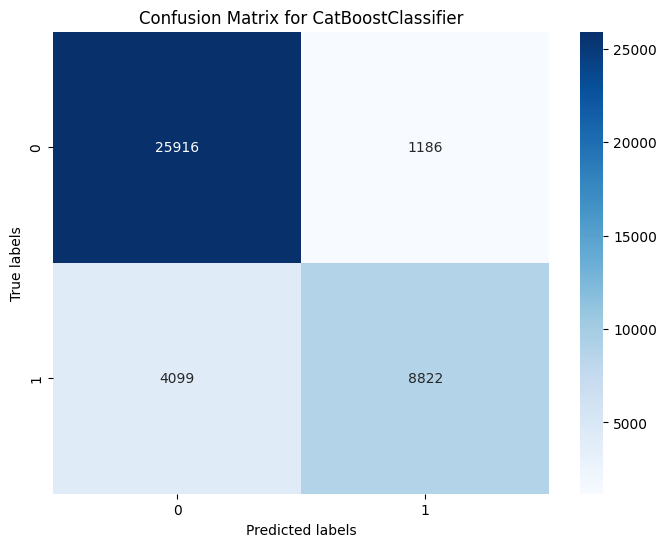

Training Evaluation Metrics
                     Model  Train Accuracy  Train Precision  Train Recall  \
0       LogisticRegression        0.676766         0.578332      0.676766   
1     LogisticRegressionCV        0.680616         0.463238      0.680616   
2              BernoulliNB        0.680627         0.782627      0.680627   
3            CategoricalNB        0.680627         0.782627      0.680627   
4             ComplementNB        0.547013         0.590875      0.547013   
5               GaussianNB        0.667675         0.593455      0.667675   
6            MultinomialNB        0.680616         0.463238      0.680616   
7     KNeighborsClassifier        0.948348         0.948169      0.948348   
8   DecisionTreeClassifier        1.000000         1.000000      1.000000   
9      ExtraTreeClassifier        1.000000         1.000000      1.000000   
10  RandomForestClassifier        1.000000         1.000000      1.000000   
11    ExtraTreesClassifier        1.000000      

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import BernoulliNB, CategoricalNB, ComplementNB, GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = "/content/drive/MyDrive/IMD/updated_reanalysis.csv"
df = pd.read_csv(dataset_path)

# Drop the 'date' column
cleaned_df = df.drop(columns=['date'])

# Split the data into features and target variable
X = cleaned_df.drop(columns=['th'])
y = cleaned_df['th']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print('Data has been properly loaded, and train-test-validation split has been performed.')
print('Training features shape:', X_train.shape)
print('Validation features shape:', X_val.shape)
print('Testing features shape:', X_test.shape)
print('Training labels shape:', y_train.shape)
print('Validation labels shape:', y_val.shape)
print('Testing labels shape:', y_test.shape)

# Normalize input features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=['level', 'longitude', 'latitude']))
X_val_scaled = scaler.transform(X_val.drop(columns=['level', 'longitude', 'latitude']))
X_test_scaled = scaler.transform(X_test.drop(columns=['level', 'longitude', 'latitude']))

algos = (LogisticRegression, LogisticRegressionCV, BernoulliNB, CategoricalNB, ComplementNB, GaussianNB, MultinomialNB,
         KNeighborsClassifier, DecisionTreeClassifier, ExtraTreeClassifier,
         RandomForestClassifier, ExtraTreesClassifier, XGBClassifier, LGBMClassifier, CatBoostClassifier)

# Initialize lists to store evaluation metrics
train_results = []
test_results = []

def calculate_metrics(cm):
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    FAR = FP / (FP + TN) if (FP + TN) != 0 else 0
    POD = TP / (TP + FN) if (TP + FN) != 0 else 0
    CSI = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) != 0 else 0
    total_events = TP + TN + FP + FN
    HSS = 2 * (TP + TN) / total_events - (TP + FP + TN + FN) / (total_events ** 2) if total_events != 0 else 0

    return FAR, POD, CSI, HSS

for algo in algos:
    try:
        model = algo()
        model.fit(X_train_scaled, y_train)
        train_preds = model.predict(X_train_scaled)
        test_preds = model.predict(X_test_scaled)

        # Training metrics
        train_accuracy = accuracy_score(y_train, train_preds)
        train_precision = precision_score(y_train, train_preds, average='weighted')
        train_recall = recall_score(y_train, train_preds, average='weighted')
        train_f1 = f1_score(y_train, train_preds, average='weighted')
        train_cm = confusion_matrix(y_train, train_preds)
        train_far, train_pod, train_csi, train_hss = calculate_metrics(train_cm)
        train_results.append([algo.__name__, train_accuracy, train_precision, train_recall, train_f1, train_far, train_pod, train_csi, train_hss])

        # Testing metrics
        test_accuracy = accuracy_score(y_test, test_preds)
        test_precision = precision_score(y_test, test_preds, average='weighted')
        test_recall = recall_score(y_test, test_preds, average='weighted')
        test_f1 = f1_score(y_test, test_preds, average='weighted')
        test_cm = confusion_matrix(y_test, test_preds)
        test_far, test_pod, test_csi, test_hss = calculate_metrics(test_cm)
        test_results.append([algo.__name__, test_accuracy, test_precision, test_recall, test_f1, test_far, test_pod, test_csi, test_hss])

        # Confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g')
        plt.title(f'Confusion Matrix for {algo.__name__}')
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.show()

    except Exception as e:
        print(f"Error occurred while running {algo.__name__}: {str(e)}")

# Print the evaluation metrics in table format
train_results_df = pd.DataFrame(train_results, columns=['Model', 'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1 Score', 'FAR', 'POD', 'CSI', 'HSS'])
test_results_df = pd.DataFrame(test_results, columns=['Model', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score', 'FAR', 'POD', 'CSI', 'HSS'])

print("Training Evaluation Metrics")
print(train_results_df)
print("\nTesting Evaluation Metrics")
print(test_results_df)


### TOP 5 Performers

<ipython-input-9-f1734f539d51>:13: UserWarning: 
The palette list has fewer values (5) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=top_5_models.melt(id_vars='Model', var_name='Metric', value_name='Score'),


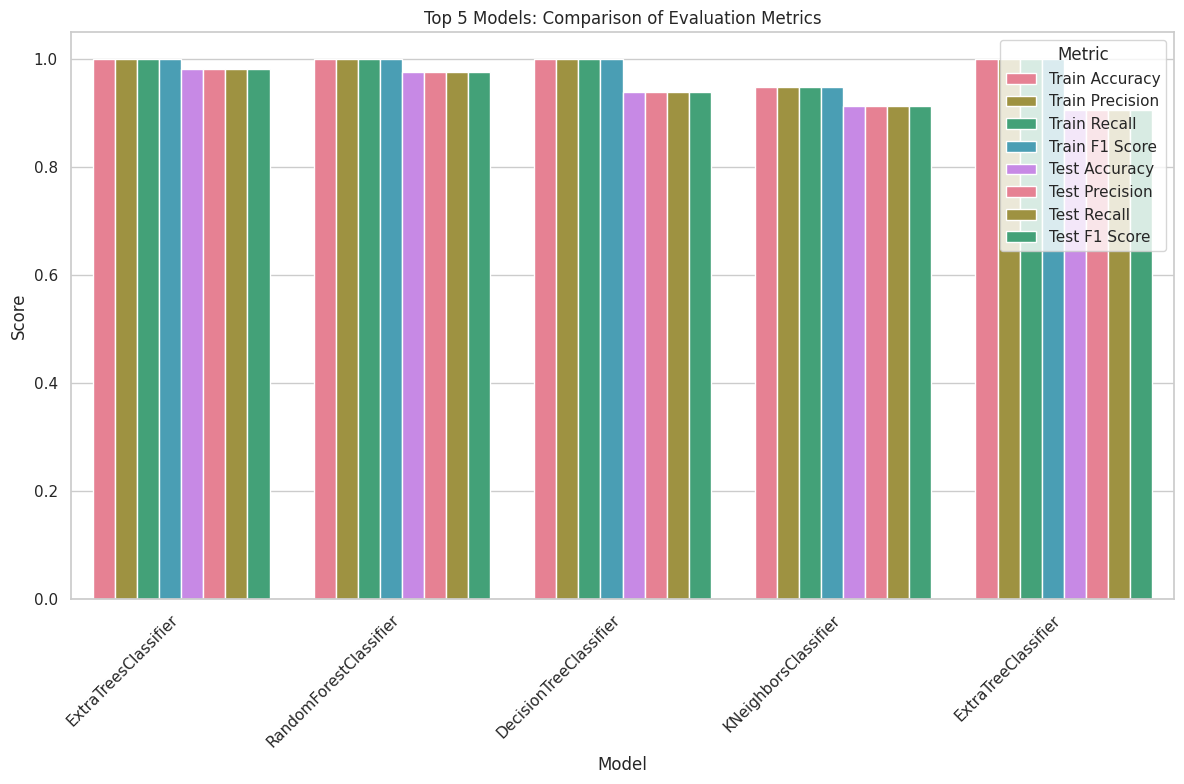

Top 5 Models based on Testing Accuracy:
                     Model  Train Accuracy  Train Precision  Train Recall  \
11    ExtraTreesClassifier        1.000000         1.000000      1.000000   
10  RandomForestClassifier        1.000000         1.000000      1.000000   
8   DecisionTreeClassifier        1.000000         1.000000      1.000000   
7     KNeighborsClassifier        0.948348         0.948169      0.948348   
9      ExtraTreeClassifier        1.000000         1.000000      1.000000   

    Train F1 Score  Test Accuracy  Test Precision  Test Recall  Test F1 Score  
11        1.000000       0.982085        0.982116     0.982085       0.982023  
10        1.000000       0.976688        0.976733     0.976688       0.976585  
8         1.000000       0.938910        0.938833     0.938910       0.938868  
7         0.948223       0.913275        0.912874     0.913275       0.913025  
9         1.000000       0.906054        0.906092     0.906054       0.906073  


In [ ]:
import seaborn as sns

# Combine training and testing results into a single DataFrame
combined_results_df = pd.merge(train_results_df, test_results_df, on='Model', suffixes=('_train', '_test'))

# Select top 5 models based on testing accuracy
top_5_models = combined_results_df.nlargest(5, 'Test Accuracy')

# Plotting comparison plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
palette = sns.color_palette("husl", len(top_5_models))
sns.barplot(data=top_5_models.melt(id_vars='Model', var_name='Metric', value_name='Score'),
            x='Model', y='Score', hue='Metric', palette=palette)
plt.title('Top 5 Models: Comparison of Evaluation Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# Print the DataFrame for top 5 models
print("Top 5 Models based on Testing Accuracy:")
print(top_5_models)


## LIME

LIME (Local Interpretable Model-agnostic Explanations) is a technique used to explain the predictions of machine learning models, particularly black-box models, in a human-interpretable manner. Here's what LIME does:



Local Interpretability: LIME provides explanations for individual predictions rather than the entire model. It focuses on explaining why a model made a specific prediction for a particular instance.

Model-Agnostic: LIME can be used with any machine learning model, regardless of its underlying architecture or complexity. It treats the model as a black box and does not require knowledge of its internal workings.

Interpretable Explanations: LIME generates explanations in the form of simple, interpretable rules or features that contribute most to the model's prediction for a given instance. These explanations are usually presented as weighted combinations of features.

Local Fidelity: LIME constructs local surrogate models around the instance of interest by sampling data points around it. These surrogate models are simpler and more interpretable than the original model but approximate its behavior in the vicinity of the instance.


Tabular Data Support: LIME supports tabular (structured) data, making it suitable for explaining predictions in datasets where features are represented as columns.


In summary, LIME helps users understand the decision-making process of machine learning models by providing locally faithful and interpretable explanations for individual predictions. It is particularly useful in cases where model interpretability is crucial, such as in healthcare, finance, and criminal justice.








In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=1c25fb653e3221197a35768ef332b2691dc0a73b4272377fb281eb5b8ed03a6a
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lime
import lime.lime_tabular

# Load the dataset
dataset_path = "/content/drive/MyDrive/IMD/updated_reanalysis.csv"
df = pd.read_csv(dataset_path)

# Drop the 'date' column
cleaned_df = df.drop(columns=['date'])

# Split the data into features and target variable
X = cleaned_df.drop(columns=['th'])
y = cleaned_df['th']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print('Data has been properly loaded, and train-test-validation split has been performed.')
print('Training features shape:', X_train.shape)
print('Validation features shape:', X_val.shape)
print('Testing features shape:', X_test.shape)
print('Training labels shape:', y_train.shape)
print('Validation labels shape:', y_val.shape)
print('Testing labels shape:', y_test.shape)

# Train a machine learning model (e.g., Random Forest)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   mode='classification',
                                                   feature_names=X_train.columns,
                                                   class_names=y_train.unique(),
                                                   discretize_continuous=True)

# Select a sample for explanation
sample_idx = 0
sample = X_test.iloc[sample_idx]
true_label = y_test.iloc[sample_idx]

# Explain the prediction
explanation = explainer.explain_instance(sample.values,
                                         model.predict_proba,
                                         num_features=len(X_train.columns),
                                         labels=[true_label])

# Print explanation
explanation.show_in_notebook()


Data has been properly loaded, and train-test-validation split has been performed.
Training features shape: (186769, 8)
Validation features shape: (40022, 8)
Testing features shape: (40023, 8)
Training labels shape: (186769,)
Validation labels shape: (40022,)
Testing labels shape: (40023,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




# Simple ANN
## Load data and train

#### Load data

In [ ]:
import pandas as pd

dataset_path = "/content/drive/MyDrive/IMD/updated_reanalysis.csv"
# Load the dataset
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataframe
print(df.head())

# Display the summary statistics of the dataframe
print(df.describe())

# Display the column names and data types
print(df.dtypes)

   longitude  latitude  level  geopotential  specific_humidity  \
0       87.5      23.5    100     161354.40           0.000002   
1       87.5      23.5    100     161558.72           0.000003   
2       87.5      23.5    100     161750.40           0.000003   
3       87.5      23.5    100     161737.80           0.000002   
4       87.5      23.5    100     161800.84           0.000002   

   air_temperature  eastward_wind  northward_wind      date  th  
0        198.14867      29.350992       11.406769  1/3/2015   0  
1        195.22280      24.262028        3.660801  2/3/2015   0  
2        193.39170      26.431646        1.130081  3/3/2015   1  
3        193.94790      22.918640       -1.913664  4/3/2015   0  
4        195.39761      14.185083        1.849530  5/3/2015   0  
           longitude       latitude          level   geopotential  \
count  266814.000000  266814.000000  266814.000000  266814.000000   
mean       88.500000      22.500000     568.518519   59109.760040   


#### Train test val split

In [ ]:
from sklearn.model_selection import train_test_split

# Drop the 'date' column
cleaned_df = df.drop(columns=['date'])

# Split the data into features and target variable
X = cleaned_df.drop(columns=['th'])
y = cleaned_df['th']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print('Data has been properly loaded, and train-test-validation split has been performed.')
print('Training features shape:', X_train.shape)
print('Validation features shape:', X_val.shape)
print('Testing features shape:', X_test.shape)
print('Training labels shape:', y_train.shape)
print('Validation labels shape:', y_val.shape)
print('Testing labels shape:', y_test.shape)


Data has been properly loaded, and train-test-validation split has been performed.
Training features shape: (186769, 8)
Validation features shape: (40022, 8)
Testing features shape: (40023, 8)
Training labels shape: (186769,)
Validation labels shape: (40022,)
Testing labels shape: (40023,)


### Very Basic MLP

## 10 epochs :
Training Loss: 0.6188002228736877

Training Accuracy: 0.6812319159507751

Validation Loss: 0.6170879602432251

Validation Accuracy: 0.6834490895271301

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Define the number of input features
num_features = X_train.shape[1]

# Initialize the MLP model
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(num_features,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
mlp_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = mlp_model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), verbose=1)

# Evaluate the model on training and validation data
train_loss, train_accuracy = mlp_model.evaluate(X_train, y_train, verbose=0)
val_loss, val_accuracy = mlp_model.evaluate(X_val, y_val, verbose=0)

print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


Epoch 1/15
5837/5837 [==============================] - 22s 4ms/step - loss: 55.7952 - accuracy: 0.5683 - val_loss: 8.1941 - val_accuracy: 0.6810
Epoch 2/15
5837/5837 [==============================] - 29s 5ms/step - loss: 16.6575 - accuracy: 0.5737 - val_loss: 6.4470 - val_accuracy: 0.3423
Epoch 3/15
5837/5837 [==============================] - 23s 4ms/step - loss: 6.4380 - accuracy: 0.5797 - val_loss: 1.0455 - val_accuracy: 0.6847
Epoch 4/15
5837/5837 [==============================] - 34s 6ms/step - loss: 2.2687 - accuracy: 0.5973 - val_loss: 1.6359 - val_accuracy: 0.3803
Epoch 5/15
5837/5837 [==============================] - 21s 4ms/step - loss: 1.0734 - accuracy: 0.6228 - val_loss: 0.7134 - val_accuracy: 0.5170
Epoch 6/15
5837/5837 [==============================] - 23s 4ms/step - loss: 0.6836 - accuracy: 0.6575 - val_loss: 0.6229 - val_accuracy: 0.6830
Epoch 7/15
5837/5837 [==============================] - 24s 4ms/step - loss: 0.6250 - accuracy: 0.6811 - val_loss: 0.6230 - val_

#### plot

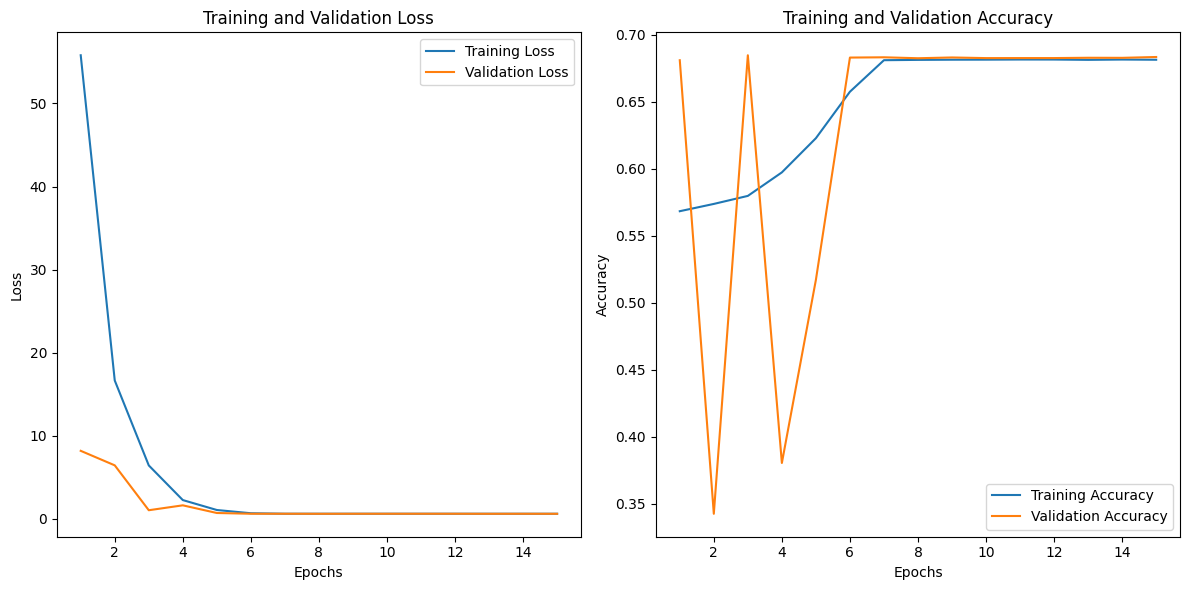

In [ ]:
import matplotlib.pyplot as plt

# Extracting training and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting training and validation accuracy from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


### Little Advanced MLP

## 10 epochs :

Training Loss: 0.6553011536598206

Training Accuracy: 0.5581011772155762

Validation Loss: 0.6523014903068542

Validation Accuracy: 0.5629653930664062

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Normalize input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Apply SMOTE for balancing classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Define the number of input features
num_features = X_train_scaled.shape[1]

# Initialize the MLP model with dropout, batch normalization, and regularization
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(num_features,), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
mlp_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = mlp_model.fit(X_train_balanced, y_train_balanced, epochs=10, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping], verbose=1)

# Evaluate the model on training and validation data
train_loss, train_accuracy = mlp_model.evaluate(X_train_scaled, y_train, verbose=0)
val_loss, val_accuracy = mlp_model.evaluate(X_val_scaled, y_val, verbose=0)

print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


Epoch 1/10
7945/7945 [==============================] - 66s 8ms/step - loss: 0.8522 - accuracy: 0.5834 - val_loss: 0.6807 - val_accuracy: 0.5793
Epoch 2/10
7945/7945 [==============================] - 61s 8ms/step - loss: 0.6803 - accuracy: 0.5993 - val_loss: 0.6678 - val_accuracy: 0.5689
Epoch 3/10
7945/7945 [==============================] - 62s 8ms/step - loss: 0.6771 - accuracy: 0.5997 - val_loss: 0.6601 - val_accuracy: 0.5753
Epoch 4/10
7945/7945 [==============================] - 61s 8ms/step - loss: 0.6756 - accuracy: 0.5997 - val_loss: 0.6678 - val_accuracy: 0.5459
Epoch 5/10
7945/7945 [==============================] - 61s 8ms/step - loss: 0.6750 - accuracy: 0.5990 - val_loss: 0.6658 - val_accuracy: 0.5500
Epoch 6/10
7945/7945 [==============================] - 60s 7ms/step - loss: 0.6744 - accuracy: 0.6000 - val_loss: 0.6810 - val_accuracy: 0.5174
Epoch 7/10
7945/7945 [==============================] - 62s 8ms/step - loss: 0.6736 - accuracy: 0.5998 - val_loss: 0.6567 - val_ac

#### PLOT

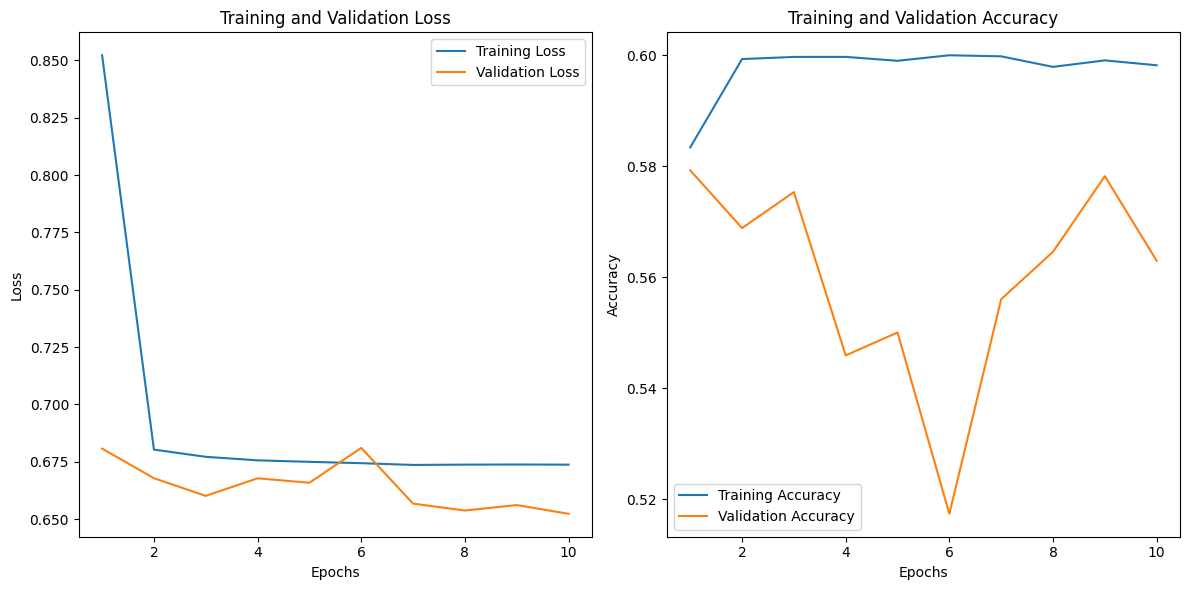

In [ ]:
import matplotlib.pyplot as plt

# Extracting training and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting training and validation accuracy from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


### Achieved bad results , drop features since we know feature importance

### Drop latitude and longitude and check results



Training Loss: 0.6577939987182617

Training Accuracy: 0.5452885627746582

Validation Loss: 0.6554474234580994

Validation Accuracy: 0.5471490621566772

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Remove latitude and longitude columns from the input features
X_train_filtered = X_train.drop(columns=['longitude', 'latitude'])
X_val_filtered = X_val.drop(columns=['longitude', 'latitude'])

# Normalize input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_val_scaled = scaler.transform(X_val_filtered)

# Apply SMOTE for balancing classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Define the number of input features
num_features = X_train_scaled.shape[1]

# Initialize the MLP model with dropout, batch normalization, and regularization
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(num_features,), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
mlp_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = mlp_model.fit(X_train_balanced, y_train_balanced, epochs=10, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping], verbose=1)

# Evaluate the model on training and validation data
train_loss, train_accuracy = mlp_model.evaluate(X_train_scaled, y_train, verbose=0)
val_loss, val_accuracy = mlp_model.evaluate(X_val_scaled, y_val, verbose=0)

print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


Epoch 1/10
7945/7945 [==============================] - 81s 8ms/step - loss: 0.8279 - accuracy: 0.5884 - val_loss: 0.6805 - val_accuracy: 0.5522
Epoch 2/10
7945/7945 [==============================] - 63s 8ms/step - loss: 0.6789 - accuracy: 0.6001 - val_loss: 0.6653 - val_accuracy: 0.5650
Epoch 3/10
7945/7945 [==============================] - 60s 8ms/step - loss: 0.6761 - accuracy: 0.5993 - val_loss: 0.6652 - val_accuracy: 0.5494
Epoch 4/10
7945/7945 [==============================] - 61s 8ms/step - loss: 0.6745 - accuracy: 0.6012 - val_loss: 0.6713 - val_accuracy: 0.5424
Epoch 5/10
7945/7945 [==============================] - 61s 8ms/step - loss: 0.6738 - accuracy: 0.5991 - val_loss: 0.6573 - val_accuracy: 0.5504
Epoch 6/10
7945/7945 [==============================] - 62s 8ms/step - loss: 0.6733 - accuracy: 0.5982 - val_loss: 0.6727 - val_accuracy: 0.5372
Epoch 7/10
7945/7945 [==============================] - 69s 9ms/step - loss: 0.6729 - accuracy: 0.6001 - val_loss: 0.6628 - val_ac

#### plot

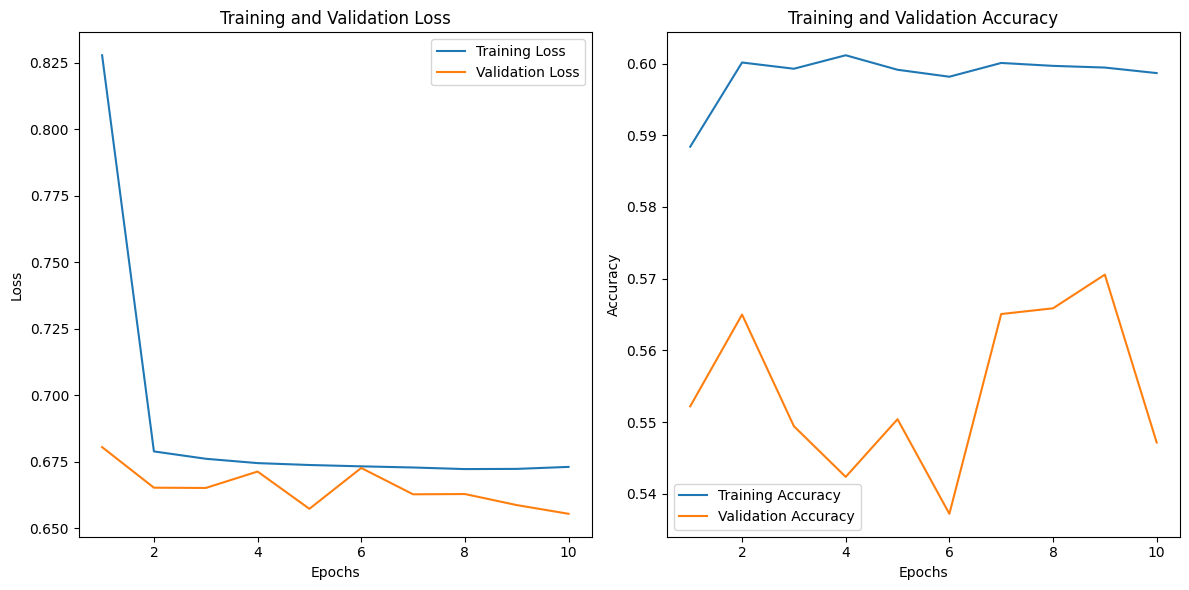

In [ ]:
import matplotlib.pyplot as plt

# Extracting training and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting training and validation accuracy from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


### new test ann

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load the dataset
dataset_path = "/content/drive/MyDrive/IMD/updated_reanalysis.csv"
df = pd.read_csv(dataset_path)

# Drop the 'date' column
cleaned_df = df.drop(columns=['date'])

# Split the data into features and target variable
X = cleaned_df.drop(columns=['th'])
y = cleaned_df['th']

# Split the data into training, validation, and testing sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train_temp, y_train_temp)

# Normalize input features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=['level', 'longitude', 'latitude']))
X_test_scaled = scaler.transform(X_test.drop(columns=['level', 'longitude', 'latitude']))

# Define the MLP model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=72, validation_split=0.2, callbacks=[early_stopping], verbose=2)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_test_scaled, y_test)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Calculate additional evaluation metrics
val_preds = model.predict(X_test_scaled)
val_preds_binary = np.round(val_preds).flatten()

# Calculate metrics
val_accuracy = accuracy_score(y_test, val_preds_binary)
val_precision = precision_score(y_test, val_preds_binary)
val_recall = recall_score(y_test, val_preds_binary)
val_f1 = f1_score(y_test, val_preds_binary)
val_cm = confusion_matrix(y_test, val_preds_binary)
val_far, val_pod, val_csi, val_hss = calculate_metrics(val_cm)

# Print the results
print("Validation Accuracy:", val_accuracy)
print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation F1 Score:", val_f1)
print("Validation FAR:", val_far)
print("Validation POD:", val_pod)
print("Validation CSI:", val_csi)
print("Validation HSS:", val_hss)


# simple LSTM

loss: 0.3195

val_loss: 0.3179

Epoch 1/10
2595/2595 - 16s - loss: 0.3198 - val_loss: 0.3197 - 16s/epoch - 6ms/step
Epoch 2/10
2595/2595 - 11s - loss: 0.3197 - val_loss: 0.3194 - 11s/epoch - 4ms/step
Epoch 3/10
2595/2595 - 10s - loss: 0.3197 - val_loss: 0.3195 - 10s/epoch - 4ms/step
Epoch 4/10
2595/2595 - 9s - loss: 0.3196 - val_loss: 0.3191 - 9s/epoch - 3ms/step
Epoch 5/10
2595/2595 - 12s - loss: 0.3196 - val_loss: 0.3191 - 12s/epoch - 5ms/step
Epoch 6/10
2595/2595 - 11s - loss: 0.3196 - val_loss: 0.3187 - 11s/epoch - 4ms/step
Epoch 7/10
2595/2595 - 11s - loss: 0.3196 - val_loss: 0.3181 - 11s/epoch - 4ms/step
Epoch 8/10
2595/2595 - 9s - loss: 0.3195 - val_loss: 0.3180 - 9s/epoch - 4ms/step
Epoch 9/10
2595/2595 - 11s - loss: 0.3195 - val_loss: 0.3184 - 11s/epoch - 4ms/step
Epoch 10/10
2595/2595 - 10s - loss: 0.3195 - val_loss: 0.3179 - 10s/epoch - 4ms/step


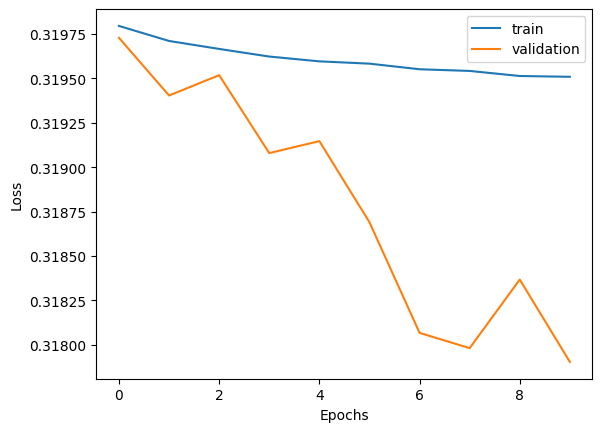

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# Drop pressure level and latitude/longitude columns
X_train_filtered = X_train.drop(columns=['level', 'longitude', 'latitude'])
X_val_filtered = X_val.drop(columns=['level', 'longitude', 'latitude'])

# Normalize input features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_val_scaled = scaler.transform(X_val_filtered)

# Reshape input data for LSTM (assuming X_train_filtered and X_val_filtered are pandas DataFrames)
train_X = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
val_X = X_val_scaled.reshape((X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))

# Initialize the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(loss='mae', optimizer='adam')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(train_X, y_train, epochs=10, batch_size=72, validation_data=(val_X, y_val), callbacks=[early_stopping], verbose=2, shuffle=False)

# Plot history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Simple Transformer model
## Load data and train

#### load data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

dataset_path = "/content/drive/MyDrive/IMD/updated_reanalysis.csv"
# Load the dataset
df = pd.read_csv(dataset_path)


# Drop the 'date' column
cleaned_df = df.drop(columns=['date'])

# Split the data into features and target variable
X = cleaned_df.drop(columns=['th'])
y = cleaned_df['th']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print('Data has been properly loaded, and train-test-validation split has been performed.')
print('Training features shape:', X_train.shape)
print('Validation features shape:', X_val.shape)
print('Testing features shape:', X_test.shape)
print('Training labels shape:', y_train.shape)
print('Validation labels shape:', y_val.shape)
print('Testing labels shape:', y_test.shape)


Data has been properly loaded, and train-test-validation split has been performed.
Training features shape: (186769, 8)
Validation features shape: (40022, 8)
Testing features shape: (40023, 8)
Training labels shape: (186769,)
Validation labels shape: (40022,)
Testing labels shape: (40023,)


DROP PRESSURE LEVELS ,  LATITUDE , LONGITUDE

### 20 epochs :

Validation Loss: 0.4387311637401581

Validation Accuracy: 0.7772474884986877

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# Drop pressure level and latitude/longitude columns
X_train_filtered = X_train.drop(columns=['level', 'longitude', 'latitude'])
X_val_filtered = X_val.drop(columns=['level', 'longitude', 'latitude'])

# Normalize input features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_val_scaled = scaler.transform(X_val_filtered)

# Define the Transformer-like architecture
def transformer_model(input_dim, output_dim, num_layers=4, d_model=128, num_heads=8, dff=512, dropout_rate=0.1):
    inputs = Input(shape=(input_dim,))
    x = inputs

    # Add dense layers as the "encoder" part
    for _ in range(num_layers):
        x = Dense(d_model, activation='relu')(x)
        x = LayerNormalization()(x)
        x = Dropout(dropout_rate)(x)

    # Final output layer
    outputs = Dense(output_dim, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define model parameters
input_dim = X_train_scaled.shape[1]
output_dim = 1  # Binary classification

# Initialize the model
model = transformer_model(input_dim, output_dim)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=72, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping], verbose=2)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


Epoch 1/20
2595/2595 - 78s - loss: 0.6006 - accuracy: 0.6794 - val_loss: 0.5826 - val_accuracy: 0.6876 - 78s/epoch - 30ms/step
Epoch 2/20
2595/2595 - 19s - loss: 0.5805 - accuracy: 0.6886 - val_loss: 0.5639 - val_accuracy: 0.6993 - 19s/epoch - 7ms/step
Epoch 3/20
2595/2595 - 20s - loss: 0.5682 - accuracy: 0.6963 - val_loss: 0.5487 - val_accuracy: 0.7050 - 20s/epoch - 8ms/step
Epoch 4/20
2595/2595 - 18s - loss: 0.5591 - accuracy: 0.7011 - val_loss: 0.5514 - val_accuracy: 0.7043 - 18s/epoch - 7ms/step
Epoch 5/20
2595/2595 - 17s - loss: 0.5517 - accuracy: 0.7054 - val_loss: 0.5438 - val_accuracy: 0.7024 - 17s/epoch - 6ms/step
Epoch 6/20
2595/2595 - 20s - loss: 0.5450 - accuracy: 0.7092 - val_loss: 0.5283 - val_accuracy: 0.7197 - 20s/epoch - 8ms/step
Epoch 7/20
2595/2595 - 17s - loss: 0.5388 - accuracy: 0.7146 - val_loss: 0.5258 - val_accuracy: 0.7266 - 17s/epoch - 6ms/step
Epoch 8/20
2595/2595 - 17s - loss: 0.5333 - accuracy: 0.7180 - val_loss: 0.5154 - val_accuracy: 0.7275 - 17s/epoch - 

### 30 epochs :

Validation Loss: 0.3990980088710785

Validation Accuracy: 0.7981110215187073

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# Drop pressure level and latitude/longitude columns
X_train_filtered = X_train.drop(columns=['level', 'longitude', 'latitude'])
X_val_filtered = X_val.drop(columns=['level', 'longitude', 'latitude'])

# Normalize input features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_val_scaled = scaler.transform(X_val_filtered)

# Define the Transformer-like architecture
def transformer_model(input_dim, output_dim, num_layers=4, d_model=128, num_heads=8, dff=512, dropout_rate=0.1):
    inputs = Input(shape=(input_dim,))
    x = inputs

    # Add dense layers as the "encoder" part
    for _ in range(num_layers):
        x = Dense(d_model, activation='relu')(x)
        x = LayerNormalization()(x)
        x = Dropout(dropout_rate)(x)

    # Final output layer
    outputs = Dense(output_dim, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define model parameters
input_dim = X_train_scaled.shape[1]
output_dim = 1  # Binary classification

# Initialize the model
model = transformer_model(input_dim, output_dim)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=72, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping], verbose=2)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


Epoch 1/30
2595/2595 - 20s - loss: 0.6035 - accuracy: 0.6779 - val_loss: 0.5877 - val_accuracy: 0.6821 - 20s/epoch - 8ms/step
Epoch 2/30
2595/2595 - 17s - loss: 0.5837 - accuracy: 0.6847 - val_loss: 0.5855 - val_accuracy: 0.6893 - 17s/epoch - 6ms/step
Epoch 3/30
2595/2595 - 19s - loss: 0.5725 - accuracy: 0.6930 - val_loss: 0.5612 - val_accuracy: 0.6983 - 19s/epoch - 7ms/step
Epoch 4/30
2595/2595 - 17s - loss: 0.5616 - accuracy: 0.6983 - val_loss: 0.5458 - val_accuracy: 0.7044 - 17s/epoch - 6ms/step
Epoch 5/30
2595/2595 - 17s - loss: 0.5520 - accuracy: 0.7040 - val_loss: 0.5502 - val_accuracy: 0.7050 - 17s/epoch - 6ms/step
Epoch 6/30
2595/2595 - 17s - loss: 0.5521 - accuracy: 0.7063 - val_loss: 0.5399 - val_accuracy: 0.7108 - 17s/epoch - 6ms/step
Epoch 7/30
2595/2595 - 18s - loss: 0.5408 - accuracy: 0.7124 - val_loss: 0.5177 - val_accuracy: 0.7292 - 18s/epoch - 7ms/step
Epoch 8/30
2595/2595 - 21s - loss: 0.5366 - accuracy: 0.7162 - val_loss: 0.5187 - val_accuracy: 0.7274 - 21s/epoch - 8

### 20 epochs

Validation Accuracy: 0.7282994353105792

Validation Precision: 0.6569243840271878

Validation Recall: 0.30390692555616694

Validation F1 Score: 0.4155648715468128

Validation FAR: 0.07395333504267243

Validation POD: 0.30390692555616694

Validation CSI: 0.7282994353105792

Validation HSS: 1.4565738843636

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = "/content/drive/MyDrive/IMD/updated_reanalysis.csv"
df = pd.read_csv(dataset_path)

# Drop the 'date' column
cleaned_df = df.drop(columns=['date'])

# Split the data into features and target variable
X = cleaned_df.drop(columns=['th'])
y = cleaned_df['th']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print('Data has been properly loaded, and train-test-validation split has been performed.')
print('Training features shape:', X_train.shape)
print('Validation features shape:', X_val.shape)
print('Testing features shape:', X_test.shape)
print('Training labels shape:', y_train.shape)
print('Validation labels shape:', y_val.shape)
print('Testing labels shape:', y_test.shape)

# Normalize input features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=['level', 'longitude', 'latitude']))
X_val_scaled = scaler.transform(X_val.drop(columns=['level', 'longitude', 'latitude']))
X_test_scaled = scaler.transform(X_test.drop(columns=['level', 'longitude', 'latitude']))

# Define the Transformer-like architecture
def transformer_model(input_dim, output_dim, num_layers=4, d_model=128, num_heads=8, dff=512, dropout_rate=0.1):
    inputs = Input(shape=(input_dim,))
    x = inputs

    # Add dense layers as the "encoder" part
    for _ in range(num_layers):
        x = Dense(d_model, activation='relu')(x)
        x = LayerNormalization()(x)
        x = Dropout(dropout_rate)(x)

    # Final output layer
    outputs = Dense(output_dim, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define model parameters
input_dim = X_train_scaled.shape[1]
output_dim = 1  # Binary classification

# Initialize the model
model = transformer_model(input_dim, output_dim)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=72, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping], verbose=2)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Calculate additional evaluation metrics
val_preds = model.predict(X_val_scaled)
val_preds_binary = np.round(val_preds).flatten()

# Calculate metrics
val_accuracy = accuracy_score(y_val, val_preds_binary)
val_precision = precision_score(y_val, val_preds_binary)
val_recall = recall_score(y_val, val_preds_binary)
val_f1 = f1_score(y_val, val_preds_binary)
val_cm = confusion_matrix(y_val, val_preds_binary)
val_far, val_pod, val_csi, val_hss = calculate_metrics(val_cm)

# Print the results
print("Validation Accuracy:", val_accuracy)
print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation F1 Score:", val_f1)
print("Validation FAR:", val_far)
print("Validation POD:", val_pod)
print("Validation CSI:", val_csi)
print("Validation HSS:", val_hss)


Data has been properly loaded, and train-test-validation split has been performed.
Training features shape: (186769, 8)
Validation features shape: (40022, 8)
Testing features shape: (40023, 8)
Training labels shape: (186769,)
Validation labels shape: (40022,)
Testing labels shape: (40023,)
Epoch 1/10
2595/2595 - 29s - loss: 0.6013 - accuracy: 0.6786 - val_loss: 0.5797 - val_accuracy: 0.6875 - 29s/epoch - 11ms/step
Epoch 2/10
2595/2595 - 16s - loss: 0.5829 - accuracy: 0.6868 - val_loss: 0.5641 - val_accuracy: 0.6942 - 16s/epoch - 6ms/step
Epoch 3/10
2595/2595 - 17s - loss: 0.5702 - accuracy: 0.6948 - val_loss: 0.5561 - val_accuracy: 0.7004 - 17s/epoch - 7ms/step
Epoch 4/10
2595/2595 - 17s - loss: 0.5604 - accuracy: 0.7007 - val_loss: 0.5440 - val_accuracy: 0.7094 - 17s/epoch - 7ms/step
Epoch 5/10
2595/2595 - 17s - loss: 0.5514 - accuracy: 0.7056 - val_loss: 0.5280 - val_accuracy: 0.7181 - 17s/epoch - 7ms/step
Epoch 6/10
2595/2595 - 18s - loss: 0.5448 - accuracy: 0.7097 - val_loss: 0.550

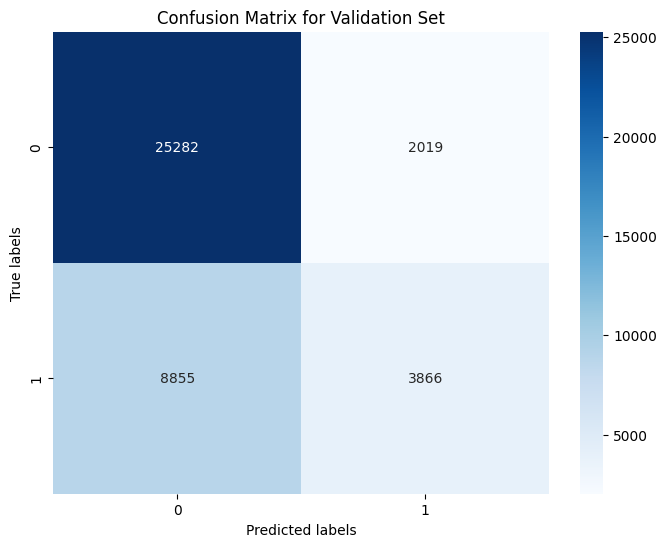

1251/1251 [==============================] - 11s 9ms/step - loss: 0.5221 - accuracy: 0.7203
Test Loss: 0.5221256613731384
Test Accuracy: 0.7202608585357666
1251/1251 [==============================] - 8s 6ms/step


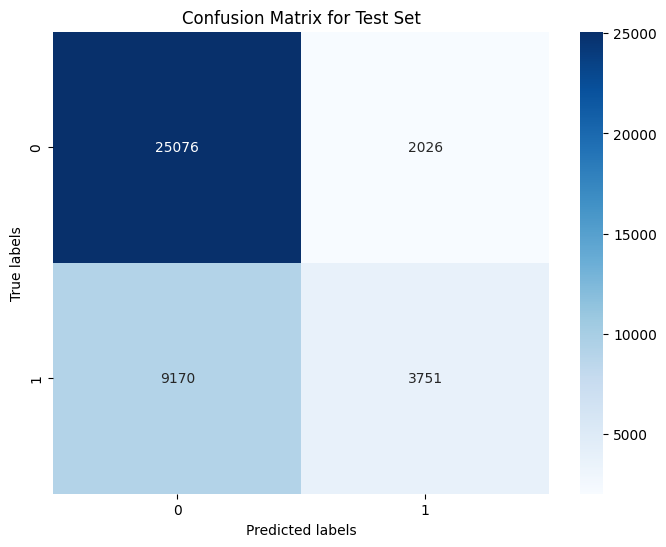

In [ ]:
# Print confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(val_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Validation Set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Calculate predictions for the test set
test_preds = model.predict(X_test_scaled)
test_preds_binary = np.round(test_preds).flatten()

# Calculate confusion matrix for test set
test_cm = confusion_matrix(y_test, test_preds_binary)

# Print confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


### 20 epochs

Validation Accuracy: 0.7018639748138524

Validation Precision: 0.6110954660658969

Validation Recall: 0.17058407357912114

Validation F1 Score: 0.26671583087512296

Validation FAR: 0.05058422768396762

Validation POD: 0.17058407357912114

Validation CSI: 0.7018639748138524

Validation HSS: 1.4037029633701466

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define a deeper model architecture
def create_model(input_dim, output_dim):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(output_dim, activation='sigmoid')
    ])
    return model

# Initialize the model
model = create_model(input_dim, output_dim)

# Compile the model with a lower learning rate
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model with a higher number of epochs
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=128, validation_data=(X_val_scaled, y_val),
                    callbacks=[early_stopping, reduce_lr], verbose=2)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Calculate predictions for validation set
val_preds = model.predict(X_val_scaled)
val_preds_binary = np.round(val_preds).flatten()

# Calculate evaluation metrics
val_accuracy = accuracy_score(y_val, val_preds_binary)
val_precision = precision_score(y_val, val_preds_binary)
val_recall = recall_score(y_val, val_preds_binary)
val_f1 = f1_score(y_val, val_preds_binary)
val_cm = confusion_matrix(y_val, val_preds_binary)
val_far, val_pod, val_csi, val_hss = calculate_metrics(val_cm)

# Print the results
print("Validation Accuracy:", val_accuracy)
print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation F1 Score:", val_f1)
print("Validation FAR:", val_far)
print("Validation POD:", val_pod)
print("Validation CSI:", val_csi)
print("Validation HSS:", val_hss)


Epoch 1/20
1460/1460 - 13s - loss: 0.6231 - accuracy: 0.6758 - val_loss: 0.6067 - val_accuracy: 0.6821 - lr: 1.0000e-04 - 13s/epoch - 9ms/step
Epoch 2/20
1460/1460 - 10s - loss: 0.6080 - accuracy: 0.6805 - val_loss: 0.5988 - val_accuracy: 0.6821 - lr: 1.0000e-04 - 10s/epoch - 7ms/step
Epoch 3/20
1460/1460 - 8s - loss: 0.6018 - accuracy: 0.6807 - val_loss: 0.5936 - val_accuracy: 0.6821 - lr: 1.0000e-04 - 8s/epoch - 5ms/step
Epoch 4/20
1460/1460 - 6s - loss: 0.5986 - accuracy: 0.6806 - val_loss: 0.5918 - val_accuracy: 0.6821 - lr: 1.0000e-04 - 6s/epoch - 4ms/step
Epoch 5/20
1460/1460 - 5s - loss: 0.5953 - accuracy: 0.6806 - val_loss: 0.5884 - val_accuracy: 0.6821 - lr: 1.0000e-04 - 5s/epoch - 4ms/step
Epoch 6/20
1460/1460 - 7s - loss: 0.5932 - accuracy: 0.6806 - val_loss: 0.5865 - val_accuracy: 0.6821 - lr: 1.0000e-04 - 7s/epoch - 4ms/step
Epoch 7/20
1460/1460 - 5s - loss: 0.5906 - accuracy: 0.6806 - val_loss: 0.5841 - val_accuracy: 0.6821 - lr: 1.0000e-04 - 5s/epoch - 4ms/step
Epoch 8/2

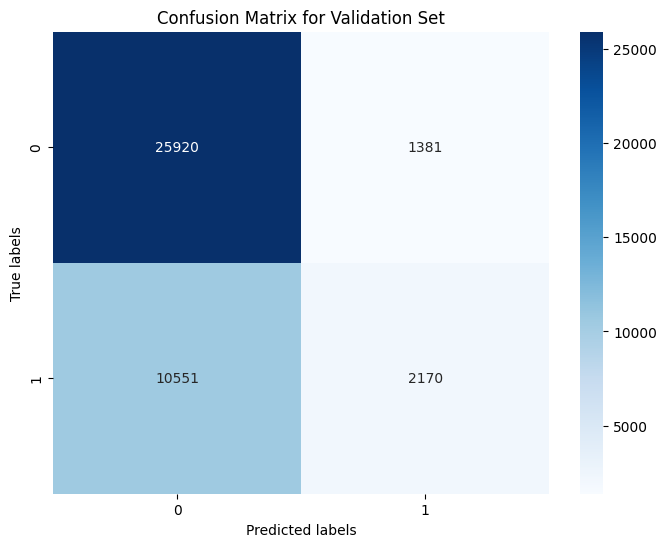

1251/1251 [==============================] - 4s 3ms/step - loss: 0.5636 - accuracy: 0.6982
Test Loss: 0.5636343955993652
Test Accuracy: 0.6982235312461853
1251/1251 [==============================] - 2s 2ms/step


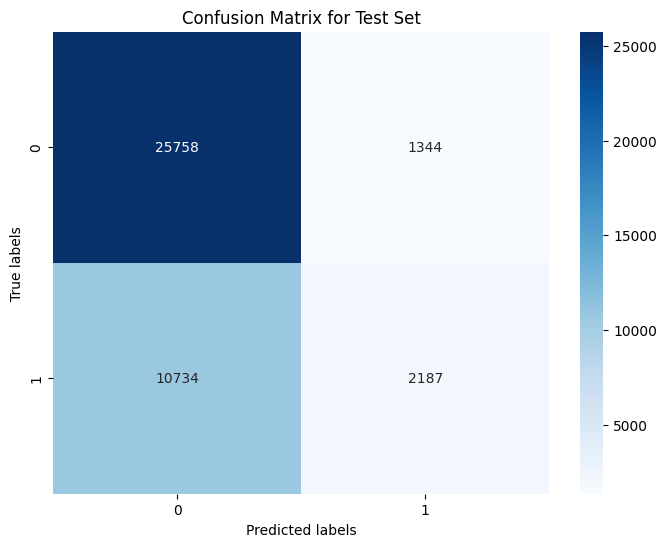

In [ ]:
# Print confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(val_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Validation Set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Calculate predictions for the test set
test_preds = model.predict(X_test_scaled)
test_preds_binary = np.round(test_preds).flatten()

# Calculate confusion matrix for test set
test_cm = confusion_matrix(y_test, test_preds_binary)

# Print confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


### 15 epochs

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.keras import balanced_batch_generator
from imblearn.keras import BalancedBatchGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = "/content/drive/MyDrive/IMD/updated_reanalysis.csv"
df = pd.read_csv(dataset_path)

# Drop the 'date' column
cleaned_df = df.drop(columns=['date'])

# Split the data into features and target variable
X = cleaned_df.drop(columns=['th'])
y = cleaned_df['th']

# Split the data into training, validation, and testing sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train_temp, y_train_temp)

# Normalize input features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=['level', 'longitude', 'latitude']))
X_test_scaled = scaler.transform(X_test.drop(columns=['level', 'longitude', 'latitude']))

# Define the Transformer-like architecture
def transformer_model(input_dim, output_dim, num_layers=4, d_model=128, num_heads=8, dff=512, dropout_rate=0.1):
    inputs = Input(shape=(input_dim,))
    x = inputs

    # Add dense layers as the "encoder" part
    for _ in range(num_layers):
        x = Dense(d_model, activation='relu')(x)
        x = LayerNormalization()(x)
        x = Dropout(dropout_rate)(x)

    # Final output layer
    outputs = Dense(output_dim, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define model parameters
input_dim = X_train_scaled.shape[1]
output_dim = 1  # Binary classification

def calculate_metrics(confusion_matrix):
    TN, FP, FN, TP = confusion_matrix.ravel()

    # False Alarm Rate (FAR)
    far = FP / (FP + TN)

    # Probability of Detection (POD)
    pod = TP / (TP + FN)

    # Heidke Skill Score (HSS)
    total = TP + TN + FP + FN
    hss = 2 * (TP * TN - FP * FN) / ((TP + FN) * (FN + TN) + (TP + FP) * (FP + TN))

    # Critical Success Index (CSI)
    csi = TP / (TP + FN + FP)

    return far, pod, csi, hss

# Initialize the model
model = transformer_model(input_dim, output_dim)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=72, validation_split=0.2, callbacks=[early_stopping], verbose=2)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_test_scaled, y_test)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Calculate additional evaluation metrics
val_preds = model.predict(X_test_scaled)
val_preds_binary = np.round(val_preds).flatten()

# Calculate metrics
val_accuracy = accuracy_score(y_test, val_preds_binary)
val_precision = precision_score(y_test, val_preds_binary)
val_recall = recall_score(y_test, val_preds_binary)
val_f1 = f1_score(y_test, val_preds_binary)
val_cm = confusion_matrix(y_test, val_preds_binary)
val_far, val_pod, val_csi, val_hss = calculate_metrics(val_cm)

# Print the results
print("Validation Accuracy:", val_accuracy)
print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation F1 Score:", val_f1)
print("Validation FAR:", val_far)
print("Validation POD:", val_pod)
print("Validation CSI:", val_csi)
print("Validation HSS:", val_hss)


Epoch 1/30
3230/3230 - 74s - loss: 0.6256 - accuracy: 0.6285 - val_loss: 0.8968 - val_accuracy: 0.1181 - 74s/epoch - 23ms/step
Epoch 2/30
3230/3230 - 35s - loss: 0.6016 - accuracy: 0.6473 - val_loss: 0.9073 - val_accuracy: 0.1956 - 35s/epoch - 11ms/step
Epoch 3/30
3230/3230 - 36s - loss: 0.5881 - accuracy: 0.6600 - val_loss: 0.7452 - val_accuracy: 0.3853 - 36s/epoch - 11ms/step
Epoch 4/30
3230/3230 - 38s - loss: 0.5765 - accuracy: 0.6707 - val_loss: 0.7592 - val_accuracy: 0.3956 - 38s/epoch - 12ms/step
Epoch 5/30
3230/3230 - 37s - loss: 0.5683 - accuracy: 0.6775 - val_loss: 0.7678 - val_accuracy: 0.4000 - 37s/epoch - 11ms/step
Epoch 6/30
3230/3230 - 37s - loss: 0.5613 - accuracy: 0.6848 - val_loss: 0.7566 - val_accuracy: 0.3982 - 37s/epoch - 11ms/step
Epoch 7/30
3230/3230 - 36s - loss: 0.5547 - accuracy: 0.6895 - val_loss: 0.8027 - val_accuracy: 0.3629 - 36s/epoch - 11ms/step
Epoch 8/30
3230/3230 - 37s - loss: 0.5464 - accuracy: 0.6944 - val_loss: 0.7475 - val_accuracy: 0.4391 - 37s/ep

In [ ]:
# Print confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(val_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Validation Set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Calculate predictions for the test set
test_preds = model.predict(X_test_scaled)
test_preds_binary = np.round(test_preds).flatten()

# Calculate confusion matrix for test set
test_cm = confusion_matrix(y_test, test_preds_binary)

# Print confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


#### plot

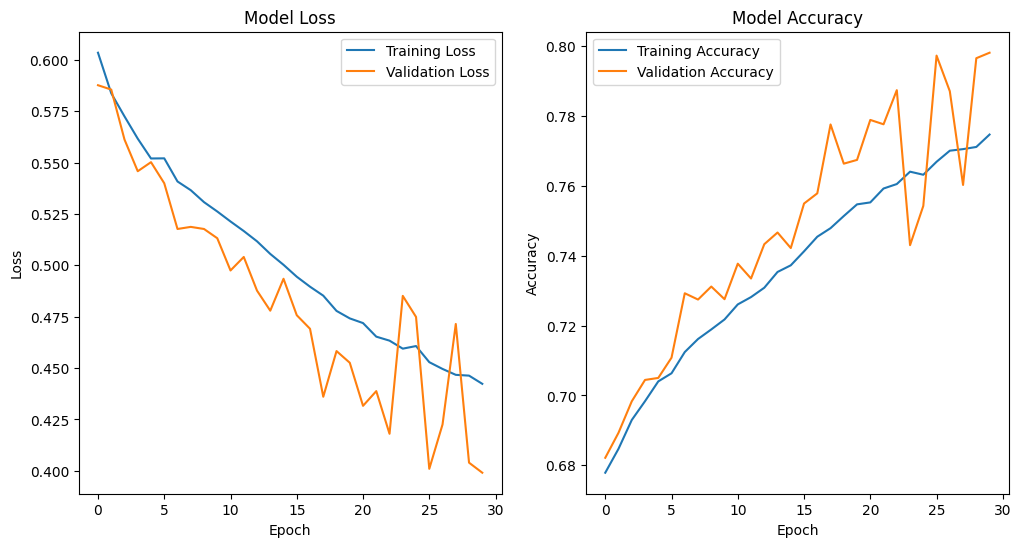

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#### Save model

In [ ]:
import tensorflow as tf

# Define the file path where you want to save the model
model_path = 'transfooormer_model.h5'


model.save(model_path)  # If you're using a tf.keras model

print("Model saved successfully!")


Model saved successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 45 epochs :

NO USE , Model stops learning around 20 epochs

Validation Loss: 0.3953739404678345

Validation Accuracy: 0.8042076826095581


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# Drop pressure level and latitude/longitude columns
X_train_filtered = X_train.drop(columns=['level', 'longitude', 'latitude'])
X_val_filtered = X_val.drop(columns=['level', 'longitude', 'latitude'])

# Normalize input features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_val_scaled = scaler.transform(X_val_filtered)

# Define the Transformer-like architecture
def transformer_model(input_dim, output_dim, num_layers=4, d_model=128, num_heads=8, dff=512, dropout_rate=0.1):
    inputs = Input(shape=(input_dim,))
    x = inputs

    # Add dense layers as the "encoder" part
    for _ in range(num_layers):
        x = Dense(d_model, activation='relu')(x)
        x = LayerNormalization()(x)
        x = Dropout(dropout_rate)(x)

    # Final output layer
    outputs = Dense(output_dim, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define model parameters
input_dim = X_train_scaled.shape[1]
output_dim = 1  # Binary classification

# Initialize the model
model = transformer_model(input_dim, output_dim)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=45, batch_size=72, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping], verbose=2)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


Epoch 1/45
2595/2595 - 25s - loss: 0.6012 - accuracy: 0.6794 - val_loss: 0.5758 - val_accuracy: 0.6874 - 25s/epoch - 10ms/step
Epoch 2/45
2595/2595 - 18s - loss: 0.5793 - accuracy: 0.6888 - val_loss: 0.5701 - val_accuracy: 0.6941 - 18s/epoch - 7ms/step
Epoch 3/45
2595/2595 - 17s - loss: 0.5675 - accuracy: 0.6969 - val_loss: 0.5566 - val_accuracy: 0.7020 - 17s/epoch - 7ms/step
Epoch 4/45
2595/2595 - 21s - loss: 0.5571 - accuracy: 0.7020 - val_loss: 0.5409 - val_accuracy: 0.7084 - 21s/epoch - 8ms/step
Epoch 5/45
2595/2595 - 17s - loss: 0.5491 - accuracy: 0.7075 - val_loss: 0.5498 - val_accuracy: 0.7061 - 17s/epoch - 7ms/step
Epoch 6/45
2595/2595 - 20s - loss: 0.5436 - accuracy: 0.7112 - val_loss: 0.5291 - val_accuracy: 0.7175 - 20s/epoch - 8ms/step
Epoch 7/45
2595/2595 - 19s - loss: 0.5372 - accuracy: 0.7163 - val_loss: 0.5229 - val_accuracy: 0.7247 - 19s/epoch - 7ms/step
Epoch 8/45
2595/2595 - 17s - loss: 0.5326 - accuracy: 0.7177 - val_loss: 0.5131 - val_accuracy: 0.7281 - 17s/epoch - 

#### plot

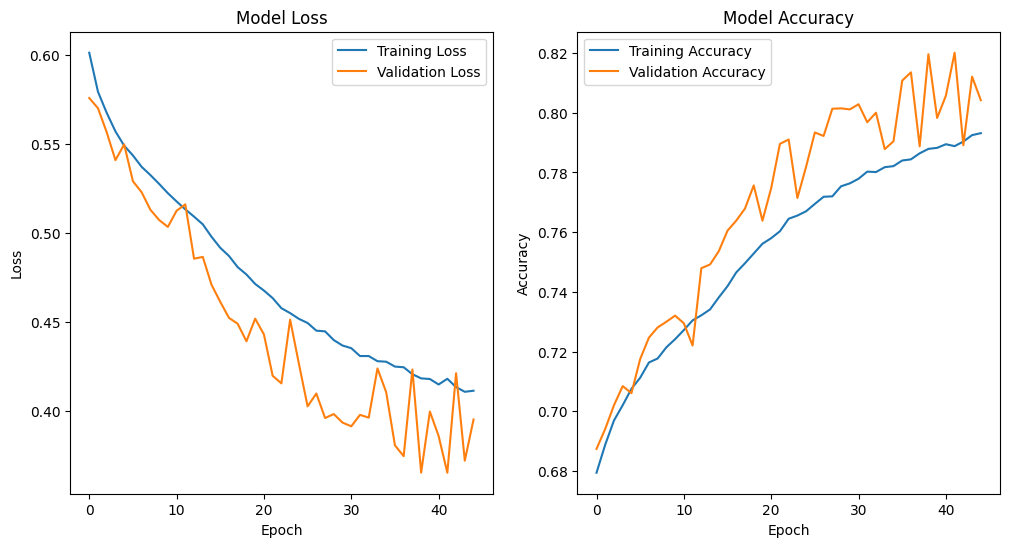

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# KAN: Kolmogorov-Arnold Networks

https://github.com/KindXiaoming/pykan

#### Pip installs

In [ ]:
!pip install pykan

### Loading And Splitting Data

In [ ]:
import pandas as pd

dataset_path = "/content/drive/MyDrive/IMD/updated_reanalysis.csv"
# Load the dataset
df = pd.read_csv(dataset_path)


### TRAINING AND PLOTTING

torch.Size([213451, 2])


train loss: 8.00e-01 | test loss: 8.00e-01 | reg: 6.10e+01 : 100%|██| 50/50 [08:10<00:00,  9.81s/it]
train loss: 7.89e-01 | test loss: 7.90e-01 | reg: 3.52e+01 : 100%|██| 20/20 [29:12<00:00, 87.64s/it]


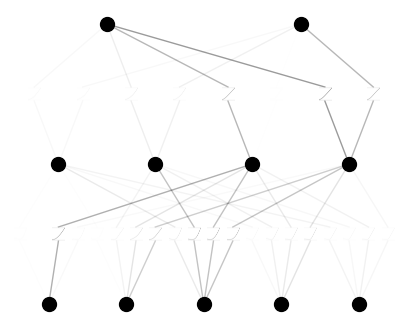

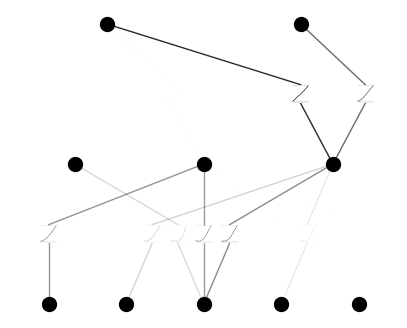

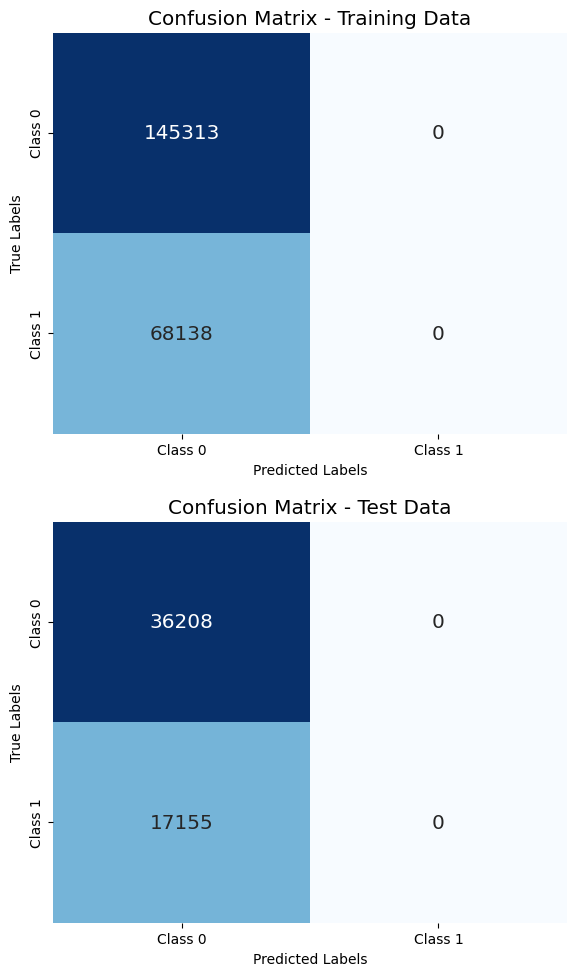

KeyboardInterrupt: 

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

# Import the KAN library
from kan import *

# Function to load and preprocess your dataset
def get_data(df, test_split=0.2, random_state=42, device="cpu", is_regression=False):
    # Drop the 'date', 'level', 'longitude', and 'latitude' columns
    cleaned_df = df.drop(columns=['date', 'level', 'longitude', 'latitude'])

    # Split the data into features and target variable
    X = cleaned_df.drop(columns=['th'])
    y = cleaned_df['th']

    # One-hot encode the target if not a regression problem
    y_shape = y.shape
    target = y
    if not is_regression:
        if len(y_shape) < 2:
            N = len(y)
            unique_values = np.unique(y)
            unique_dic = {_: i for i, _ in enumerate(unique_values)}
            encoded = np.zeros((N, len(unique_values)), dtype=int)
            for i, value in enumerate(y):
                encoded[i, unique_dic[value]] = 1
            target = encoded

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_split, random_state=random_state)

    # Normalize the feature data
    mean = X_train.mean(0)
    std = X_train.std(0)
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std

    # Convert data to PyTorch tensors and move to the specified device
    dataset = {
        'train_input': X_train.values,
        'train_label': y_train if is_regression else y_train,
        'test_input': X_test.values,
        'test_label': y_test if is_regression else y_test
    }
    for k, v in dataset.items():
        if not isinstance(v, np.ndarray):
            dataset[k] = v.values  # Convert pandas series to numpy array if necessary
        dataset[k] = torch.tensor(dataset[k], dtype=torch.float32).to(device)
    return dataset

# Example usage with your dataframe `df`
dataset = get_data(df, test_split=0.2, random_state=42, device="cpu")

# Check the shape of the training labels
print(dataset['train_label'].shape)

# Ensure the input dimension matches the data
input_dim = dataset['train_input'].shape[1]

# Initialize the KAN model
model = KAN(width=[input_dim, 4, 2], grid=3, k=3, seed=0, device="cpu")

# Train the KAN model
_ = model.train(
    dataset, opt="Adam", steps=50, lamb=0.01, lamb_entropy=10, lr=0.001, device="cpu",
    loss_fn=torch.nn.CrossEntropyLoss()
)

# Plot the trained model
model.plot()

# Prune the model to simplify it
modelp = model.prune()

# Retrain the pruned model
_ = modelp.train(
    dataset, opt="Adam", steps=50, lamb=0.01, lamb_entropy=10, lr=0.001, device="cpu",
    loss_fn=torch.nn.CrossEntropyLoss()
)

# Plot the pruned model
modelp.plot()

# Evaluate the model on training data
train_true = dataset['train_label'].argmax(1)
train_pred = modelp(dataset['train_input']).cpu().detach().numpy().round().argmax(1)
cm_train = confusion_matrix(train_true, train_pred)

# Evaluate the model on testing data
test_true = dataset['test_label'].argmax(1)
test_pred = modelp(dataset['test_input']).cpu().detach().numpy().round().argmax(1)
cm_test = confusion_matrix(test_true, test_pred)

# Plot confusion matrices
fig, axes = plt.subplots(2, 1, figsize=(6, 10))

# Plot confusion matrix for training data
plt.subplot(2, 1, 1)
sns.set(font_scale=1.2)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Training Data')

# Plot confusion matrix for testing data
plt.subplot(2, 1, 2)
sns.set(font_scale=1.2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()

# # Automatic symbolic regression to extract formulas
# mode = "auto"  # Set mode to "auto"
# if mode == "auto":
#     # Define the library of functions for symbolic regression
#     lib = ['x', 'x^2', 'x^3', 'x^4', 'exp', 'log', 'sqrt', 'tanh', 'sin', 'abs']
#     modelp.auto_symbolic(lib=lib)

# # Print the symbolic formula
# print(modelp.symbolic_formula()[0][0])


torch.Size([213451, 2])


train loss: 8.00e-01 | test loss: 8.00e-01 | reg: 6.10e+01 : 100%|██| 50/50 [07:48<00:00,  9.37s/it]
train loss: 7.95e-01 | test loss: 7.95e-01 | reg: 5.22e+01 : 100%|██| 50/50 [04:45<00:00,  5.70s/it]


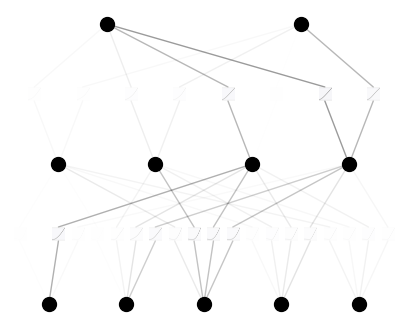

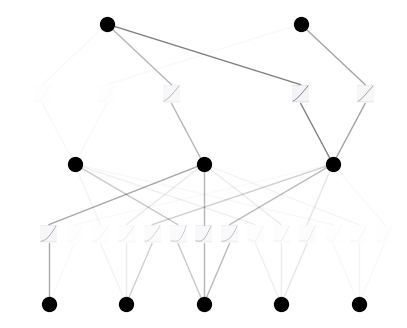

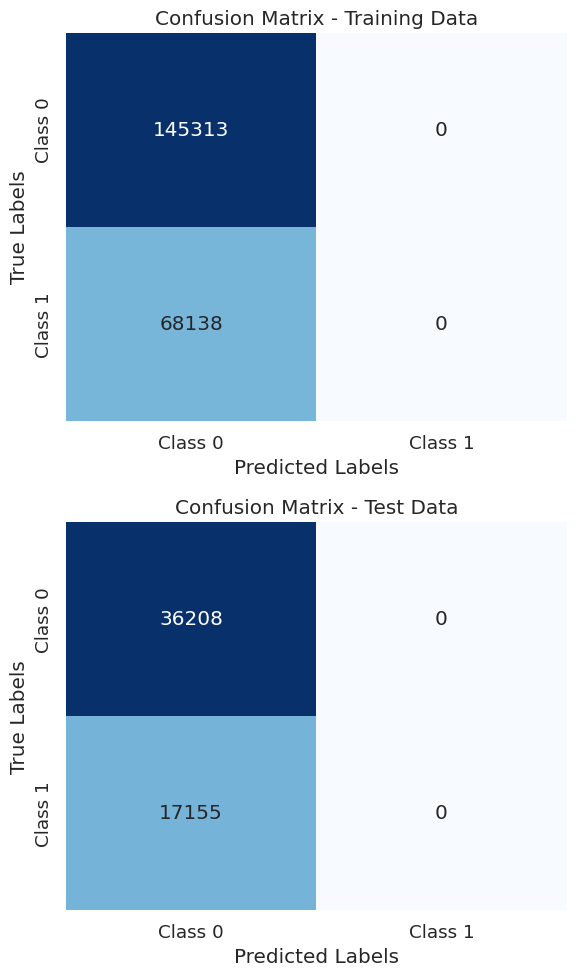

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

# Import the KAN library
from kan import *

# Function to load and preprocess your dataset
def get_data(df, test_split=0.2, random_state=42, device="cpu", is_regression=False):
    # Drop the 'date', 'level', 'longitude', and 'latitude' columns
    cleaned_df = df.drop(columns=['date', 'level', 'longitude', 'latitude'])

    # Split the data into features and target variable
    X = cleaned_df.drop(columns=['th'])
    y = cleaned_df['th']

    # One-hot encode the target if not a regression problem
    y_shape = y.shape
    target = y
    if not is_regression:
        if len(y_shape) < 2:
            N = len(y)
            unique_values = np.unique(y)
            unique_dic = {_: i for i, _ in enumerate(unique_values)}
            encoded = np.zeros((N, len(unique_values)), dtype=int)
            for i, value in enumerate(y):
                encoded[i, unique_dic[value]] = 1
            target = encoded

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_split, random_state=random_state)

    # Normalize the feature data
    mean = X_train.mean(0)
    std = X_train.std(0)
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std

    # Convert data to PyTorch tensors and move to the specified device
    dataset = {
        'train_input': X_train.values,
        'train_label': y_train if is_regression else y_train,
        'test_input': X_test.values,
        'test_label': y_test if is_regression else y_test
    }
    for k, v in dataset.items():
        if not isinstance(v, np.ndarray):
            dataset[k] = v.values  # Convert pandas series to numpy array if necessary
        dataset[k] = torch.tensor(dataset[k], dtype=torch.float32).to(device)
    return dataset

# Example usage with your dataframe `df`
dataset = get_data(df, test_split=0.2, random_state=42, device="cpu")

# Check the shape of the training labels
print(dataset['train_label'].shape)

# Ensure the input dimension matches the data
input_dim = dataset['train_input'].shape[1]

# Initialize the KAN model
model = KAN(width=[input_dim, 4, 2], grid=3, k=3, seed=0, device="cpu")

# Train the KAN model
_ = model.train(
    dataset, opt="Adam", steps=50, lamb=0.01, lamb_entropy=10, lr=0.001, device="cpu",
    loss_fn=torch.nn.CrossEntropyLoss()
)

# Plot the trained model
model.plot()

# Prune the model to simplify it
modelp = model.prune()

# Retrain the pruned model
_ = modelp.train(
    dataset, opt="Adam", steps=50, lamb=0.01, lamb_entropy=10, lr=0.001, device="cpu",
    loss_fn=torch.nn.CrossEntropyLoss()
)

# Plot the pruned model
modelp.plot()

# Evaluate the model on training data
train_true = dataset['train_label'].argmax(1)
train_pred = modelp(dataset['train_input']).cpu().detach().numpy().round().argmax(1)
cm_train = confusion_matrix(train_true, train_pred)

# Evaluate the model on testing data
test_true = dataset['test_label'].argmax(1)
test_pred = modelp(dataset['test_input']).cpu().detach().numpy().round().argmax(1)
cm_test = confusion_matrix(test_true, test_pred)

# Plot confusion matrices
fig, axes = plt.subplots(2, 1, figsize=(6, 10))

# Plot confusion matrix for training data
plt.subplot(2, 1, 1)
sns.set(font_scale=1.2)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Training Data')

# Plot confusion matrix for testing data
plt.subplot(2, 1, 2)
sns.set(font_scale=1.2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()

# # Automatic symbolic regression to extract formulas
# mode = "auto"  # Set mode to "auto"
# if mode == "auto":
#     # Define the library of functions for symbolic regression
#     lib = ['x', 'x^2', 'x^3', 'x^4', 'exp', 'log', 'sqrt', 'tanh', 'sin', 'abs']
#     modelp.auto_symbolic(lib=lib)

# # Print the symbolic formula
# print(modelp.symbolic_formula()[0][0])


In [ ]:
import pandas as pd

dataset_path = "/content/drive/MyDrive/IMD/TESTING TRIP.csv"
# Load the dataset
df = pd.read_csv(dataset_path)


torch.Size([7905, 2])


train loss: 7.92e-01 | test loss: 7.93e-01 | reg: 1.48e+01 : 100%|█| 500/500 [01:19<00:00,  6.31it/s
train loss: 7.91e-01 | test loss: 7.92e-01 | reg: 7.16e-01 : 100%|█| 500/500 [00:22<00:00, 22.17it/s


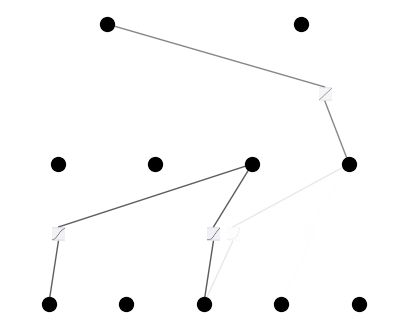

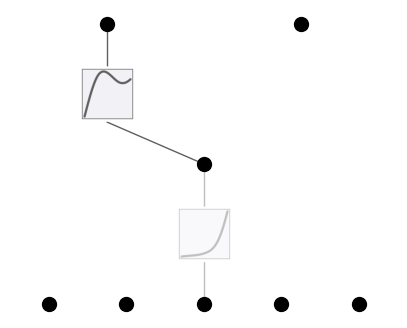

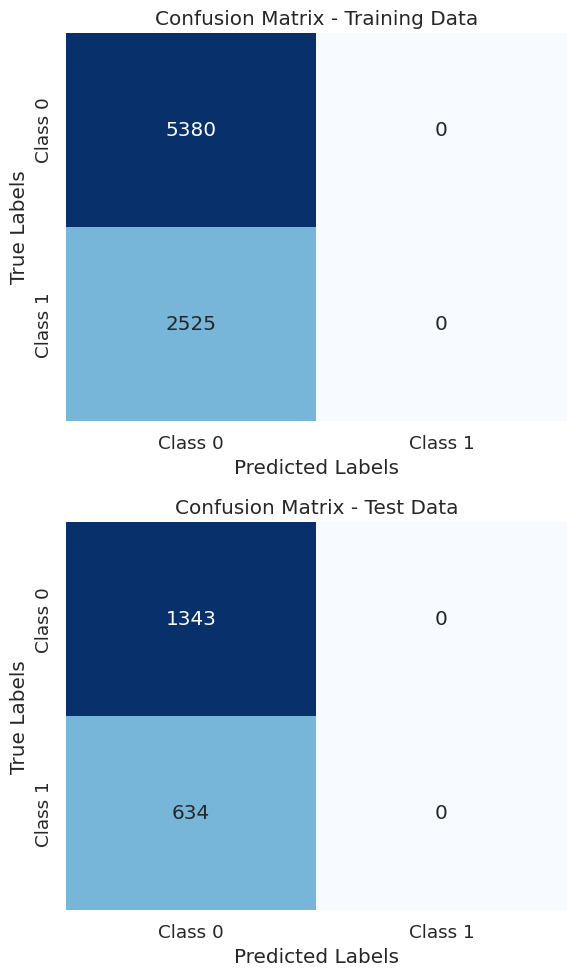

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

# Import the KAN library
from kan import *

# Function to load and preprocess your dataset
def get_data(df, test_split=0.2, random_state=42, device="cpu", is_regression=False):
    # Drop the 'date', 'level', 'longitude', and 'latitude' columns
    cleaned_df = df.drop(columns=['date', 'level', 'longitude', 'latitude'])

    # Split the data into features and target variable
    X = cleaned_df.drop(columns=['th'])
    y = cleaned_df['th']

    # One-hot encode the target if not a regression problem
    y_shape = y.shape
    target = y
    if not is_regression:
        if len(y_shape) < 2:
            N = len(y)
            unique_values = np.unique(y)
            unique_dic = {_: i for i, _ in enumerate(unique_values)}
            encoded = np.zeros((N, len(unique_values)), dtype=int)
            for i, value in enumerate(y):
                encoded[i, unique_dic[value]] = 1
            target = encoded

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_split, random_state=random_state)

    # Normalize the feature data
    mean = X_train.mean(0)
    std = X_train.std(0)
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std

    # Convert data to PyTorch tensors and move to the specified device
    dataset = {
        'train_input': X_train.values,
        'train_label': y_train if is_regression else y_train,
        'test_input': X_test.values,
        'test_label': y_test if is_regression else y_test
    }
    for k, v in dataset.items():
        if not isinstance(v, np.ndarray):
            dataset[k] = v.values  # Convert pandas series to numpy array if necessary
        dataset[k] = torch.tensor(dataset[k], dtype=torch.float32).to(device)
    return dataset

# Example usage with your dataframe `df`
dataset = get_data(df, test_split=0.2, random_state=42, device="cpu")

# Check the shape of the training labels
print(dataset['train_label'].shape)

# Ensure the input dimension matches the data
input_dim = dataset['train_input'].shape[1]

# Initialize the KAN model
model = KAN(width=[input_dim, 4, 2], grid=3, k=3, seed=0, device="cpu")

# Train the KAN model
_ = model.train(
    dataset, opt="LBFGS", steps=500, lamb=0.01, lamb_entropy=10, lr=0.001, device="cpu",
    loss_fn=torch.nn.CrossEntropyLoss()
)

# Plot the trained model
model.plot()

# Prune the model to simplify it
modelp = model.prune()

# Retrain the pruned model
_ = modelp.train(
    dataset, opt="LBFGS", steps=500, lamb=0.01, lamb_entropy=10, lr=0.001, device="cpu",
    loss_fn=torch.nn.CrossEntropyLoss()
)

# Plot the pruned model
modelp.plot()

# Evaluate the model on training data
train_true = dataset['train_label'].argmax(1)
train_pred = modelp(dataset['train_input']).cpu().detach().numpy().round().argmax(1)
cm_train = confusion_matrix(train_true, train_pred)

# Evaluate the model on testing data
test_true = dataset['test_label'].argmax(1)
test_pred = modelp(dataset['test_input']).cpu().detach().numpy().round().argmax(1)
cm_test = confusion_matrix(test_true, test_pred)

# Plot confusion matrices
fig, axes = plt.subplots(2, 1, figsize=(6, 10))

# Plot confusion matrix for training data
plt.subplot(2, 1, 1)
sns.set(font_scale=1.2)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Training Data')

# Plot confusion matrix for testing data
plt.subplot(2, 1, 2)
sns.set(font_scale=1.2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()

# # Automatic symbolic regression to extract formulas
# mode = "auto"  # Set mode to "auto"
# if mode == "auto":
#     # Define the library of functions for symbolic regression
#     lib = ['x', 'x^2', 'x^3', 'x^4', 'exp', 'log', 'sqrt', 'tanh', 'sin', 'abs']
#     modelp.auto_symbolic(lib=lib)

# # Print the symbolic formula
# print(modelp.symbolic_formula()[0][0])


# ALL RESULTS

### ML CLASSIFIERS RESULTS


| <font size="6">Model </font>|<font size="6"> Train Accuracy</font> | <font size="6">Train Precision </font>| <font size="6">Train Recall</font> |<font size="6"> Train F1 Score</font> |
|----------|----------|----------|----------|----------|
| <font size="6">LogisticRegression</font> | 0.680616 | 0.463238 | 0.680616 | 0.558056 |
| <font size="6">LogisticRegressionCV</font> | 0.680616 | 0.463238 | 0.680616 | 0.558056 |
| <font size="6">BernoulliNB</font> | 0.680627 | 0.782627 | 0.680627 | 0.551297 |
| <font size="6">CategoricalNB</font> | 0.680627 | 0.782627 | 0.680627 | 0.551297 |
| <font size="6">ComplementNB</font> | 0.547013 | 0.590875 | 0.547013 | 0.561110 |
| <font size="6">GaussianNB</font> | 0.667675 | 0.593455 | 0.667675 | 0.582370 |
| <font size="6">MultinomialNB</font> | 0.680616 | 0.463238 | 0.680616 | 0.558056 |
| <font size="6">KNeighborsClassifier</font> | 0.948348 | 0.948169 | 0.948348 | 0.948223 |
| <font size="6">DecisionTreeClassifier</font> | 1.000000 | 1.000000 | 1.000000 | 1.000000 |
| <font size="6">ExtraTreeClassifier</font> | 1.000000 | 1.000000 | 1.000000 | 1.000000 |
| <font size="6">RandomForestClassifier</font> | 1.000000 | 1.000000 | 1.000000 | 1.000000 |
| <font size="6">ExtraTreesClassifier</font> | 1.000000 | 1.000000 | 1.000000 | 1.000000 |
| <font size="6">XGBClassifier</font> | 0.857160 | 0.857317 | 0.857160 | 0.851548 |
| <font size="6">LGBMClassifier</font> | 0.777881 | 0.789548 | 0.777881 | 0.748820 |
| <font size="6">CatBoostClassifier</font> | 0.882336 | 0.883424 | 0.882336 | 0.878424 |


---------------------------------------------------------

------------------------------------------------------------

------------------------------------------------------------

-----------------------------------------------------------

| <font size="6">Model </font>|<font size="6"> Test Accuracy</font> | <font size="6">Test Precision </font>| <font size="6">Test Recall</font> |<font size="6"> Test F1 Score</font> |
|----------|----------|----------|----------|----------|
| <font size="6">LogisticRegression</font> | 0.674387 | 0.587410 | 0.674387 | 0.554895 |
| <font size="6">LogisticRegressionCV</font> | 0.677161 | 0.458547 | 0.677161 | 0.546813 |
| <font size="6">BernoulliNB</font> | 0.677161 | 0.458547 | 0.677161 | 0.546813 |
| <font size="6">CategoricalNB</font> | 0.677161 | 0.458547 | 0.677161 | 0.546813 |
| <font size="6">ComplementNB</font> | 0.544937 | 0.586859 | 0.544937 | 0.558488 |
| <font size="6">GaussianNB</font> | 0.665068 | 0.593149 | 0.665068 | 0.579734 |
| <font size="6">MultinomialNB</font> | 0.677161 | 0.458547 | 0.677161 | 0.546813 |
| <font size="6">KNeighborsClassifier</font> | 0.913275 | 0.912874 | 0.913275 | 0.913025 |
| <font size="6">DecisionTreeClassifier</font> | 0.939060 | 0.938905 | 0.939060 | 0.938968 |
| <font size="6">ExtraTreeClassifier</font> | 0.920021 | 0.919880 | 0.920021 | 0.919945 |
| <font size="6">RandomForestClassifier</font> | 0.976264 | 0.976301 | 0.976264 | 0.976159 |
| <font size="6">ExtraTreesClassifier</font> | 0.982135 | 0.982174 | 0.982135 | 0.982071 |
| <font size="6">XGBClassifier</font> | 0.840991 | 0.840734 | 0.840991 | 0.834084 |
| <font size="6">LGBMClassifier</font> | 0.769258 | 0.779450 | 0.769258 | 0.738715 |
| <font size="6">CatBoostClassifier</font> | 0.867951 | 0.869265 | 0.867951 | 0.862930 |


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
import joblib

# Load the dataset
dataset_path = "/content/drive/MyDrive/IMD/updated_reanalysis.csv"
df = pd.read_csv(dataset_path)

# Drop the 'date' column
cleaned_df = df.drop(columns=['date'])

# Split the data into features and target variable
X = cleaned_df.drop(columns=['th'])
y = cleaned_df['th']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print('Data has been properly loaded, and train-test-validation split has been performed.')
print('Training features shape:', X_train.shape)
print('Validation features shape:', X_val.shape)
print('Testing features shape:', X_test.shape)
print('Training labels shape:', y_train.shape)
print('Validation labels shape:', y_val.shape)
print('Testing labels shape:', y_test.shape)

# Normalize input features (excluding 'level', 'longitude', 'latitude')
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=['level', 'longitude', 'latitude']))
X_val_scaled = scaler.transform(X_val.drop(columns=['level', 'longitude', 'latitude']))
X_test_scaled = scaler.transform(X_test.drop(columns=['level', 'longitude', 'latitude']))

# Define hyperparameters
n_estimators = 100  # Example hyperparameter, you can adjust this
max_depth = None  # Example hyperparameter, you can adjust this
random_state = 42  # To ensure reproducibility

# Initialize and train the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
rf_clf.fit(X_train_scaled, y_train)

# Evaluate the RandomForestClassifier
y_val_pred_rf = rf_clf.predict(X_val_scaled)
print(f'RandomForestClassifier validation accuracy: {accuracy_score(y_val, y_val_pred_rf)}')

# Save the RandomForestClassifier model
joblib.dump(rf_clf, '/content/drive/MyDrive/IMD/random_forest_model.pkl')

# Initialize and train the ExtraTreesClassifier
et_clf = ExtraTreesClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
et_clf.fit(X_train_scaled, y_train)

# Evaluate the ExtraTreesClassifier
y_val_pred_et = et_clf.predict(X_val_scaled)
print(f'ExtraTreesClassifier validation accuracy: {accuracy_score(y_val, y_val_pred_et)}')

# Save the ExtraTreesClassifier model
joblib.dump(et_clf, '/content/drive/MyDrive/IMD/extra_trees_model.pkl')


Data has been properly loaded, and train-test-validation split has been performed.
Training features shape: (186769, 8)
Validation features shape: (40022, 8)
Testing features shape: (40023, 8)
Training labels shape: (186769,)
Validation labels shape: (40022,)
Testing labels shape: (40023,)
RandomForestClassifier validation accuracy: 0.9772874918794663
ExtraTreesClassifier validation accuracy: 0.9835590425266104


['/content/drive/MyDrive/IMD/extra_trees_model.pkl']

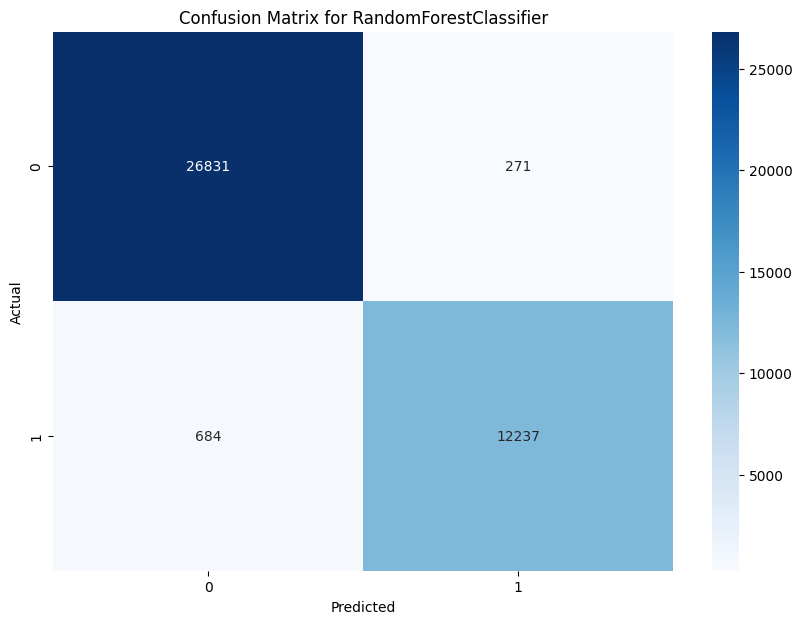

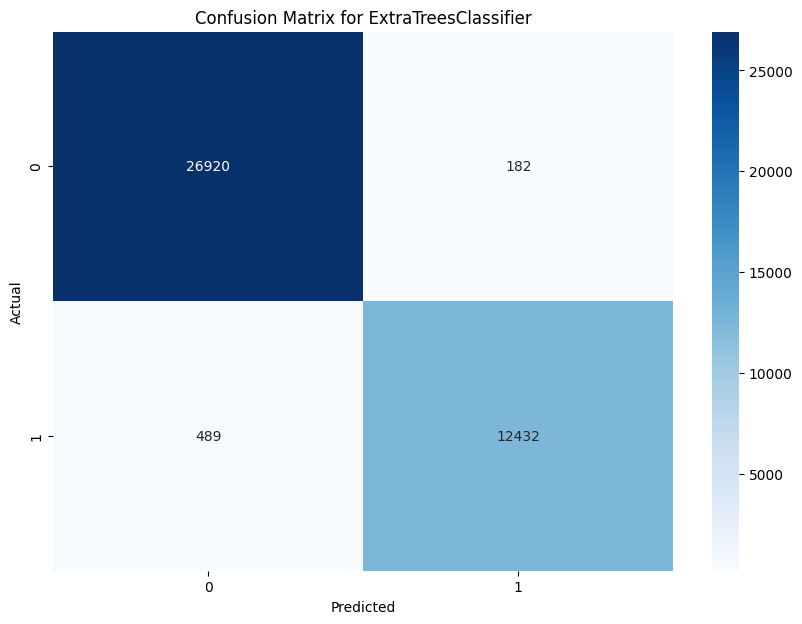

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on the test data
y_test_pred_rf = rf_clf.predict(X_test_scaled)
y_test_pred_et = et_clf.predict(X_test_scaled)

# Compute confusion matrices
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
cm_et = confusion_matrix(y_test, y_test_pred_et)

# Plot confusion matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot the confusion matrix for RandomForestClassifier
plot_confusion_matrix(cm_rf, 'Confusion Matrix for RandomForestClassifier')

# Plot the confusion matrix for ExtraTreesClassifier
plot_confusion_matrix(cm_et, 'Confusion Matrix for ExtraTreesClassifier')


In [ ]:
# Print the hyperparameters of RandomForestClassifier
print("Hyperparameters for RandomForestClassifier:")
print(rf_clf.get_params())

# Print the hyperparameters of ExtraTreesClassifier
print("Hyperparameters for ExtraTreesClassifier:")
print(et_clf.get_params())


Hyperparameters for RandomForestClassifier:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Hyperparameters for ExtraTreesClassifier:
{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = "/content/drive/MyDrive/IMD/updated_reanalysis.csv"
df = pd.read_csv(dataset_path)

# Drop the 'date' column
cleaned_df = df.drop(columns=['date'])

# Split the data into features and target variable
X = cleaned_df.drop(columns=['th'])
y = cleaned_df['th']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print('Data has been properly loaded, and train-test-validation split has been performed.')
print('Training features shape:', X_train.shape)
print('Validation features shape:', X_val.shape)
print('Testing features shape:', X_test.shape)
print('Training labels shape:', y_train.shape)
print('Validation labels shape:', y_val.shape)
print('Testing labels shape:', y_test.shape)

# Normalize input features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=['level', 'longitude', 'latitude']))
X_val_scaled = scaler.transform(X_val.drop(columns=['level', 'longitude', 'latitude']))
X_test_scaled = scaler.transform(X_test.drop(columns=['level', 'longitude', 'latitude']))

# Define the Transformer-like architecture
def transformer_model(input_dim, output_dim, num_layers=4, d_model=128, num_heads=8, dff=512, dropout_rate=0.1):
    inputs = Input(shape=(input_dim,))
    x = inputs

    # Add dense layers as the "encoder" part
    for _ in range(num_layers):
        x = Dense(d_model, activation='relu')(x)
        x = LayerNormalization()(x)
        x = Dropout(dropout_rate)(x)

    # Final output layer
    outputs = Dense(output_dim, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define model parameters
input_dim = X_train_scaled.shape[1]
output_dim = 1  # Binary classification

# Initialize the model
model = transformer_model(input_dim, output_dim)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=72, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping], verbose=2)

# Save the model
model_save_path = "/content/drive/MyDrive/IMD/transformer_model"
model.save(model_save_path)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Calculate additional evaluation metrics
val_preds = model.predict(X_val_scaled)
val_preds_binary = np.round(val_preds).flatten()

# Calculate metrics
val_accuracy = accuracy_score(y_val, val_preds_binary)
val_precision = precision_score(y_val, val_preds_binary)
val_recall = recall_score(y_val, val_preds_binary)
val_f1 = f1_score(y_val, val_preds_binary)
val_cm = confusion_matrix(y_val, val_preds_binary)

# Function to calculate additional metrics
def calculate_metrics(cm):
    tn, fp, fn, tp = cm.ravel()
    far = fp / (fp + tn) if (fp + tn) != 0 else 0
    pod = tp / (tp + fn) if (tp + fn) != 0 else 0
    csi = tp / (tp + fn + fp) if (tp + fn + fp) != 0 else 0
    hss = 2 * (tp * tn - fp * fn) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)) if ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)) != 0 else 0
    return far, pod, csi, hss

val_far, val_pod, val_csi, val_hss = calculate_metrics(val_cm)

# Print the results
print("Validation Accuracy:", val_accuracy)
print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation F1 Score:", val_f1)
print("Validation FAR:", val_far)
print("Validation POD:", val_pod)
print("Validation CSI:", val_csi)
print("Validation HSS:", val_hss)


Data has been properly loaded, and train-test-validation split has been performed.
Training features shape: (186769, 8)
Validation features shape: (40022, 8)
Testing features shape: (40023, 8)
Training labels shape: (186769,)
Validation labels shape: (40022,)
Testing labels shape: (40023,)
Epoch 1/10
2595/2595 - 30s - loss: 0.6049 - accuracy: 0.6774 - val_loss: 0.5822 - val_accuracy: 0.6851 - 30s/epoch - 12ms/step
Epoch 2/10
2595/2595 - 27s - loss: 0.5820 - accuracy: 0.6878 - val_loss: 0.5809 - val_accuracy: 0.6878 - 27s/epoch - 11ms/step
Epoch 3/10
2595/2595 - 28s - loss: 0.5740 - accuracy: 0.6921 - val_loss: 0.5653 - val_accuracy: 0.6975 - 28s/epoch - 11ms/step
Epoch 4/10
2595/2595 - 25s - loss: 0.5629 - accuracy: 0.6976 - val_loss: 0.5486 - val_accuracy: 0.7022 - 25s/epoch - 10ms/step
Epoch 5/10
2595/2595 - 26s - loss: 0.5538 - accuracy: 0.7039 - val_loss: 0.5344 - val_accuracy: 0.7165 - 26s/epoch - 10ms/step
Epoch 6/10
2595/2595 - 27s - loss: 0.5479 - accuracy: 0.7091 - val_loss: 0